In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
matches_df = pd.read_csv("matches.csv")
deliveries_df = pd.read_csv("deliveries.csv")

In [3]:
print("Dimensions of matches_df: ", matches_df.shape)
print("Dimensions of deliveries_df: ", deliveries_df.shape)

Dimensions of matches_df:  (1095, 20)
Dimensions of deliveries_df:  (260920, 17)


##DATA INSPECTION AND DATA PRE-PROCESSING

In [5]:
#Viewing first 6 rows
matches_df.head(6)

id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   
5  335987  2007/08      Jaipur  2008-04-21     League       SR Watson   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   
5                      Sawai Mansingh Stadium             Rajasthan Royals   

                         team2                  toss_winner toss_decision  \
0        Kolkata Knight Riders  Royal Challengers Bangalore         field   
1          Chennai Super Kings          Chennai Super Kings           bat   
2             Rajasthan Royals             Rajasthan Royals           bat   
3  Royal Challengers Bangalore               Mumbai Indians           bat   
4              Deccan Chargers              Deccan Chargers           bat   
5              Kings XI Punjab              Kings XI Punjab           bat   

                        winner   result  result_margin  target_runs  \
0        Kolkata Knight Riders     runs          140.0        223.0   
1          Chennai Super Kings     runs           33.0        241.0   
2             Delhi Daredevils  wickets            9.0        130.0   
3  Royal Challengers Bangalore  wickets            5.0        166.0   
4        Kolkata Knight Riders  wickets            5.0        111.0   
5             Rajasthan Royals  wickets            6.0        167.0   

   target_overs super_over method    umpire1         umpire2  
0          20.0          N    NaN  Asad Rauf     RE Koertzen  
1          20.0          N    NaN  MR Benson      SL Shastri  
2          20.0          N    NaN  Aleem Dar  GA Pratapkumar  
3          20.0          N    NaN   SJ Davis       DJ Harper  
4          20.0          N    NaN  BF Bowden     K Hariharan  
5          20.0          N    NaN  Aleem Dar       RB Tiffin

In [6]:
deliveries_df.head(6)

match_id  inning           batting_team                 bowling_team  over  \
0    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
1    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
2    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
3    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
4    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
5    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   

   ball       batter   bowler  non_striker  batsman_runs  extra_runs  \
0     1   SC Ganguly  P Kumar  BB McCullum             0           1   
1     2  BB McCullum  P Kumar   SC Ganguly             0           0   
2     3  BB McCullum  P Kumar   SC Ganguly             0           1   
3     4  BB McCullum  P Kumar   SC Ganguly             0           0   
4     5  BB McCullum  P Kumar   SC Ganguly             0           0   
5     6  BB McCullum  P Kumar   SC Ganguly             0           0   

   total_runs extras_type  is_wicket player_dismissed dismissal_kind fielder  
0           1     legbyes          0              NaN            NaN     NaN  
1           0         NaN          0              NaN            NaN     NaN  
2           1       wides          0              NaN            NaN     NaN  
3           0         NaN          0              NaN            NaN     NaN  
4           0         NaN          0              NaN            NaN     NaN  
5           0         NaN          0              NaN            NaN     NaN

In [7]:
#Basic info of datatypes of variables
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [8]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [9]:
#Missing values in matches
matches_df.isna().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [10]:
#Missing values in deliveries
deliveries_df.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [11]:
matches_df[matches_df["winner"].isna()]

id season       city        date match_type player_of_match  \
241   501265   2011      Delhi  2011-05-21     League             NaN   
485   829763   2015  Bangalore  2015-04-29     League             NaN   
511   829813   2015  Bangalore  2015-05-17     League             NaN   
744  1178424   2019  Bengaluru  2019-04-30     League             NaN   
994  1359519   2023    Lucknow  2023-05-03     League             NaN   

                                                 venue  \
241                                   Feroz Shah Kotla   
485                              M Chinnaswamy Stadium   
511                              M Chinnaswamy Stadium   
744                              M.Chinnaswamy Stadium   
994  Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...   

                           team1                team2  \
241             Delhi Daredevils        Pune Warriors   
485  Royal Challengers Bangalore     Rajasthan Royals   
511  Royal Challengers Bangalore     Delhi Daredevils   
744  Royal Challengers Bangalore     Rajasthan Royals   
994         Lucknow Super Giants  Chennai Super Kings   

                     toss_winner toss_decision winner     result  \
241             Delhi Daredevils           bat    NaN  no result   
485             Rajasthan Royals         field    NaN  no result   
511  Royal Challengers Bangalore         field    NaN  no result   
744             Rajasthan Royals         field    NaN  no result   
994          Chennai Super Kings         field    NaN  no result   

     result_margin  target_runs  target_overs super_over method  \
241            NaN          NaN           NaN          N    NaN   
485            NaN          NaN           NaN          N    NaN   
511            NaN        188.0          20.0          N    NaN   
744            NaN         63.0           5.0          N    NaN   
994            NaN          NaN           NaN          N    NaN   

             umpire1        umpire2  
241        SS Hazare      RJ Tucker  
485        JD Cloete      PG Pathak  
511  HDPK Dharmasena   K Srinivasan  
744         NJ Llong      UV Gandhe  
994     AK Chaudhary  NA Patwardhan

In [12]:
matches_df[matches_df["result_margin"].isna()]

id   season       city        date match_type player_of_match  \
66    392190     2009  Cape Town  2009-04-23     League       YK Pathan   
130   419121  2009/10    Chennai  2010-03-21     League        J Theron   
241   501265     2011      Delhi  2011-05-21     League             NaN   
328   598004     2013  Hyderabad  2013-04-07     League       GH Vihari   
342   598017     2013  Bangalore  2013-04-16     League         V Kohli   
416   729315     2014  Abu Dhabi  2014-04-29     League     JP Faulkner   
475   829741     2015  Ahmedabad  2015-04-21     League        SE Marsh   
485   829763     2015  Bangalore  2015-04-29     League             NaN   
511   829813     2015  Bangalore  2015-05-17     League             NaN   
610  1082625     2017     Rajkot  2017-04-29     League       KH Pandya   
705  1175365     2019      Delhi  2019-03-30     League         PP Shaw   
744  1178424     2019  Bengaluru  2019-04-30     League             NaN   
746  1178426     2019     Mumbai  2019-05-02     League       JJ Bumrah   
757  1216493  2020/21        NaN  2020-09-20     League      MP Stoinis   
765  1216547  2020/21        NaN  2020-09-28     League  AB de Villiers   
790  1216512  2020/21  Abu Dhabi  2020-10-18     League     LH Ferguson   
791  1216517  2020/21        NaN  2020-10-18     League        KL Rahul   
835  1254077     2021    Chennai  2021-04-25     League         PP Shaw   
994  1359519     2023    Lucknow  2023-05-03     League             NaN   

                                                 venue  \
66                                            Newlands   
130                    MA Chidambaram Stadium, Chepauk   
241                                   Feroz Shah Kotla   
328          Rajiv Gandhi International Stadium, Uppal   
342                              M Chinnaswamy Stadium   
416                               Sheikh Zayed Stadium   
475                       Sardar Patel Stadium, Motera   
485                              M Chinnaswamy Stadium   
511                              M Chinnaswamy Stadium   
610             Saurashtra Cricket Association Stadium   
705                               Arun Jaitley Stadium   
744                              M.Chinnaswamy Stadium   
746                                   Wankhede Stadium   
757                Dubai International Cricket Stadium   
765                Dubai International Cricket Stadium   
790                               Sheikh Zayed Stadium   
791                Dubai International Cricket Stadium   
835           MA Chidambaram Stadium, Chepauk, Chennai   
994  Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...   

                           team1                        team2  \
66         Kolkata Knight Riders             Rajasthan Royals   
130          Chennai Super Kings              Kings XI Punjab   
241             Delhi Daredevils                Pune Warriors   
328          Sunrisers Hyderabad  Royal Challengers Bangalore   
342  Royal Challengers Bangalore             Delhi Daredevils   
416        Kolkata Knight Riders             Rajasthan Royals   
475             Rajasthan Royals              Kings XI Punjab   
485  Royal Challengers Bangalore             Rajasthan Royals   
511  Royal Challengers Bangalore             Delhi Daredevils   
610                Gujarat Lions               Mumbai Indians   
705        Kolkata Knight Riders               Delhi Capitals   
744  Royal Challengers Bangalore             Rajasthan Royals   
746               Mumbai Indians          Sunrisers Hyderabad   
757               Delhi Capitals              Kings XI Punjab   
765  Royal Challengers Bangalore               Mumbai Indians   
790        Kolkata Knight Riders          Sunrisers Hyderabad   
791               Mumbai Indians              Kings XI Punjab   
835               Delhi Capitals          Sunrisers Hyderabad   
994         Lucknow Super Giants          Chennai Super Kings   

                     toss_winner toss_decision 

In [13]:
matches_df[matches_df["target_runs"].isna()]

id season       city        date match_type player_of_match  \
241   501265   2011      Delhi  2011-05-21     League             NaN   
485   829763   2015  Bangalore  2015-04-29     League             NaN   
994  1359519   2023    Lucknow  2023-05-03     League             NaN   

                                                 venue  \
241                                   Feroz Shah Kotla   
485                              M Chinnaswamy Stadium   
994  Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...   

                           team1                team2          toss_winner  \
241             Delhi Daredevils        Pune Warriors     Delhi Daredevils   
485  Royal Challengers Bangalore     Rajasthan Royals     Rajasthan Royals   
994         Lucknow Super Giants  Chennai Super Kings  Chennai Super Kings   

    toss_decision winner     result  result_margin  target_runs  target_overs  \
241           bat    NaN  no result            NaN          NaN           NaN   
485         field    NaN  no result            NaN          NaN           NaN   
994         field    NaN  no result            NaN          NaN           NaN   

    super_over method       umpire1        umpire2  
241          N    NaN     SS Hazare      RJ Tucker  
485          N    NaN     JD Cloete      PG Pathak  
994          N    NaN  AK Chaudhary  NA Patwardhan

In [14]:
matches_df[matches_df["result_margin"].isna()]
##Either the games are rain-affected or tied hence, NaN for result_margin

id   season       city        date match_type player_of_match  \
66    392190     2009  Cape Town  2009-04-23     League       YK Pathan   
130   419121  2009/10    Chennai  2010-03-21     League        J Theron   
241   501265     2011      Delhi  2011-05-21     League             NaN   
328   598004     2013  Hyderabad  2013-04-07     League       GH Vihari   
342   598017     2013  Bangalore  2013-04-16     League         V Kohli   
416   729315     2014  Abu Dhabi  2014-04-29     League     JP Faulkner   
475   829741     2015  Ahmedabad  2015-04-21     League        SE Marsh   
485   829763     2015  Bangalore  2015-04-29     League             NaN   
511   829813     2015  Bangalore  2015-05-17     League             NaN   
610  1082625     2017     Rajkot  2017-04-29     League       KH Pandya   
705  1175365     2019      Delhi  2019-03-30     League         PP Shaw   
744  1178424     2019  Bengaluru  2019-04-30     League             NaN   
746  1178426     2019     Mumbai  2019-05-02     League       JJ Bumrah   
757  1216493  2020/21        NaN  2020-09-20     League      MP Stoinis   
765  1216547  2020/21        NaN  2020-09-28     League  AB de Villiers   
790  1216512  2020/21  Abu Dhabi  2020-10-18     League     LH Ferguson   
791  1216517  2020/21        NaN  2020-10-18     League        KL Rahul   
835  1254077     2021    Chennai  2021-04-25     League         PP Shaw   
994  1359519     2023    Lucknow  2023-05-03     League             NaN   

                                                 venue  \
66                                            Newlands   
130                    MA Chidambaram Stadium, Chepauk   
241                                   Feroz Shah Kotla   
328          Rajiv Gandhi International Stadium, Uppal   
342                              M Chinnaswamy Stadium   
416                               Sheikh Zayed Stadium   
475                       Sardar Patel Stadium, Motera   
485                              M Chinnaswamy Stadium   
511                              M Chinnaswamy Stadium   
610             Saurashtra Cricket Association Stadium   
705                               Arun Jaitley Stadium   
744                              M.Chinnaswamy Stadium   
746                                   Wankhede Stadium   
757                Dubai International Cricket Stadium   
765                Dubai International Cricket Stadium   
790                               Sheikh Zayed Stadium   
791                Dubai International Cricket Stadium   
835           MA Chidambaram Stadium, Chepauk, Chennai   
994  Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...   

                           team1                        team2  \
66         Kolkata Knight Riders             Rajasthan Royals   
130          Chennai Super Kings              Kings XI Punjab   
241             Delhi Daredevils                Pune Warriors   
328          Sunrisers Hyderabad  Royal Challengers Bangalore   
342  Royal Challengers Bangalore             Delhi Daredevils   
416        Kolkata Knight Riders             Rajasthan Royals   
475             Rajasthan Royals              Kings XI Punjab   
485  Royal Challengers Bangalore             Rajasthan Royals   
511  Royal Challengers Bangalore             Delhi Daredevils   
610                Gujarat Lions               Mumbai Indians   
705        Kolkata Knight Riders               Delhi Capitals   
744  Royal Challengers Bangalore             Rajasthan Royals   
746               Mumbai Indians          Sunrisers Hyderabad   
757               Delhi Capitals              Kings XI Punjab   
765  Royal Challengers Bangalore               Mumbai Indians   
790        Kolkata Knight Riders          Sunrisers Hyderabad   
791               Mumbai Indians              Kings XI Punjab   
835               Delhi Capitals          Sunrisers Hyderabad   
994         Lucknow Super Giants          Chennai Super Kings   

                     toss_winner toss_decision 

In [15]:
matches_df[matches_df["target_runs"].isna() & matches_df['target_runs'].isna()]
#Rain-affected games with just 1st innings played

id season       city        date match_type player_of_match  \
241   501265   2011      Delhi  2011-05-21     League             NaN   
485   829763   2015  Bangalore  2015-04-29     League             NaN   
994  1359519   2023    Lucknow  2023-05-03     League             NaN   

                                                 venue  \
241                                   Feroz Shah Kotla   
485                              M Chinnaswamy Stadium   
994  Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...   

                           team1                team2          toss_winner  \
241             Delhi Daredevils        Pune Warriors     Delhi Daredevils   
485  Royal Challengers Bangalore     Rajasthan Royals     Rajasthan Royals   
994         Lucknow Super Giants  Chennai Super Kings  Chennai Super Kings   

    toss_decision winner     result  result_margin  target_runs  target_overs  \
241           bat    NaN  no result            NaN          NaN           NaN   
485         field    NaN  no result            NaN          NaN           NaN   
994         field    NaN  no result            NaN          NaN           NaN   

    super_over method       umpire1        umpire2  
241          N    NaN     SS Hazare      RJ Tucker  
485          N    NaN     JD Cloete      PG Pathak  
994          N    NaN  AK Chaudhary  NA Patwardhan

In [16]:
matches_df[matches_df['player_of_match'].isna() & matches_df['winner'].isna()]
#Rain-affected games hence, NaN for player_of_match and winner

id season       city        date match_type player_of_match  \
241   501265   2011      Delhi  2011-05-21     League             NaN   
485   829763   2015  Bangalore  2015-04-29     League             NaN   
511   829813   2015  Bangalore  2015-05-17     League             NaN   
744  1178424   2019  Bengaluru  2019-04-30     League             NaN   
994  1359519   2023    Lucknow  2023-05-03     League             NaN   

                                                 venue  \
241                                   Feroz Shah Kotla   
485                              M Chinnaswamy Stadium   
511                              M Chinnaswamy Stadium   
744                              M.Chinnaswamy Stadium   
994  Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...   

                           team1                team2  \
241             Delhi Daredevils        Pune Warriors   
485  Royal Challengers Bangalore     Rajasthan Royals   
511  Royal Challengers Bangalore     Delhi Daredevils   
744  Royal Challengers Bangalore     Rajasthan Royals   
994         Lucknow Super Giants  Chennai Super Kings   

                     toss_winner toss_decision winner     result  \
241             Delhi Daredevils           bat    NaN  no result   
485             Rajasthan Royals         field    NaN  no result   
511  Royal Challengers Bangalore         field    NaN  no result   
744             Rajasthan Royals         field    NaN  no result   
994          Chennai Super Kings         field    NaN  no result   

     result_margin  target_runs  target_overs super_over method  \
241            NaN          NaN           NaN          N    NaN   
485            NaN          NaN           NaN          N    NaN   
511            NaN        188.0          20.0          N    NaN   
744            NaN         63.0           5.0          N    NaN   
994            NaN          NaN           NaN          N    NaN   

             umpire1        umpire2  
241        SS Hazare      RJ Tucker  
485        JD Cloete      PG Pathak  
511  HDPK Dharmasena   K Srinivasan  
744         NJ Llong      UV Gandhe  
994     AK Chaudhary  NA Patwardhan

In [17]:
#Dropped these variables as they don't add much value
matches_df.drop(columns = ['umpire1','umpire2','city'], inplace = True)

In [18]:
matches_df.head(6)

id   season        date match_type player_of_match  \
0  335982  2007/08  2008-04-18     League     BB McCullum   
1  335983  2007/08  2008-04-19     League      MEK Hussey   
2  335984  2007/08  2008-04-19     League     MF Maharoof   
3  335985  2007/08  2008-04-20     League      MV Boucher   
4  335986  2007/08  2008-04-20     League       DJ Hussey   
5  335987  2007/08  2008-04-21     League       SR Watson   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   
5                      Sawai Mansingh Stadium             Rajasthan Royals   

                         team2                  toss_winner toss_decision  \
0        Kolkata Knight Riders  Royal Challengers Bangalore         field   
1          Chennai Super Kings          Chennai Super Kings           bat   
2             Rajasthan Royals             Rajasthan Royals           bat   
3  Royal Challengers Bangalore               Mumbai Indians           bat   
4              Deccan Chargers              Deccan Chargers           bat   
5              Kings XI Punjab              Kings XI Punjab           bat   

                        winner   result  result_margin  target_runs  \
0        Kolkata Knight Riders     runs          140.0        223.0   
1          Chennai Super Kings     runs           33.0        241.0   
2             Delhi Daredevils  wickets            9.0        130.0   
3  Royal Challengers Bangalore  wickets            5.0        166.0   
4        Kolkata Knight Riders  wickets            5.0        111.0   
5             Rajasthan Royals  wickets            6.0        167.0   

   target_overs super_over method  
0          20.0          N    NaN  
1          20.0          N    NaN  
2          20.0          N    NaN  
3          20.0          N    NaN  
4          20.0          N    NaN  
5          20.0          N    NaN

In [19]:
#Unique seasons and teams
print(matches_df['season'].unique())

['2007/08' '2009' '2009/10' '2011' '2012' '2013' '2014' '2015' '2016'
 '2017' '2018' '2019' '2020/21' '2021' '2022' '2023' '2024']


In [20]:
matches_df[matches_df['season'] == '2009/10'].tail(10)

id   season        date          match_type player_of_match  \
165  419156  2009/10  2010-04-16              League       RG Sharma   
166  419157  2009/10  2010-04-17              League       R McLaren   
167  419158  2009/10  2010-04-17              League      JD Unadkat   
168  419159  2009/10  2010-04-18              League        MS Dhoni   
169  419160  2009/10  2010-04-18              League       A Symonds   
170  419161  2009/10  2010-04-19              League        M Kartik   
171  419162  2009/10  2010-04-21          Semi Final      KA Pollard   
172  419163  2009/10  2010-04-22          Semi Final    DE Bollinger   
173  419164  2009/10  2010-04-24  3rd Place Play-Off        A Kumble   
174  419165  2009/10  2010-04-25               Final        SK Raina   

                                            venue  \
165  Himachal Pradesh Cricket Association Stadium   
166                         M Chinnaswamy Stadium   
167                                  Eden Gardens   
168  Himachal Pradesh Cricket Association Stadium   
169                              Feroz Shah Kotla   
170                                  Eden Gardens   
171                    Dr DY Patil Sports Academy   
172                    Dr DY Patil Sports Academy   
173                    Dr DY Patil Sports Academy   
174                    Dr DY Patil Sports Academy   

                           team1                team2  \
165              Kings XI Punjab      Deccan Chargers   
166  Royal Challengers Bangalore       Mumbai Indians   
167        Kolkata Knight Riders     Rajasthan Royals   
168              Kings XI Punjab  Chennai Super Kings   
169             Delhi Daredevils      Deccan Chargers   
170        Kolkata Knight Riders       Mumbai Indians   
171  Royal Challengers Bangalore       Mumbai Indians   
172          Chennai Super Kings      Deccan Chargers   
173  Royal Challengers Bangalore      Deccan Chargers   
174          Chennai Super Kings       Mumbai Indians   

                     toss_winner toss_decision                       winner  \
165              Deccan Chargers         field              Deccan Chargers   
166  Royal Challengers Bangalore         field               Mumbai Indians   
167             Rajasthan Royals           bat        Kolkata Knight Riders   
168          Chennai Super Kings         field          Chennai Super Kings   
169              Deccan Chargers           bat              Deccan Chargers   
170               Mumbai Indians           bat        Kolkata Knight Riders   
171               Mumbai Indians           bat               Mumbai Indians   
172          Chennai Super Kings           bat          Chennai Super Kings   
173              Deccan Chargers           bat  Royal Challengers Bangalore   
174          Chennai Super Kings           bat          Chennai Super Kings   

      result  result_margin  target_runs  target_overs super_over method  
165  wickets            5.0        175.0          20.0          N    NaN  
166     runs           57.0        192.0          20.0          N    NaN  
167  wickets            8.0        133.0          20.0          N    NaN  
168  wickets            6.0        193.0          20.0          N    NaN  
169     runs           11.0        146.0          20.0          N    NaN  
170  wickets            9.0        134.0          20.0          N    NaN  
171     runs           35.0        185.0          20.0          N    NaN  
172     runs           38.0        143.0          20.0          N    NaN  
173  wickets            9.0         83.0          20.0          N    NaN  
174     runs           22.0        169.0          20.0          N    NaN

In [21]:
#Mapping known bad season formats to correct IPL years
season_corrections = {
    '2007/08': 2008,
    '2009/10': 2010,
    '2020/21': 2020
}

#Replace inconsistent formats
matches_df['season'] = matches_df['season'].replace(season_corrections)

#Extract year
matches_df['season'] = matches_df['season'].astype(str).str.extract(r'(\d{4})').astype(int)

In [22]:
print(matches_df['season'].unique())

[2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 2022 2023 2024]


In [23]:
print(matches_df['season'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 1095 entries, 0 to 1094
Series name: season
Non-Null Count  Dtype
--------------  -----
1095 non-null   int32
dtypes: int32(1)
memory usage: 4.4 KB
None


In [24]:
print(matches_df['team1'].unique())

['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals'
 'Punjab Kings' 'Lucknow Super Giants' 'Gujarat Titans'
 'Royal Challengers Bengaluru']


In [25]:
#Mapping team names to their latest or updated name [Some teams under same ownership had made changes to their name/logo]
TEAM_NAME_MAPPING = {
    'Royal Challengers Bangalore': 'Royal Challengers Bengaluru',
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings',
    'Rising Pune Supergiant': 'Rising Pune Supergiants'
}

In [26]:
#Apply mapping to matches_df
team_columns_matches = ['team1', 'team2', 'toss_winner', 'winner']
for col in team_columns_matches:
    matches_df[col] = matches_df[col].replace(TEAM_NAME_MAPPING)

#Apply mapping to deliveries_df
team_columns_deliveries = ['batting_team', 'bowling_team']
for col in team_columns_deliveries:
    deliveries_df[col] = deliveries_df[col].replace(TEAM_NAME_MAPPING)

In [27]:
print(matches_df['team1'].unique())

['Royal Challengers Bengaluru' 'Punjab Kings' 'Delhi Capitals'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Lucknow Super Giants' 'Gujarat Titans']


In [28]:
print(deliveries_df['batting_team'].unique())

['Kolkata Knight Riders' 'Royal Challengers Bengaluru'
 'Chennai Super Kings' 'Punjab Kings' 'Rajasthan Royals' 'Delhi Capitals'
 'Mumbai Indians' 'Deccan Chargers' 'Kochi Tuskers Kerala' 'Pune Warriors'
 'Sunrisers Hyderabad' 'Rising Pune Supergiants' 'Gujarat Lions'
 'Lucknow Super Giants' 'Gujarat Titans']


In [29]:
print(deliveries_df['bowling_team'].unique())

['Royal Challengers Bengaluru' 'Kolkata Knight Riders' 'Punjab Kings'
 'Chennai Super Kings' 'Delhi Capitals' 'Rajasthan Royals'
 'Mumbai Indians' 'Deccan Chargers' 'Kochi Tuskers Kerala' 'Pune Warriors'
 'Sunrisers Hyderabad' 'Rising Pune Supergiants' 'Gujarat Lions'
 'Gujarat Titans' 'Lucknow Super Giants']


In [30]:
print(matches_df['venue'].unique())

['M Chinnaswamy Stadium' 'Punjab Cricket Association Stadium, Mohali'
 'Feroz Shah Kotla' 'Wankhede Stadium' 'Eden Gardens'
 'Sawai Mansingh Stadium' 'Rajiv Gandhi International Stadium, Uppal'
 'MA Chidambaram Stadium, Chepauk' 'Dr DY Patil Sports Academy' 'Newlands'
 "St George's Park" 'Kingsmead' 'SuperSport Park' 'Buffalo Park'
 'New Wanderers Stadium' 'De Beers Diamond Oval' 'OUTsurance Oval'
 'Brabourne Stadium' 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Brabourne Stadium, Mumbai'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium' 'Nehru Stadium'
 'Holkar Cricket Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Subrata Roy Sahara Stadium' 'Maharashtra Cricket Association Stadium'
 'Shaheed Veer Narayan Singh International Stadium'
 'JSCA International Stadium Complex' 'Sheikh Zayed Stadium'
 'Sharjah Cricket Stadium' 'Dubai International Cricket Stadium'
 'Punjab Cricket Association IS Bindra Stadium, Mohali'


In [31]:
matches_df['venue'].nunique()

58

In [32]:
#Mapping of inconsistent venue names to a standardized version
venue_corrections = {
    # MA Chidambaram Stadium
    'MA Chidambaram Stadium, Chepauk': 'MA Chidambaram Stadium',
    'MA Chidambaram Stadium, Chepauk, Chennai': 'MA Chidambaram Stadium',

    # M Chinnaswamy Stadium
    'M.Chinnaswamy Stadium': 'M Chinnaswamy Stadium',
    'M Chinnaswamy Stadium, Bengaluru': 'M Chinnaswamy Stadium',

    # Wankhede Stadium
    'Wankhede Stadium, Mumbai': 'Wankhede Stadium',

    # Rajiv Gandhi International Stadium
    'Rajiv Gandhi International Stadium, Uppal': 'Rajiv Gandhi International Stadium',
    'Rajiv Gandhi International Stadium, Uppal, Hyderabad': 'Rajiv Gandhi International Stadium',

    # ACA-VDCA Stadium
    'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam': 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',

    # Brabourne Stadium
    'Brabourne Stadium, Mumbai': 'Brabourne Stadium',

    # Maharashtra Cricket Association Stadium
    'Maharashtra Cricket Association Stadium, Pune': 'Maharashtra Cricket Association Stadium',

    # Arun Jaitley Stadium / Feroz Shah Kotla
    'Feroz Shah Kotla': 'Arun Jaitley Stadium',
    'Arun Jaitley Stadium, Delhi': 'Arun Jaitley Stadium',

    # Punjab IS Bindra Stadium
    'Punjab Cricket Association Stadium, Mohali': 'Punjab Cricket Association IS Bindra Stadium',
    'Punjab Cricket Association IS Bindra Stadium, Mohali': 'Punjab Cricket Association IS Bindra Stadium',
    'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh': 'Punjab Cricket Association IS Bindra Stadium',

    # Zayed Cricket Stadium
    'Sheikh Zayed Stadium': 'Zayed Cricket Stadium',
    'Zayed Cricket Stadium, Abu Dhabi': 'Zayed Cricket Stadium',

    # Eden Gardens
    'Eden Gardens, Kolkata': 'Eden Gardens',

    # Sawai Mansingh Stadium
    'Sawai Mansingh Stadium, Jaipur': 'Sawai Mansingh Stadium',

    # Dr DY Patil Sports Academy
    'Dr DY Patil Sports Academy, Mumbai': 'Dr DY Patil Sports Academy',
    'Dr DY Patil Sports Academy': 'Dr DY Patil Sports Academy',

    # Himachal Pradesh Stadium
    'Himachal Pradesh Cricket Association Stadium, Dharamsala': 'Himachal Pradesh Cricket Association Stadium',

    # Narendra Modi Stadium
    'Narendra Modi Stadium, Ahmedabad': 'Narendra Modi Stadium',
    'Sardar Patel Stadium, Motera': 'Narendra Modi Stadium',

    # Ekana Stadium
    'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow': 'Ekana Cricket Stadium',

    # Mullanpur (new stadium)
    'Maharaja Yadavindra Singh International Cricket Stadium, Mullanpur': 'Mullanpur Cricket Stadium',

    # Barsapara
    'Barsapara Cricket Stadium, Guwahati': 'Barsapara Cricket Stadium',

    # Other known venues
    'Shaheed Veer Narayan Singh International Stadium': 'Shaheed Veer Narayan Singh International Stadium',
    'JSCA International Stadium Complex': 'JSCA International Stadium Complex',
    'Saurashtra Cricket Association Stadium': 'Saurashtra Cricket Association Stadium',
    'Green Park': 'Green Park',
    'Holkar Cricket Stadium': 'Holkar Cricket Stadium',
    'Dubai International Cricket Stadium': 'Dubai International Cricket Stadium',
    'Sharjah Cricket Stadium': 'Sharjah Cricket Stadium'
}


In [33]:
matches_df['venue'] = matches_df['venue'].replace(venue_corrections)

In [34]:
matches_df['venue'].nunique()

37

In [35]:
print(matches_df['venue'].unique())

['M Chinnaswamy Stadium' 'Punjab Cricket Association IS Bindra Stadium'
 'Arun Jaitley Stadium' 'Wankhede Stadium' 'Eden Gardens'
 'Sawai Mansingh Stadium' 'Rajiv Gandhi International Stadium'
 'MA Chidambaram Stadium' 'Dr DY Patil Sports Academy' 'Newlands'
 "St George's Park" 'Kingsmead' 'SuperSport Park' 'Buffalo Park'
 'New Wanderers Stadium' 'De Beers Diamond Oval' 'OUTsurance Oval'
 'Brabourne Stadium' 'Narendra Modi Stadium' 'Barabati Stadium'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium' 'Nehru Stadium'
 'Holkar Cricket Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Subrata Roy Sahara Stadium' 'Maharashtra Cricket Association Stadium'
 'Shaheed Veer Narayan Singh International Stadium'
 'JSCA International Stadium Complex' 'Zayed Cricket Stadium'
 'Sharjah Cricket Stadium' 'Dubai International Cricket Stadium'
 'Saurashtra Cricket Association Stadium' 'Green Park'
 'Ekana Cricket Stadium' 'Barsapara Cricket St

In [36]:
print(matches_df['match_type'].unique())

['League' 'Semi Final' 'Final' '3rd Place Play-Off' 'Qualifier 1'
 'Elimination Final' 'Qualifier 2' 'Eliminator']


In [37]:
#Normalising match_type name
MATCH_MAPPING = {
    'Elimination Final' : 'Eliminator'
}
matches_df['match_type'] = matches_df['match_type'].replace(MATCH_MAPPING)

In [38]:
print(matches_df['match_type'].unique())

['League' 'Semi Final' 'Final' '3rd Place Play-Off' 'Qualifier 1'
 'Eliminator' 'Qualifier 2']


In [39]:
#Reducing all playoff types to a single tag for binary classification 
matches_df['match_stage'] = matches_df['match_type'].apply(
    lambda x: 'League' if x == 'League' else 'Playoff'
)

In [40]:
print(matches_df['match_stage'].unique())

['League' 'Playoff']


In [41]:
matches_df.tail(10)

id  season        date   match_type  player_of_match  \
1085  1426300    2024  2024-05-12       League          C Green   
1086  1426302    2024  2024-05-14       League         I Sharma   
1087  1426303    2024  2024-05-15       League        SM Curran   
1088  1426305    2024  2024-05-17       League         N Pooran   
1089  1426306    2024  2024-05-18       League     F du Plessis   
1090  1426307    2024  2024-05-19       League  Abhishek Sharma   
1091  1426309    2024  2024-05-21  Qualifier 1         MA Starc   
1092  1426310    2024  2024-05-22   Eliminator         R Ashwin   
1093  1426311    2024  2024-05-24  Qualifier 2    Shahbaz Ahmed   
1094  1426312    2024  2024-05-26        Final         MA Starc   

                                   venue                        team1  \
1085               M Chinnaswamy Stadium  Royal Challengers Bengaluru   
1086                Arun Jaitley Stadium               Delhi Capitals   
1087           Barsapara Cricket Stadium             Rajasthan Royals   
1088                    Wankhede Stadium         Lucknow Super Giants   
1089               M Chinnaswamy Stadium  Royal Challengers Bengaluru   
1090  Rajiv Gandhi International Stadium                 Punjab Kings   
1091               Narendra Modi Stadium          Sunrisers Hyderabad   
1092               Narendra Modi Stadium  Royal Challengers Bengaluru   
1093              MA Chidambaram Stadium          Sunrisers Hyderabad   
1094              MA Chidambaram Stadium          Sunrisers Hyderabad   

                      team2           toss_winner toss_decision  \
1085         Delhi Capitals        Delhi Capitals         field   
1086   Lucknow Super Giants  Lucknow Super Giants         field   
1087           Punjab Kings      Rajasthan Royals           bat   
1088         Mumbai Indians        Mumbai Indians         field   
1089    Chennai Super Kings   Chennai Super Kings         field   
1090    Sunrisers Hyderabad          Punjab Kings           bat   
1091  Kolkata Knight Riders   Sunrisers Hyderabad           bat   
1092       Rajasthan Royals      Rajasthan Royals         field   
1093       Rajasthan Royals      Rajasthan Royals         field   
1094  Kolkata Knight Riders   Sunrisers Hyderabad           bat   

                           winner   result  result_margin  target_runs  \
1085  Royal Challengers Bengaluru     runs           47.0        188.0   
1086               Delhi Capitals     runs           19.0        209.0   
1087                 Punjab Kings  wickets            5.0        145.0   
1088         Lucknow Super Giants     runs           18.0        215.0   
1089  Royal Challengers Bengaluru     runs           27.0        219.0   
1090          Sunrisers Hyderabad  wickets            4.0        215.0   
1091        Kolkata Knight Riders  wickets            8.0        160.0   
1092             Rajasthan Royals  wickets            4.0        173.0   
1093          Sunrisers Hyderabad     runs           36.0        176.0   
1094        Kolkata Knight Riders  wickets            8.0        114.0   

      target_overs super_over method match_stage  
1085          20.0          N    NaN      League  
1086          20.0          N    NaN      League  
1087          20.0          N    NaN      League  
1088          20.0          N    NaN      League  
1089          20.0          N    NaN      League  
1090          20.0          N    NaN      League  
1091          20.0          N    NaN     Playoff  
1092          20.0          N    NaN     Playoff  
1093          20.0          N    NaN     Playoff  
1094          20.0          N    NaN     Playoff

In [42]:
deliveries_df['batter'].unique()

array(['SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey',
       'Mohammad Hafeez', 'R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis',
       'CL White', 'MV Boucher', 'B Akhil', 'AA Noffke', 'P Kumar',
       'Z Khan', 'SB Joshi', 'PA Patel', 'ML Hayden', 'MEK Hussey',
       'MS Dhoni', 'SK Raina', 'JDP Oram', 'S Badrinath', 'K Goel',
       'JR Hopes', 'KC Sangakkara', 'Yuvraj Singh', 'SM Katich',
       'IK Pathan', 'T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif',
       'DS Lehmann', 'RA Jadeja', 'M Rawat', 'D Salunkhe', 'SK Warne',
       'SK Trivedi', 'G Gambhir', 'V Sehwag', 'S Dhawan', 'L Ronchi',
       'ST Jayasuriya', 'DJ Thornely', 'RV Uthappa', 'PR Shah',
       'AM Nayar', 'SM Pollock', 'Harbhajan Singh', 'S Chanderpaul',
       'LRPL Taylor', 'AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxman',
       'A Symonds', 'RG Sharma', 'SB Styris', 'AS Yadav', 'SB Bangar',
       'WPUJC Vaas', 'RP Singh', 'WP Saha', 'LR Shukla',
       'DPMD Jayawardene', 'S Sohal', 'B Lee', 'PP Cha

In [43]:
deliveries_df['non_striker'].unique()

array(['BB McCullum', 'SC Ganguly', 'RT Ponting', 'DJ Hussey',
       'Mohammad Hafeez', 'W Jaffer', 'R Dravid', 'V Kohli', 'JH Kallis',
       'CL White', 'MV Boucher', 'B Akhil', 'AA Noffke', 'P Kumar',
       'Z Khan', 'SB Joshi', 'ML Hayden', 'PA Patel', 'MEK Hussey',
       'MS Dhoni', 'SK Raina', 'JDP Oram', 'S Badrinath', 'JR Hopes',
       'K Goel', 'KC Sangakkara', 'Yuvraj Singh', 'SM Katich',
       'IK Pathan', 'YK Pathan', 'T Kohli', 'SR Watson', 'M Kaif',
       'DS Lehmann', 'RA Jadeja', 'M Rawat', 'D Salunkhe', 'SK Warne',
       'SK Trivedi', 'V Sehwag', 'G Gambhir', 'S Dhawan', 'ST Jayasuriya',
       'L Ronchi', 'DJ Thornely', 'RV Uthappa', 'PR Shah', 'AM Nayar',
       'SM Pollock', 'Harbhajan Singh', 'S Chanderpaul', 'LRPL Taylor',
       'Y Venugopal Rao', 'AC Gilchrist', 'VVS Laxman', 'A Symonds',
       'SB Styris', 'AS Yadav', 'SB Bangar', 'WPUJC Vaas', 'RP Singh',
       'PP Ojha', 'WP Saha', 'LR Shukla', 'DPMD Jayawardene', 'S Sohal',
       'PP Chawla', 'WA M

In [44]:
deliveries_df['bowler'].unique()

array(['P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi',
       'CL White', 'AB Dinda', 'I Sharma', 'AB Agarkar', 'SC Ganguly',
       'LR Shukla', 'B Lee', 'S Sreesanth', 'JR Hopes', 'IK Pathan',
       'K Goel', 'PP Chawla', 'WA Mota', 'JDP Oram', 'MS Gony',
       'M Muralitharan', 'P Amarnath', 'Joginder Sharma', 'GD McGrath',
       'B Geeves', 'MF Maharoof', 'R Bhatia', 'DL Vettori', 'MM Patel',
       'SR Watson', 'SK Trivedi', 'SK Warne', 'YK Pathan', 'D Salunkhe',
       'R Vinay Kumar', 'B Akhil', 'A Nehra', 'SM Pollock', 'DS Kulkarni',
       'ST Jayasuriya', 'Harbhajan Singh', 'AM Nayar', 'M Kartik',
       'Mohammad Hafeez', 'DJ Hussey', 'WPUJC Vaas', 'RP Singh',
       'SB Styris', 'SB Bangar', 'A Symonds', 'PP Ojha', 'Pankaj Singh',
       'Mohammad Asif', 'VY Mahesh', 'Shahid Afridi', 'DJ Bravo',
       'VS Yeligati', 'MA Khote', 'D Kalyankrishna', 'VRV Singh',
       'Sohail Tanvir', 'A Kumble', 'DNT Zoysa', 'SD Chitnis',
       'Yuvraj Singh', 'Shoaib Malik',

In [45]:
deliveries_df['fielder'].unique()

array([nan, 'JH Kallis', 'P Kumar', 'CL White', 'M Kartik', 'RT Ponting',
       'WP Saha', 'AB Agarkar', 'BB McCullum', 'KC Sangakkara',
       'IK Pathan', 'PA Patel', 'Joginder Sharma', 'P Amarnath',
       'M Manhas', 'B Geeves', 'V Kohli', 'Z Khan', 'MV Boucher',
       'AM Nayar', 'L Ronchi', 'LR Shukla', 'Mohammad Hafeez', 'AB Dinda',
       'DJ Hussey', 'SC Ganguly', 'RG Sharma', 'SB Styris', 'A Symonds',
       'Kamran Akmal', 'RA Jadeja', 'PP Chawla', 'S Dhawan', 'KD Karthik',
       'MK Tiwary', 'GD McGrath', 'G Gambhir', 'AC Gilchrist', 'DJ Bravo',
       'Harbhajan Singh', 'S Badrinath', 'JDP Oram', 'SK Raina',
       'D Salunkhe', 'SB Bangar', 'D Kalyankrishna', 'VVS Laxman',
       'DS Kulkarni', 'AM Rahane', 'A Nehra', 'B Lee', 'RR Sarwan',
       'Yuvraj Singh', 'MM Patel', 'GC Smith', 'M Rawat', 'Sohail Tanvir',
       'A Kumble', 'M Muralitharan', 'MS Dhoni', 'I Sharma', 'PP Ojha',
       'DPMD Jayawardene', 'V Sehwag', 'W Jaffer', 'R Vinay Kumar',
       'R Dravid',

In [46]:
#Since Arshad Khan(2) and Arshad Khan are same players
player_corrections = {
    'Arshad Khan (2)': 'Arshad Khan',
    'RD Gaikwad': 'Ruturaj Gaikwad',
    'YS Chahal': 'Yuzvendra Chahal',
    'RA Jadeja': 'Ravindra Jadeja',
    'V Kohli': 'Virat Kohli',
    'SR Tendulkar': 'Sachin Tendulkar',
    'MA Agarwal': 'Mayank Agarwal',
    'RD Chahar': 'Rahul Chahar',
    'YBK Jaiswal': 'Yashasvi Jaiswal',
    'S Gill': 'Shubman Gill',
    'RG Sharma' : 'Rohit Sharma'
}
columns = ['batter', 'non_striker', 'bowler', 'player_dismissed', 'fielder']
for col in columns:
    deliveries_df[col] = deliveries_df[col].replace(player_corrections)

matches_df['player_of_match'] = matches_df['player_of_match'].replace(player_corrections)

In [47]:
deliveries_df.head(10)

match_id  inning           batting_team                 bowling_team  over  \
0    335982       1  Kolkata Knight Riders  Royal Challengers Bengaluru     0   
1    335982       1  Kolkata Knight Riders  Royal Challengers Bengaluru     0   
2    335982       1  Kolkata Knight Riders  Royal Challengers Bengaluru     0   
3    335982       1  Kolkata Knight Riders  Royal Challengers Bengaluru     0   
4    335982       1  Kolkata Knight Riders  Royal Challengers Bengaluru     0   
5    335982       1  Kolkata Knight Riders  Royal Challengers Bengaluru     0   
6    335982       1  Kolkata Knight Riders  Royal Challengers Bengaluru     0   
7    335982       1  Kolkata Knight Riders  Royal Challengers Bengaluru     1   
8    335982       1  Kolkata Knight Riders  Royal Challengers Bengaluru     1   
9    335982       1  Kolkata Knight Riders  Royal Challengers Bengaluru     1   

   ball       batter   bowler  non_striker  batsman_runs  extra_runs  \
0     1   SC Ganguly  P Kumar  BB McCullum             0           1   
1     2  BB McCullum  P Kumar   SC Ganguly             0           0   
2     3  BB McCullum  P Kumar   SC Ganguly             0           1   
3     4  BB McCullum  P Kumar   SC Ganguly             0           0   
4     5  BB McCullum  P Kumar   SC Ganguly             0           0   
5     6  BB McCullum  P Kumar   SC Ganguly             0           0   
6     7  BB McCullum  P Kumar   SC Ganguly             0           1   
7     1  BB McCullum   Z Khan   SC Ganguly             0           0   
8     2  BB McCullum   Z Khan   SC Ganguly             4           0   
9     3  BB McCullum   Z Khan   SC Ganguly             4           0   

   total_runs extras_type  is_wicket player_dismissed dismissal_kind fielder  
0           1     legbyes          0              NaN            NaN     NaN  
1           0         NaN          0              NaN            NaN     NaN  
2           1       wides          0              NaN            NaN     NaN  
3           0         NaN          0              NaN            NaN     NaN  
4           0         NaN          0              NaN            NaN     NaN  
5           0         NaN          0              NaN            NaN     NaN  
6           1     legbyes          0              NaN            NaN     NaN  
7           0         NaN          0              NaN            NaN     NaN  
8           4         NaN          0              NaN            NaN     NaN  
9           4         NaN          0              NaN            NaN     NaN

In [48]:
#Columns with missing values in matches_df
missing_match = matches_df.isna().sum()
missing_match = missing_match[missing_match > 0]
missing_match_df = pd.DataFrame({'Column':missing_match.index, 'Missing Values':missing_match.values})
print(missing_match_df)

            Column  Missing Values
0  player_of_match               5
1           winner               5
2    result_margin              19
3      target_runs               3
4     target_overs               3
5           method            1074


In [49]:
missing_deliveries = deliveries_df.isna().sum()
missing_deliveries = missing_deliveries[missing_deliveries > 0]
missing_deliveries_df = pd.DataFrame({'Column':missing_deliveries.index , 'Missing Values':missing_deliveries.values})
print(missing_deliveries_df)

             Column  Missing Values
0       extras_type          246795
1  player_dismissed          247970
2    dismissal_kind          247970
3           fielder          251566


##EDA

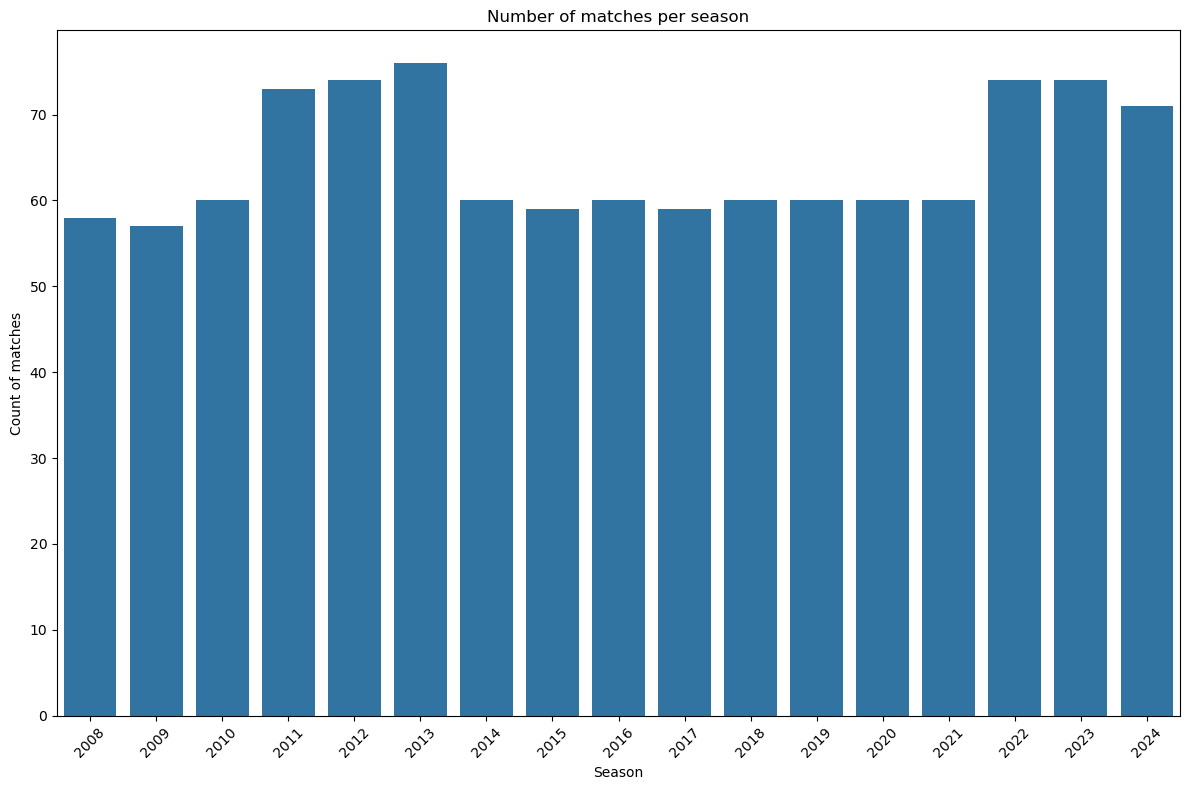

In [51]:
#Match distribution per season
plt.figure(figsize=(12,8))
sns.countplot(data=matches_df, x="season", order=sorted(matches_df["season"].unique()))
plt.xticks(rotation=45)
plt.title("Number of matches per season")
plt.xlabel("Season")
plt.ylabel("Count of matches")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Count of Toss Decision')

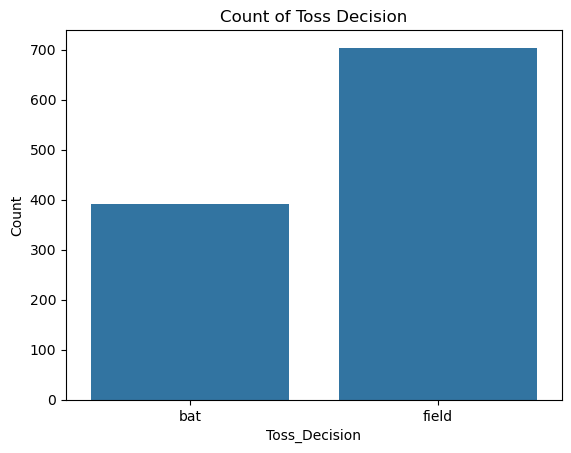

In [52]:
#Countplot of toss_decision
sns.countplot(data=matches_df, x="toss_decision", order=["bat","field"])
plt.xlabel("Toss_Decision")
plt.ylabel("Count")
plt.title("Count of Toss Decision")

<Axes: title={'center': 'Super Over Matches'}, xlabel='super_over'>

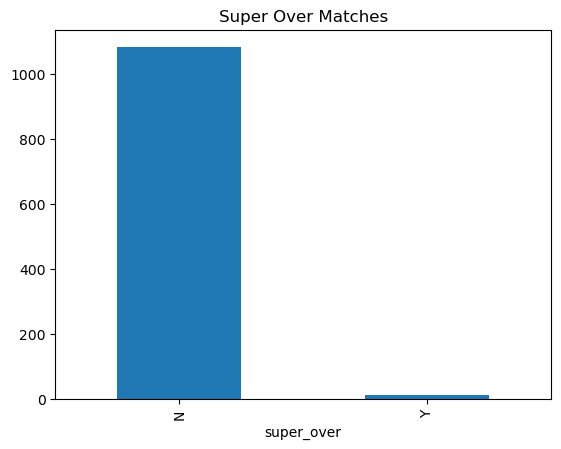

In [53]:
#Super Over distribution
matches_df["super_over"].value_counts().plot(kind="bar", title="Super Over Matches")

Text(0.5, 1.0, 'Distribution of Match Result Margins')

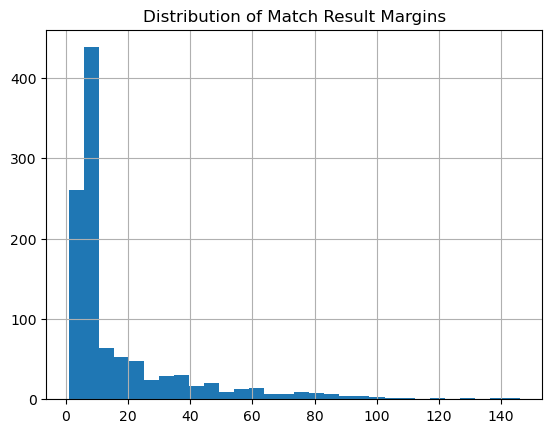

In [54]:
# Result margin histogram
matches_df['result_margin'].hist(bins=30)
plt.title("Distribution of Match Result Margins")

In [55]:
deliveries_df['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field', 'retired out'], dtype=object)

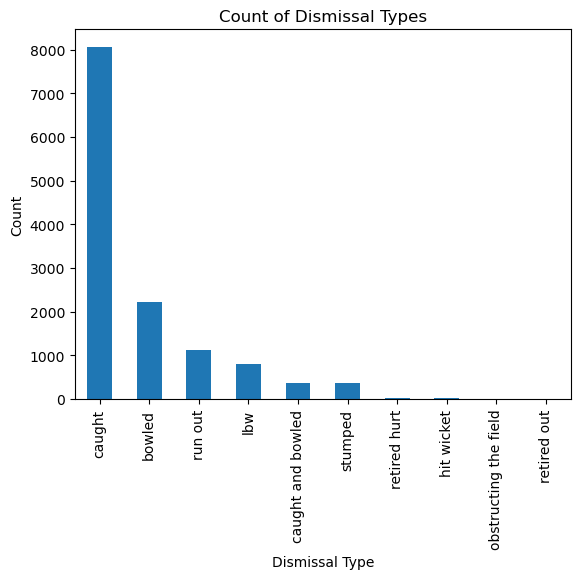

In [56]:
#Distribution of dismissal types
deliveries_df['dismissal_kind'].value_counts().plot(kind='bar', title='Count of Dismissal Types')
plt.xlabel('Dismissal Type')
plt.ylabel('Count')
plt.show()

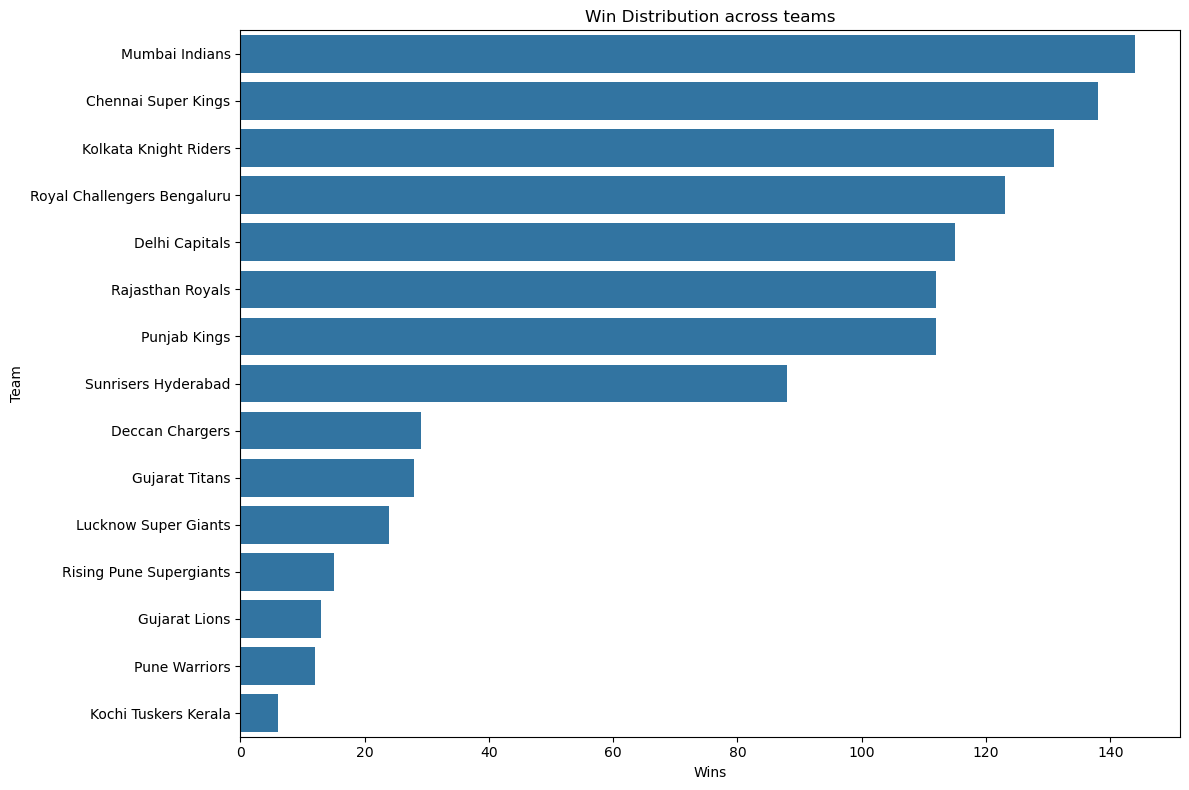

In [57]:
#Win Distribution across teams
plt.figure(figsize=(12,8))
sns.countplot(data=matches_df, y='winner', order=matches_df['winner'].value_counts().index)
plt.title('Win Distribution across teams')
plt.xlabel('Wins')
plt.ylabel('Team')
plt.tight_layout()
plt.show()

In [58]:
#Details of super_over matches
matches_df[matches_df['super_over']=='Y'][['season','team1','team2','winner']]

season                        team1                        team2  \
66     2009        Kolkata Knight Riders             Rajasthan Royals   
130    2010          Chennai Super Kings                 Punjab Kings   
328    2013          Sunrisers Hyderabad  Royal Challengers Bengaluru   
342    2013  Royal Challengers Bengaluru               Delhi Capitals   
416    2014        Kolkata Knight Riders             Rajasthan Royals   
475    2015             Rajasthan Royals                 Punjab Kings   
610    2017                Gujarat Lions               Mumbai Indians   
705    2019        Kolkata Knight Riders               Delhi Capitals   
746    2019               Mumbai Indians          Sunrisers Hyderabad   
757    2020               Delhi Capitals                 Punjab Kings   
765    2020  Royal Challengers Bengaluru               Mumbai Indians   
790    2020        Kolkata Knight Riders          Sunrisers Hyderabad   
791    2020               Mumbai Indians                 Punjab Kings   
835    2021               Delhi Capitals          Sunrisers Hyderabad   

                          winner  
66              Rajasthan Royals  
130                 Punjab Kings  
328          Sunrisers Hyderabad  
342  Royal Challengers Bengaluru  
416             Rajasthan Royals  
475                 Punjab Kings  
610               Mumbai Indians  
705               Delhi Capitals  
746               Mumbai Indians  
757               Delhi Capitals  
765  Royal Challengers Bengaluru  
790        Kolkata Knight Riders  
791                 Punjab Kings  
835               Delhi Capitals

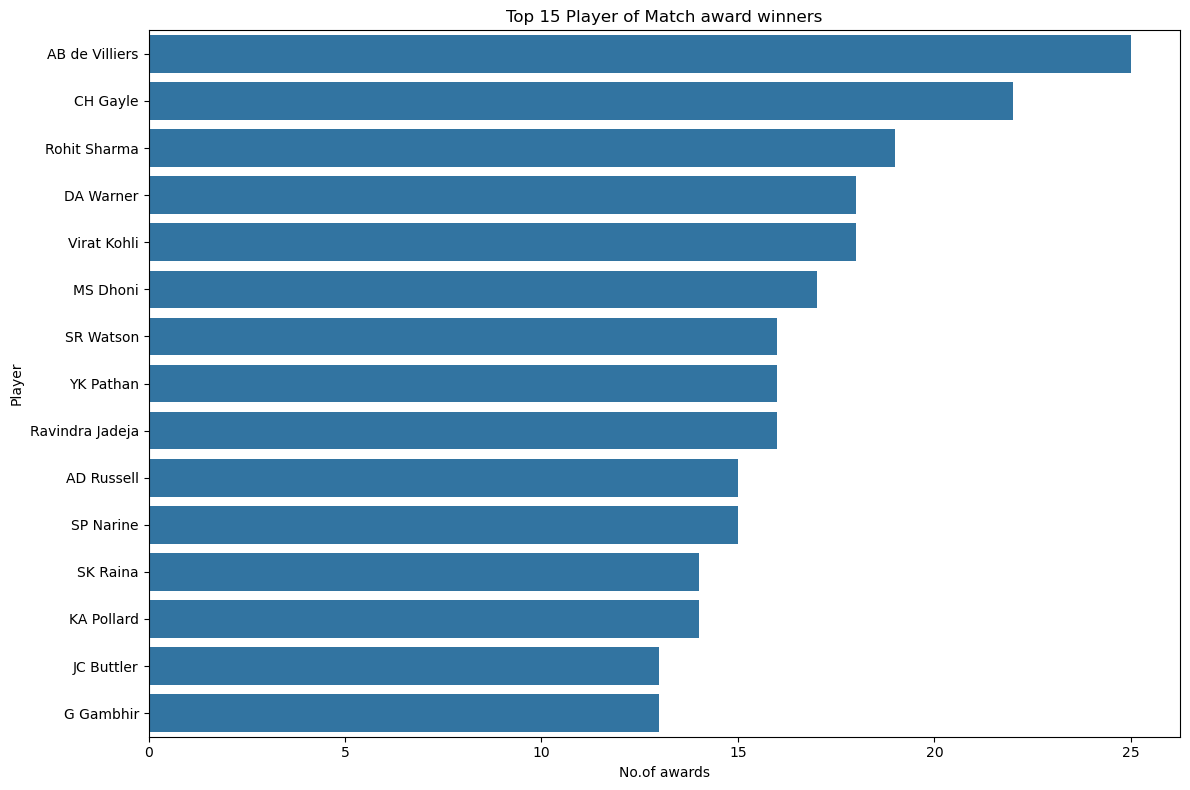

In [59]:
#Top 15 Player_of_Match award winners
plt.figure(figsize=(12,8))
sns.countplot(data=matches_df, y='player_of_match', order=matches_df['player_of_match'].value_counts().head(15).index)
plt.title("Top 15 Player of Match award winners")
plt.xlabel("No.of awards")
plt.ylabel("Player")
plt.tight_layout()
plt.show()

In [60]:
#Players who have been dissmissed the most
deliveries_df['player_dismissed'].value_counts().head(10)

player_dismissed
Rohit Sharma    223
Virat Kohli     207
S Dhawan        193
KD Karthik      184
RV Uthappa      180
SK Raina        171
DA Warner       164
AT Rayudu       155
AM Rahane       154
SV Samson       144
Name: count, dtype: int64

In [61]:
#Top 10 run-scorers
top_batters = deliveries_df.groupby("batter")["batsman_runs"].sum().sort_values(ascending=False).head(10)
print(top_batters)

batter
Virat Kohli       8014
S Dhawan          6769
Rohit Sharma      6630
DA Warner         6567
SK Raina          5536
MS Dhoni          5243
AB de Villiers    5181
CH Gayle          4997
RV Uthappa        4954
KD Karthik        4843
Name: batsman_runs, dtype: int64


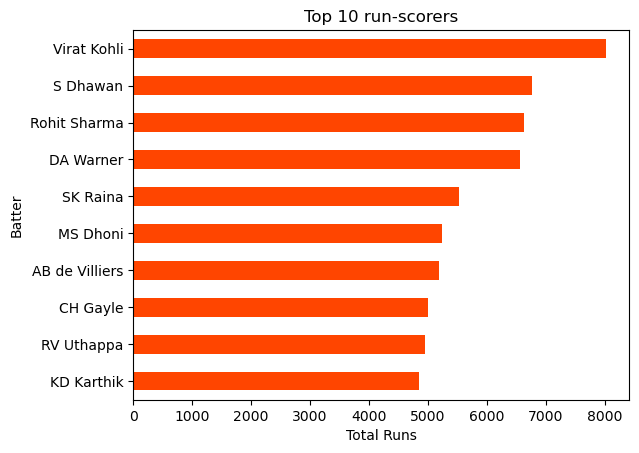

In [62]:
top_batters.plot(kind='barh', title="Top 10 run-scorers", color='orangered')
plt.xlabel('Total Runs')
plt.ylabel('Batter')
plt.gca().invert_yaxis()
plt.show()

In [63]:
#Top 10 wicket-takers
top_wickets = deliveries_df[deliveries_df['is_wicket'] == 1]
top_bowlers = top_wickets.groupby('bowler')['is_wicket'].sum().sort_values(ascending=False).head(10)
print(top_bowlers)

bowler
Yuzvendra Chahal    213
DJ Bravo            207
PP Chawla           201
SP Narine           200
R Ashwin            198
B Kumar             195
SL Malinga          188
A Mishra            183
JJ Bumrah           182
Ravindra Jadeja     169
Name: is_wicket, dtype: int64


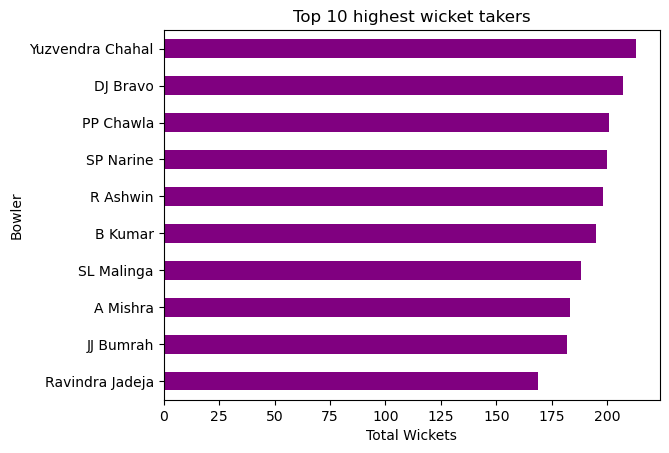

In [64]:
top_bowlers.plot(kind='barh', title='Top 10 highest wicket takers', color='purple')
plt.xlabel('Total Wickets')
plt.ylabel('Bowler')
plt.gca().invert_yaxis()
plt.show()

In [65]:
#Highest Batting appearances(In terms of who have batted in that match)
batting_appearances = deliveries_df.groupby("batter")["match_id"].nunique().sort_values(ascending=False).head(10)
print(batting_appearances)

batter
Rohit Sharma       251
Virat Kohli        244
KD Karthik         233
MS Dhoni           228
S Dhawan           221
SK Raina           200
RV Uthappa         197
AT Rayudu          185
DA Warner          184
Ravindra Jadeja    180
Name: match_id, dtype: int64


In [66]:
#Highest Bowling appearances(In terms of who have bowled in that match)
bowling_appearances = deliveries_df.groupby("bowler")["match_id"].nunique().sort_values(ascending=False).head(10)
print(bowling_appearances)

bowler
Ravindra Jadeja     211
R Ashwin            208
PP Chawla           191
B Kumar             176
SP Narine           175
A Mishra            162
Harbhajan Singh     160
Yuzvendra Chahal    159
DJ Bravo            158
AR Patel            148
Name: match_id, dtype: int64


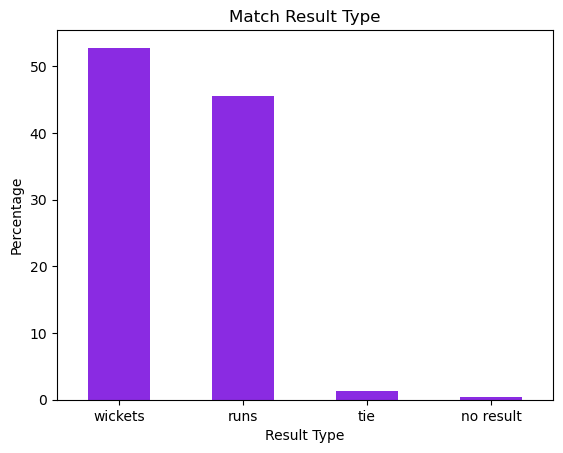

In [67]:
#Match Result Types
result_type = matches_df['result'].value_counts(normalize=True)*100
result_type.plot(kind='bar', color='blueviolet', title='Match Result Type')
plt.xlabel('Result Type')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

C:\Users\Shreyas S\AppData\Local\Temp\ipykernel_8752\3635841899.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=win_df, x='Win %', y='Team', palette='viridis')


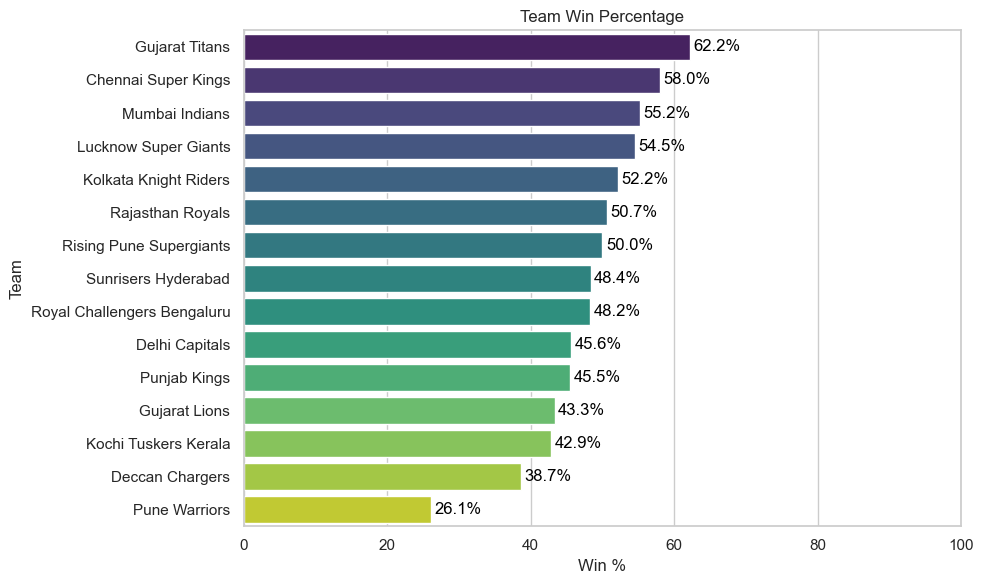

In [68]:
#Wins Percentage by teams
team_wins = matches_df['winner'].value_counts()
team_matches = pd.concat([
    matches_df['team1'],
    matches_df['team2']
]).value_counts()
win_percentage = (team_wins/team_matches*100).dropna().sort_values(ascending=False)

sns.set(style="whitegrid")
win_df = win_percentage.reset_index()
win_df.columns = ['Team', 'Win %']

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=win_df, x='Win %', y='Team', palette='viridis')

#Value labels
for i, v in enumerate(win_df['Win %']):
    ax.text(v + 0.5, i, f"{v:.1f}%", color='black', va='center')

plt.title('Team Win Percentage')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

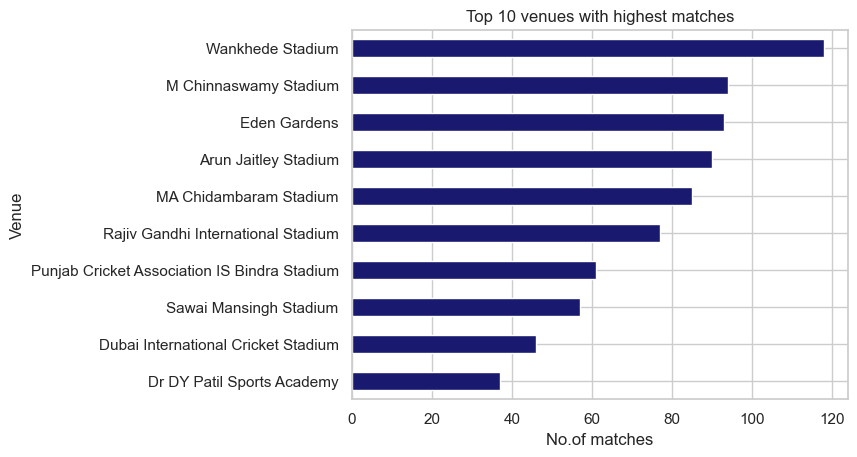

In [69]:
#Venue-wise match count
venue_count = matches_df['venue'].value_counts().head(10)
venue_count.plot(kind='barh', title="Top 10 venues with highest matches", color='midnightblue')
plt.xlabel('No.of matches')
plt.ylabel('Venue')
plt.gca().invert_yaxis()
plt.show()

In [70]:
#Evaluate the relation between toss winner and match winner
pd.crosstab(matches_df['toss_decision'], matches_df['winner']==matches_df['toss_winner'])

col_0          False  True 
toss_decision              
bat              214    177
field            327    377

In [71]:
toss_match_wins = matches_df[matches_df['toss_winner']==matches_df['winner']]
win_percent = (len(toss_match_wins) / len(matches_df)) * 100
print(f"Toss winner also won the match in {win_percent:.2f}% of games.")

Toss winner also won the match in 50.59% of games.


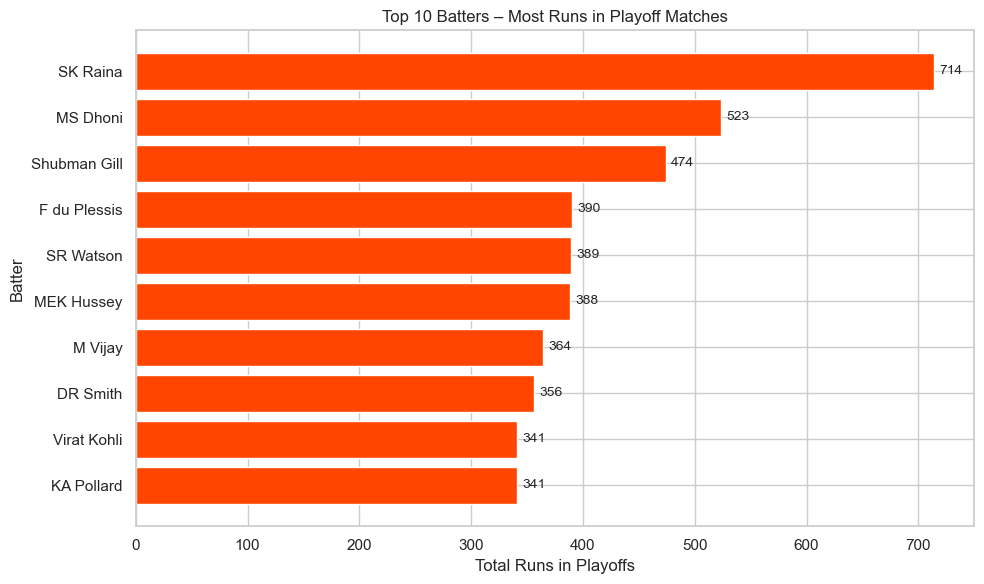

In [72]:
#Top 10 batters with most runs in playoff matches
playoff_matches = matches_df[matches_df['match_stage'].isin(['Playoff'])]
playoff_deliveries = deliveries_df[deliveries_df['match_id'].isin(playoff_matches['id'])]

#Grouping by batters with most runs
runs_in_playoff = playoff_deliveries.groupby("batter")["batsman_runs"].sum().sort_values(ascending=False).head(10)
runs_in_playoff = runs_in_playoff.sort_values()
plt.figure(figsize=(10, 6))
bars = plt.barh(runs_in_playoff.index, runs_in_playoff.values, color='orangered')
plt.title("Top 10 Batters – Most Runs in Playoff Matches")
plt.xlabel("Total Runs in Playoffs")
plt.ylabel("Batter")

#Adding data labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2,
             f'{int(width)}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

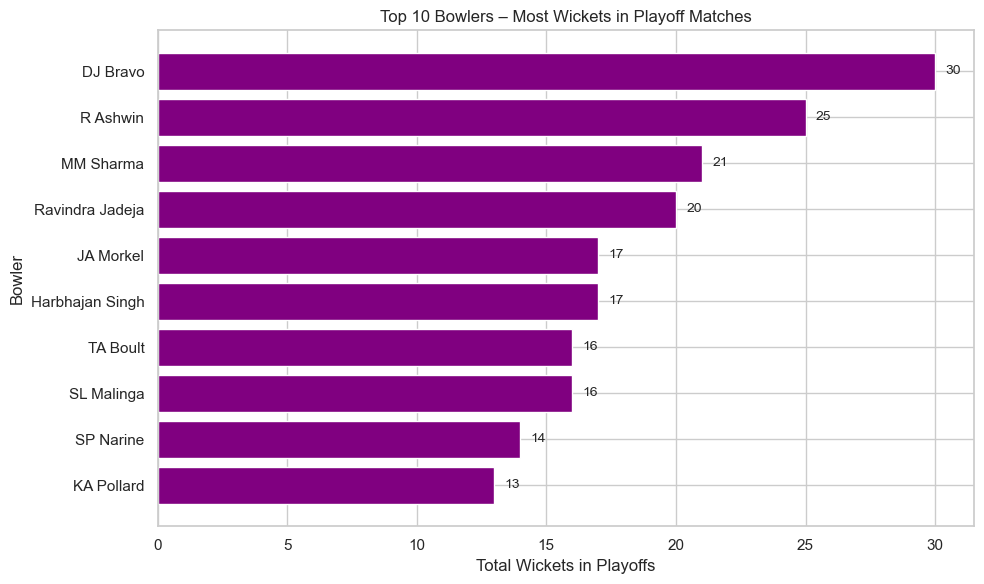

In [73]:
#Top 10 bowlers with most wickets in playoff matches
wickets_taken = playoff_deliveries[playoff_deliveries['is_wicket']==1]
wickets_in_playoff = wickets_taken.groupby("bowler")['is_wicket'].sum().sort_values(ascending=False).head(10)
wickets_in_playoff = wickets_in_playoff.sort_values()

#Plotting graph
plt.figure(figsize=(10,6))
barh_graph = plt.barh(wickets_in_playoff.index, wickets_in_playoff.values, color="purple")
plt.title("Top 10 Bowlers – Most Wickets in Playoff Matches")
plt.xlabel("Total Wickets in Playoffs")
plt.ylabel("Bowler")

for b in barh_graph:
    width_b = b.get_width()
    plt.text(width_b + 0.4, b.get_y() + b.get_height()/2, 
             f'{int(width_b)}', va="center", fontsize=10)

plt.tight_layout()
plt.show()

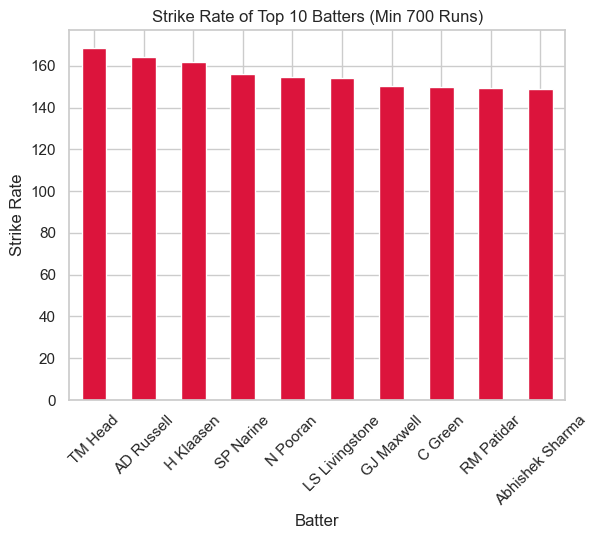

In [74]:
#Strike Rate of Top 10 Batters (Min 700 Runs)
batter_stats = deliveries_df.groupby("batter").agg({'batsman_runs' : 'sum', 'ball' : 'count'})
batter_stats = batter_stats[batter_stats['batsman_runs']>=700]
batter_stats['Strike_Rate'] = (batter_stats['batsman_runs'] / batter_stats['ball']) * 100
batter_stats.sort_values('Strike_Rate',ascending = False).head(10)['Strike_Rate'].plot(kind="bar", title = "Strike Rate of Top 10 Batters (Min 700 Runs)", color = "crimson")
plt.ylabel("Strike Rate")
plt.xlabel("Batter")
plt.xticks(rotation = 45)
plt.show()

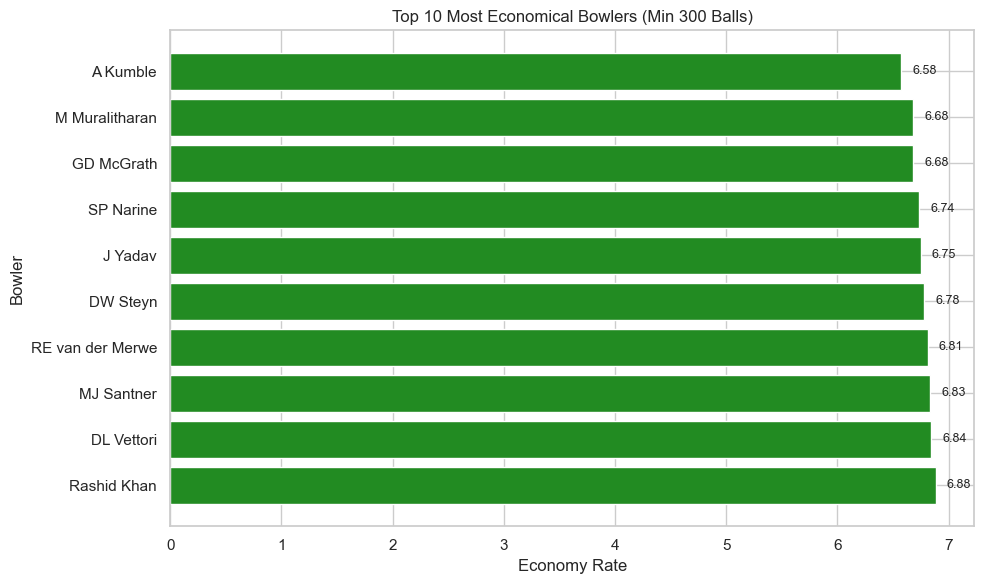

In [75]:
#Top 10 Economical Bowlers (Min 300 Balls Bowled)

#Filter out wides and no-balls to count only valid deliveries
valid_deliveries = deliveries_df[~deliveries_df['extras_type'].isin(['wides', 'no_ball'])]

#Grouping by bowler
bowler_stats = valid_deliveries.groupby('bowler').agg(
    balls_bowled=('ball', 'count'),
    runs_conceded=('total_runs', 'sum')
).reset_index()

#Economy rate
bowler_stats['economy'] = (bowler_stats['runs_conceded'] / bowler_stats['balls_bowled']) * 6

#Filtering bowlers who have bowled at least 300 balls
min_balls = 300
economical_bowlers = bowler_stats[bowler_stats['balls_bowled'] >= min_balls]

#Sort by economy rate[ascending order]
top_economical_bowlers = economical_bowlers.sort_values(by='economy').head(10)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_economical_bowlers['bowler'], top_economical_bowlers['economy'], color='forestgreen')
plt.title("Top 10 Most Economical Bowlers (Min 300 Balls)")
plt.xlabel("Economy Rate")
plt.ylabel("Bowler")

#Data labels
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}', va='center', fontsize=9)

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [76]:
print("Post data pre-processing :-")
print("Rows and Columns in matches_df :", matches_df.shape)
print("Rows and Columns in deliveries_df :", deliveries_df.shape)

Post data pre-processing :-
Rows and Columns in matches_df : (1095, 18)
Rows and Columns in deliveries_df : (260920, 17)


In [77]:
print(matches_df.columns.to_list())

['id', 'season', 'date', 'match_type', 'player_of_match', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result', 'result_margin', 'target_runs', 'target_overs', 'super_over', 'method', 'match_stage']


In [78]:
print(deliveries_df.columns.to_list())

['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs', 'total_runs', 'extras_type', 'is_wicket', 'player_dismissed', 'dismissal_kind', 'fielder']


In [79]:
print("Total Number of teams: ",matches_df['team1'].nunique())

Total Number of teams:  15


In [80]:
#Total number of unique players
#Combine all player-related columns and find unique player names
player_columns = ['batter', 'bowler', 'non_striker', 'player_dismissed', 'fielder']

#Use a set to automatically handle uniqueness
unique_players = set()

for col in player_columns:
    unique_players.update(deliveries_df[col].dropna().unique())

#Total number of unique players
total_unique_players = len(unique_players)
print("Total number of unique players:", total_unique_players)

Total number of unique players: 740


In [81]:
#Saving the cleaned datasets
matches_df.to_csv("cleaned_matches.csv", index=False)
deliveries_df.to_csv("cleaned_deliveries.csv", index=False)

In [82]:
cleaned_matches_df = matches_df.copy()
cleaned_deliveries_df = deliveries_df.copy()

In [83]:
cleaned_matches_df.shape

(1095, 18)

In [84]:
cleaned_deliveries_df.shape

(260920, 17)

In [85]:
cleaned_matches_df.isna().sum()

id                    0
season                0
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
match_stage           0
dtype: int64

In [86]:
cleaned_deliveries_df.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

##FEATURE ENGINEERING FOR ROLE-BASED PLAYER CLUSTERING

Batting

In [89]:
#1. Base Batting Aggregates per Match
batting_per_match = cleaned_deliveries_df.groupby(['match_id', 'batter']).agg(
    runs_scored=('batsman_runs', 'sum'),
    balls_faced=('ball', 'count'),
    dismissals=('player_dismissed', lambda x: x.notnull().sum()),
    fours=('batsman_runs', lambda x: (x == 4).sum()),
    sixes=('batsman_runs', lambda x: (x == 6).sum()),
    dot_balls=('batsman_runs', lambda x: (x == 0).sum())
).reset_index()

#2. Merge Season Info
batting_per_match = batting_per_match.merge(
    cleaned_matches_df[['id', 'season']],
    left_on='match_id', right_on='id', how='left'
).drop(columns='id')

#3. Core Batting Metrics
batting_per_match['batting_average'] = (
    batting_per_match['runs_scored'] / 
    batting_per_match['dismissals'].replace(0, np.nan)
)
batting_per_match['strike_rate'] = (
    batting_per_match['runs_scored'] / batting_per_match['balls_faced']
) * 100
batting_per_match['boundary_rate'] = (
    (batting_per_match['fours'] + batting_per_match['sixes']) * 30 / batting_per_match['balls_faced']
)
batting_per_match['dot_ball_pct'] = (
    batting_per_match['dot_balls'] / batting_per_match['balls_faced']
) * 100

#4. Sort for Rolling Calculations
batting_per_match = batting_per_match.sort_values(by=['batter', 'season', 'match_id'])

#5. Rolling Batting Metrics (6-match window)
window = 6
batting_per_match['roll_runs_scored'] = (
    batting_per_match.groupby('batter')['runs_scored']
    .transform(lambda x: x.rolling(window, min_periods=3).mean())
)
batting_per_match['roll_strike_rate'] = (
    batting_per_match.groupby('batter')['strike_rate']
    .transform(lambda x: x.rolling(window, min_periods=3).mean())
)
batting_per_match['roll_batting_average'] = (
    batting_per_match.groupby('batter')['batting_average']
    .transform(lambda x: x.rolling(window, min_periods=3).mean())
)
batting_per_match['roll_boundary_rate'] = (
    batting_per_match.groupby('batter')['boundary_rate']
    .transform(lambda x: x.rolling(window, min_periods=3).mean())
)
batting_per_match['roll_dot_ball_pct'] = (
    batting_per_match.groupby('batter')['dot_ball_pct']
    .transform(lambda x: x.rolling(window, min_periods=3).mean())
)
batting_per_match['roll_dismissals'] = (
    batting_per_match.groupby('batter')['dismissals']
    .transform(lambda x: x.rolling(window, min_periods=3).mean())
)

In [90]:
print(batting_per_match.head(6))

      match_id          batter  runs_scored  balls_faced  dismissals  fours  \
4299    548346  A Ashish Reddy           10           10           1      0   
4390    548352  A Ashish Reddy            3            3           1      0   
4496    548359  A Ashish Reddy            8            8           1      1   
4699    548373  A Ashish Reddy           10            4           0      2   
4747    548376  A Ashish Reddy            4            5           1      0   
4866    598000  A Ashish Reddy            7            4           0      1   

      sixes  dot_balls  season  batting_average  strike_rate  boundary_rate  \
4299      1          6    2012             10.0        100.0           3.00   
4390      0          1    2012              3.0        100.0           0.00   
4496      0          3    2012              8.0        100.0           3.75   
4699      0          1    2012              NaN        250.0          15.00   
4747      0          2    2012              4.0    

In [91]:
#6. Phase Tags for Powerplay and Death Overs
cleaned_deliveries_df['is_pp'] = cleaned_deliveries_df['over'].between(1, 6)
cleaned_deliveries_df['is_death'] = cleaned_deliveries_df['over'].between(16, 20)

#7. Aggregate Phase Batting
phase_bat = cleaned_deliveries_df.groupby(['match_id', 'batter', 'is_pp', 'is_death']).agg(
    phase_runs=('batsman_runs', 'sum'),
    phase_balls=('ball', 'count'),
    phase_fours=('batsman_runs', lambda x: (x == 4).sum()),
    phase_sixes=('batsman_runs', lambda x: (x == 6).sum())
).reset_index()

#8. Split Powerplay & Death Stats
pp_bat = phase_bat[phase_bat['is_pp']].drop(columns='is_pp').rename(columns={
    'phase_runs': 'pp_runs',
    'phase_balls': 'pp_balls',
    'phase_fours': 'pp_fours',
    'phase_sixes': 'pp_sixes'
})

death_bat = phase_bat[phase_bat['is_death']].drop(columns='is_death').rename(columns={
    'phase_runs': 'death_runs',
    'phase_balls': 'death_balls',
    'phase_fours': 'death_fours',
    'phase_sixes': 'death_sixes'
})

#9. Merge Phase Stats into Main Batting Table
batting_per_match = (
    batting_per_match
    .merge(pp_bat, on=['match_id', 'batter'], how='left')
    .merge(death_bat, on=['match_id', 'batter'], how='left')
)

#10. Fill Missing Phase Balls to Avoid Division Errors
batting_per_match[['pp_balls', 'death_balls']] = (
    batting_per_match[['pp_balls', 'death_balls']].fillna(0)
)

#11. Phase Strike Rate and Boundary Rate Calculations (per 100 balls)
batting_per_match['pp_strike_rate'] = np.where(
    batting_per_match['pp_balls'] > 0,
    batting_per_match['pp_runs'] / batting_per_match['pp_balls'] * 100,
    0
)
batting_per_match['death_strike_rate'] = np.where(
    batting_per_match['death_balls'] > 0,
    batting_per_match['death_runs'] / batting_per_match['death_balls'] * 100,
    0
)

batting_per_match['pp_boundary_rate'] = np.where(
    batting_per_match['pp_balls'] > 0,
    (batting_per_match['pp_fours'] + batting_per_match['pp_sixes']) * 30 / batting_per_match['pp_balls'],
    0
)
batting_per_match['death_boundary_rate'] = np.where(
    batting_per_match['death_balls'] > 0,
    (batting_per_match['death_fours'] + batting_per_match['death_sixes']) * 30 / batting_per_match['death_balls'],
    0
)

#12. Display
print(batting_per_match[[
    'match_id', 'batter',
    'pp_runs', 'pp_balls', 'pp_strike_rate', 'pp_boundary_rate',
    'death_runs', 'death_balls', 'death_strike_rate', 'death_boundary_rate'
]].head(6))

   match_id          batter  pp_runs  pp_balls  pp_strike_rate  \
0    548346  A Ashish Reddy      NaN       0.0             0.0   
1    548352  A Ashish Reddy      NaN       0.0             0.0   
2    548359  A Ashish Reddy      NaN       0.0             0.0   
3    548373  A Ashish Reddy      NaN       0.0             0.0   
4    548376  A Ashish Reddy      NaN       0.0             0.0   
5    598000  A Ashish Reddy      NaN       0.0             0.0   

   pp_boundary_rate  death_runs  death_balls  death_strike_rate  \
0               0.0         NaN          0.0                0.0   
1               0.0         3.0          3.0              100.0   
2               0.0         8.0          8.0              100.0   
3               0.0        10.0          4.0              250.0   
4               0.0         4.0          5.0               80.0   
5               0.0         7.0          4.0              175.0   

   death_boundary_rate  
0                 0.00  
1                

In [92]:
#Rolling Aggregates for Phase Metrics
new_roll_cols = [
    'pp_runs', 'death_runs',
    'pp_strike_rate', 'death_strike_rate',
    'pp_boundary_rate', 'death_boundary_rate'
]
for col in new_roll_cols:
    batting_per_match[f'roll_{col}'] = (
        batting_per_match
        .groupby('batter')[col]
        .transform(lambda x: x.rolling(6, min_periods=3).mean())
    )


In [93]:
batting_per_match.columns

Index(['match_id', 'batter', 'runs_scored', 'balls_faced', 'dismissals',
       'fours', 'sixes', 'dot_balls', 'season', 'batting_average',
       'strike_rate', 'boundary_rate', 'dot_ball_pct', 'roll_runs_scored',
       'roll_strike_rate', 'roll_batting_average', 'roll_boundary_rate',
       'roll_dot_ball_pct', 'roll_dismissals', 'is_death', 'pp_runs',
       'pp_balls', 'pp_fours', 'pp_sixes', 'is_pp', 'death_runs',
       'death_balls', 'death_fours', 'death_sixes', 'pp_strike_rate',
       'death_strike_rate', 'pp_boundary_rate', 'death_boundary_rate',
       'roll_pp_runs', 'roll_death_runs', 'roll_pp_strike_rate',
       'roll_death_strike_rate', 'roll_pp_boundary_rate',
       'roll_death_boundary_rate'],
      dtype='object')

In [94]:
print(batting_per_match[['match_id', 'batter','roll_pp_runs', 'roll_death_runs', 'roll_pp_strike_rate', 'roll_death_strike_rate', 'roll_pp_boundary_rate',
                         'roll_death_boundary_rate']].head(6))

   match_id          batter  roll_pp_runs  roll_death_runs  \
0    548346  A Ashish Reddy           NaN              NaN   
1    548352  A Ashish Reddy           NaN              NaN   
2    548359  A Ashish Reddy           NaN              NaN   
3    548373  A Ashish Reddy           NaN             7.00   
4    548376  A Ashish Reddy           NaN             6.25   
5    598000  A Ashish Reddy           NaN             6.40   

   roll_pp_strike_rate  roll_death_strike_rate  roll_pp_boundary_rate  \
0                  NaN                     NaN                    NaN   
1                  NaN                     NaN                    NaN   
2                  0.0               66.666667                    0.0   
3                  0.0              112.500000                    0.0   
4                  0.0              106.000000                    0.0   
5                  0.0              117.500000                    0.0   

   roll_death_boundary_rate  
0                      

In [95]:
#Dropping Raw Phase Columns - not needed for clustering after converting them into rolling KPIs
batting_per_match = batting_per_match.drop(
    columns=[
        'pp_balls','pp_fours','pp_sixes',
        'death_balls','death_fours','death_sixes', 'is_pp','is_death'
    ]
)

In [96]:
print(batting_per_match.columns)

Index(['match_id', 'batter', 'runs_scored', 'balls_faced', 'dismissals',
       'fours', 'sixes', 'dot_balls', 'season', 'batting_average',
       'strike_rate', 'boundary_rate', 'dot_ball_pct', 'roll_runs_scored',
       'roll_strike_rate', 'roll_batting_average', 'roll_boundary_rate',
       'roll_dot_ball_pct', 'roll_dismissals', 'pp_runs', 'death_runs',
       'pp_strike_rate', 'death_strike_rate', 'pp_boundary_rate',
       'death_boundary_rate', 'roll_pp_runs', 'roll_death_runs',
       'roll_pp_strike_rate', 'roll_death_strike_rate',
       'roll_pp_boundary_rate', 'roll_death_boundary_rate'],
      dtype='object')


In [97]:
print(batting_per_match.head(6))

   match_id          batter  runs_scored  balls_faced  dismissals  fours  \
0    548346  A Ashish Reddy           10           10           1      0   
1    548352  A Ashish Reddy            3            3           1      0   
2    548359  A Ashish Reddy            8            8           1      1   
3    548373  A Ashish Reddy           10            4           0      2   
4    548376  A Ashish Reddy            4            5           1      0   
5    598000  A Ashish Reddy            7            4           0      1   

   sixes  dot_balls  season  batting_average  ...  pp_strike_rate  \
0      1          6    2012             10.0  ...             0.0   
1      0          1    2012              3.0  ...             0.0   
2      0          3    2012              8.0  ...             0.0   
3      0          1    2012              NaN  ...             0.0   
4      0          2    2012              4.0  ...             0.0   
5      0          0    2013              NaN  ...    

In [98]:
print(batting_per_match.tail(8))

       match_id  batter  runs_scored  balls_faced  dismissals  fours  sixes  \
16507    729287  Z Khan            0            2           1      0      0   
16508    729303  Z Khan            7            3           0      0      1   
16509    729317  Z Khan            1            2           0      0      0   
16510    980903  Z Khan            4            9           1      1      0   
16511    980993  Z Khan            2            4           1      0      0   
16512   1082595  Z Khan            1            1           0      0      0   
16513   1082635  Z Khan            2           11           1      0      0   
16514   1082646  Z Khan            1            1           0      0      0   

       dot_balls  season  batting_average  ...  pp_strike_rate  \
16507          2    2014              0.0  ...             0.0   
16508          1    2014              NaN  ...             0.0   
16509          1    2014              NaN  ...             0.0   
16510          8    2016

In [99]:
batting_features = (
    batting_per_match
      .groupby('batter')[[
          'roll_runs_scored','roll_strike_rate','roll_batting_average',
          'roll_boundary_rate','roll_dot_ball_pct','roll_dismissals', 'roll_pp_runs', 'roll_death_runs','roll_pp_strike_rate','roll_death_strike_rate',
    'roll_pp_boundary_rate','roll_death_boundary_rate'
      ]]
      .mean()
      .reset_index()
)

In [100]:
print(batting_features.head(6))

           batter  roll_runs_scored  roll_strike_rate  roll_batting_average  \
0  A Ashish Reddy         11.924603        137.410820              9.842063   
1        A Badoni         17.709091        110.854144             14.467204   
2      A Chandila               NaN               NaN                   NaN   
3        A Chopra         10.058333         61.709722             11.662500   
4     A Choudhary          8.333333        163.888889                   NaN   
5     A Dananjaya               NaN               NaN                   NaN   

   roll_boundary_rate  roll_dot_ball_pct  roll_dismissals  roll_pp_runs  \
0            4.600666          30.899829         0.653175           NaN   
1            3.565517          43.771844         0.760606           NaN   
2                 NaN                NaN              NaN           NaN   
3            1.771667          57.906944         0.845833          5.85   
4            5.833333          30.555556         0.666667           NaN

In [101]:
batting_features.columns

Index(['batter', 'roll_runs_scored', 'roll_strike_rate',
       'roll_batting_average', 'roll_boundary_rate', 'roll_dot_ball_pct',
       'roll_dismissals', 'roll_pp_runs', 'roll_death_runs',
       'roll_pp_strike_rate', 'roll_death_strike_rate',
       'roll_pp_boundary_rate', 'roll_death_boundary_rate'],
      dtype='object')

In [102]:
print(batting_features.isna().sum())

batter                        0
roll_runs_scored            148
roll_strike_rate            148
roll_batting_average        220
roll_boundary_rate          148
roll_dot_ball_pct           148
roll_dismissals             148
roll_pp_runs                436
roll_death_runs             281
roll_pp_strike_rate         148
roll_death_strike_rate      148
roll_pp_boundary_rate       148
roll_death_boundary_rate    148
dtype: int64


In [103]:
#Filter out players with no batting data
batting_features = batting_features[batting_features['roll_runs_scored'].notna()]

In [104]:
#Replace NaNs in phase metrics with 0s - NaNs mean “this batter didn’t play in PP/Death overs”
phase_cols = [
    'roll_pp_runs', 'roll_death_runs',
    'roll_pp_strike_rate', 'roll_death_strike_rate',
    'roll_pp_boundary_rate', 'roll_death_boundary_rate'
]
batting_features[phase_cols] = batting_features[phase_cols].fillna(0)


In [105]:
print(batting_features.head(7))

           batter  roll_runs_scored  roll_strike_rate  roll_batting_average  \
0  A Ashish Reddy         11.924603        137.410820              9.842063   
1        A Badoni         17.709091        110.854144             14.467204   
3        A Chopra         10.058333         61.709722             11.662500   
4     A Choudhary          8.333333        163.888889                   NaN   
6      A Flintoff         20.666667        114.010582                   NaN   
8        A Kumble          2.644872         85.619048                   NaN   
9       A Manohar         17.053846        114.577724             17.473611   

   roll_boundary_rate  roll_dot_ball_pct  roll_dismissals  roll_pp_runs  \
0            4.600666          30.899829         0.653175      0.000000   
1            3.565517          43.771844         0.760606      0.000000   
3            1.771667          57.906944         0.845833      5.850000   
4            5.833333          30.555556         0.666667      0.00

In [106]:
# Flag batters who were never dismissed in the data window
batting_features['no_dismissals'] = (batting_features['roll_dismissals'] == 0).astype(int)
batting_features['roll_batting_average'].fillna(
    batting_features['roll_batting_average'].median(), inplace=True
)


C:\Users\Shreyas S\AppData\Local\Temp\ipykernel_8752\3537216882.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  batting_features['roll_batting_average'].fillna(


In [107]:
batting_features.isna().sum()

batter                      0
roll_runs_scored            0
roll_strike_rate            0
roll_batting_average        0
roll_boundary_rate          0
roll_dot_ball_pct           0
roll_dismissals             0
roll_pp_runs                0
roll_death_runs             0
roll_pp_strike_rate         0
roll_death_strike_rate      0
roll_pp_boundary_rate       0
roll_death_boundary_rate    0
no_dismissals               0
dtype: int64

In [108]:
feat_cols = [
    'roll_runs_scored','roll_strike_rate','roll_batting_average',
    'roll_boundary_rate','roll_dot_ball_pct','roll_dismissals', 'roll_pp_runs' , 'roll_death_runs',
    'roll_pp_strike_rate','roll_death_strike_rate',
    'roll_pp_boundary_rate','roll_death_boundary_rate'
]

X = batting_features[feat_cols].values


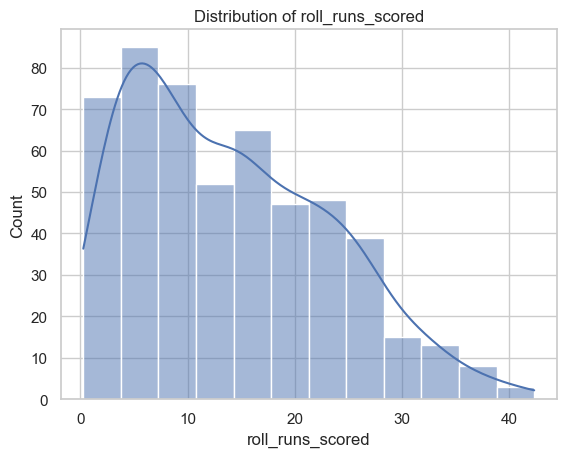

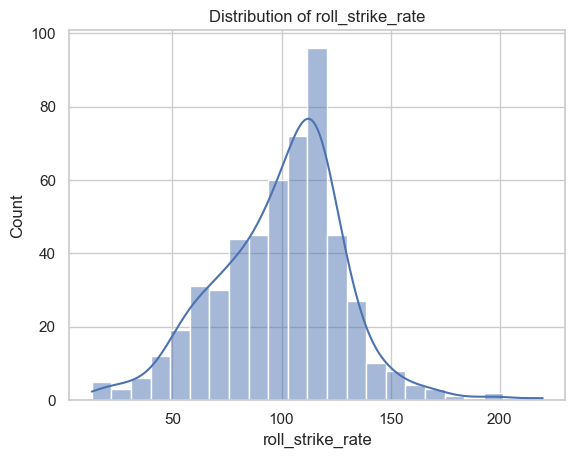

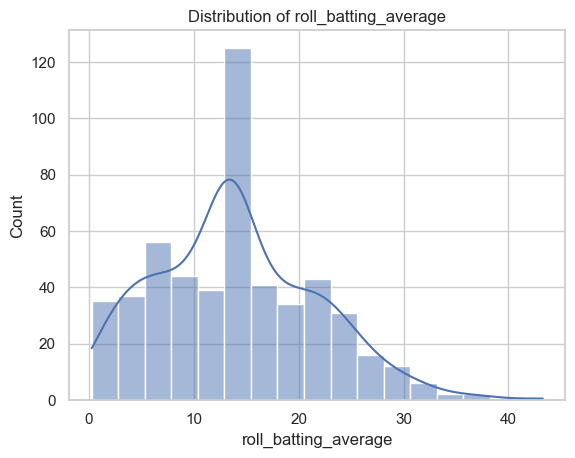

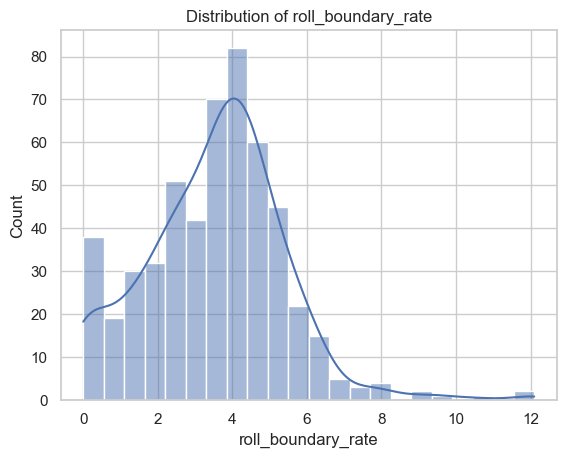

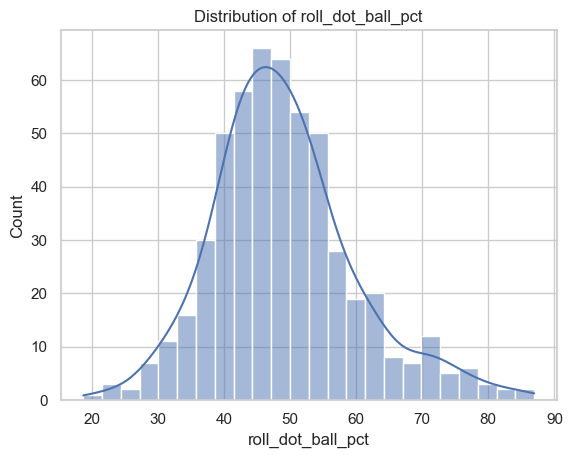

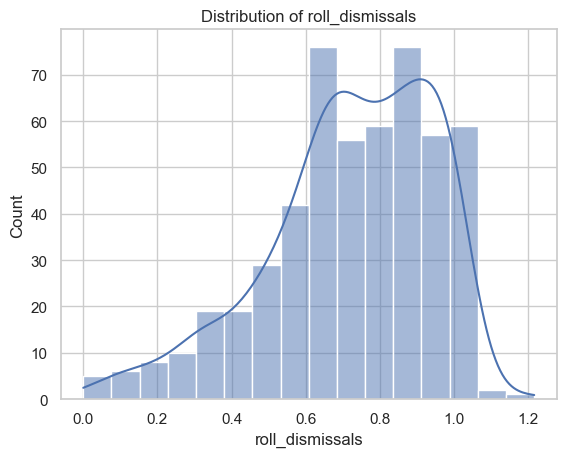

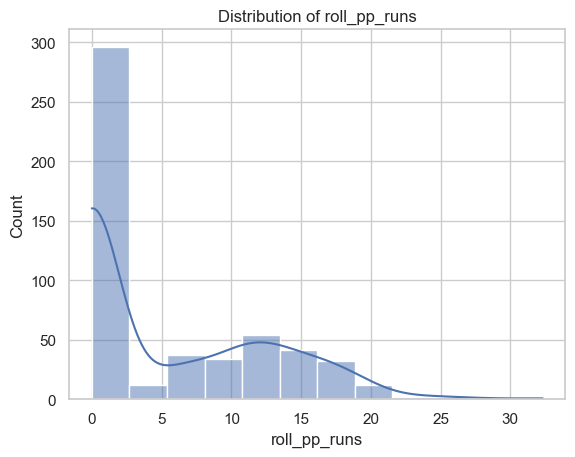

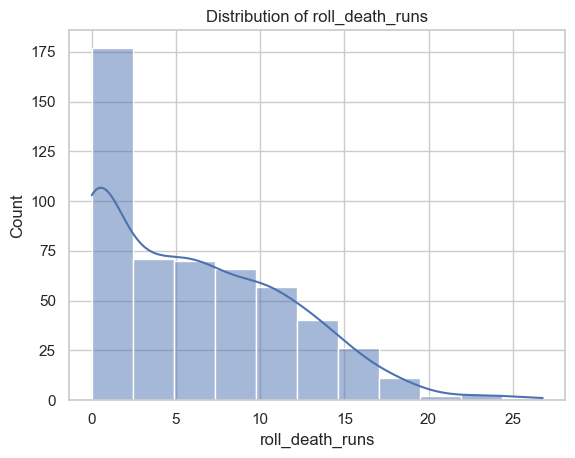

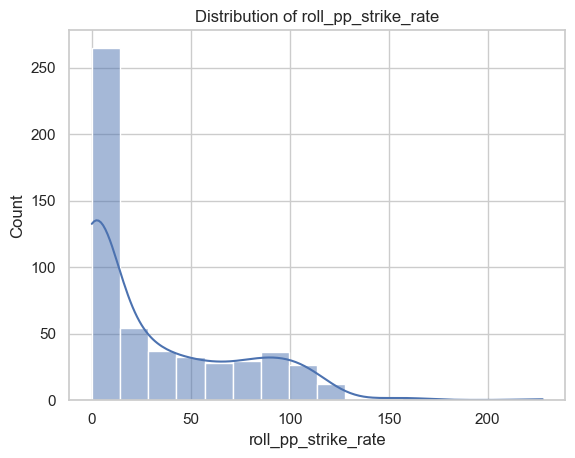

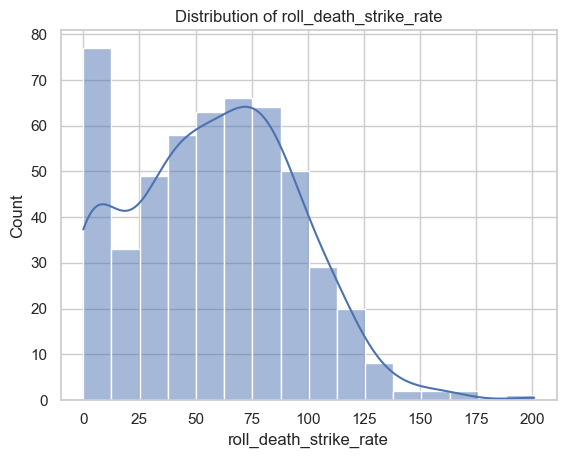

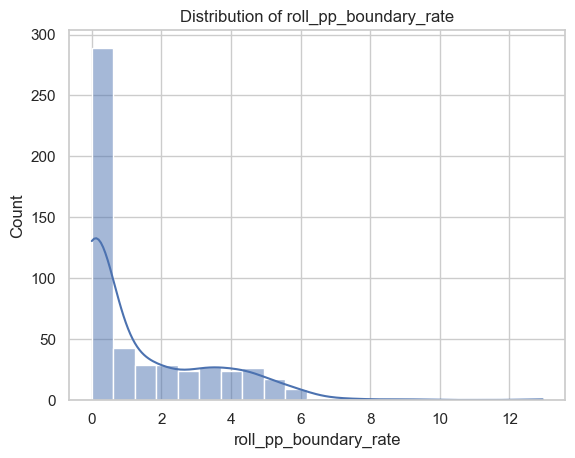

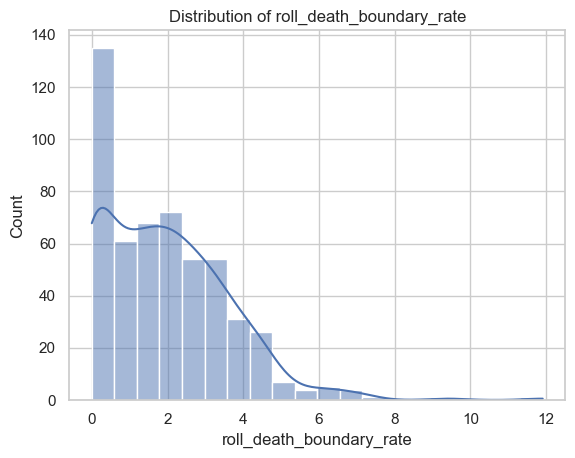

In [109]:
#Inspect the Distribution Before Scaling
for col in feat_cols:
    sns.histplot(batting_features[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


In [110]:
#Scaling the Features
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\Shreyas S\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Shreyas S\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Shreyas S\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Shreyas S\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memor

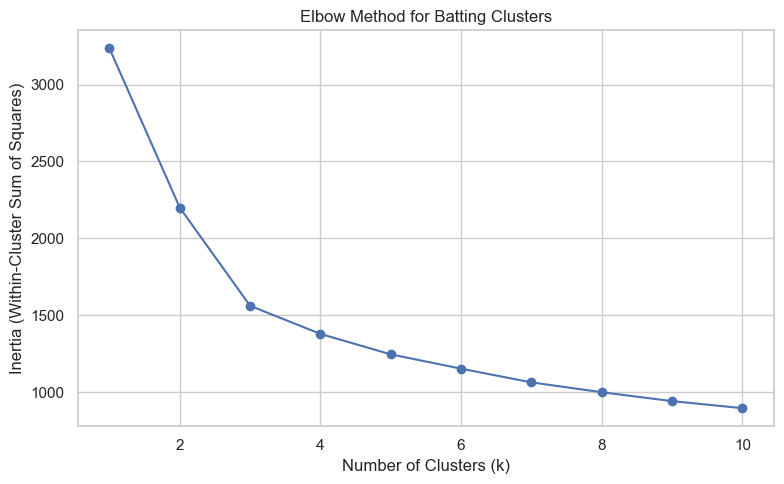

In [111]:
#Elbow Method
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=20)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Batting Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [112]:
from sklearn.decomposition import PCA

#PCA
pca = PCA(n_components=2)
bat_pca = pca.fit_transform(X_scaled)

#Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.sum()

print(f"Explained variance by PC1 and PC2: {cumulative_variance:.2%}")

#KMeans with k = 3
k_bat = KMeans(n_clusters=3, random_state=42, n_init=20)
batting_features['cluster'] = k_bat.fit_predict(X_scaled)


Explained variance by PC1 and PC2: 75.80%


C:\Users\Shreyas S\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


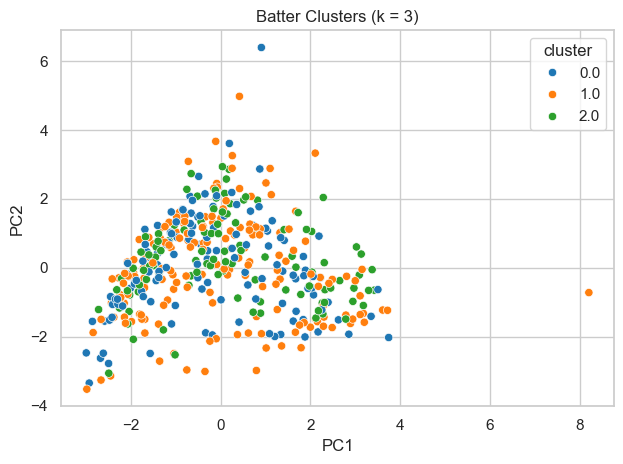

In [113]:
#Create a DataFrame for plotting
batting_cluster_df = pd.DataFrame(bat_pca, columns=['PC1', 'PC2'])
batting_cluster_df['cluster'] = batting_features['cluster']

#Visualization
sns.scatterplot(data=batting_cluster_df, x='PC1', y='PC2', hue='cluster', palette='tab10')
plt.title("Batter Clusters (k = 3)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [114]:
batting_features.groupby('cluster')[feat_cols].mean().round(2)

roll_runs_scored  roll_strike_rate  roll_batting_average  \
cluster                                                             
0                    5.13             67.20                  7.87   
1                   14.10            116.74                 13.36   
2                   24.09            111.71                 22.03   

         roll_boundary_rate  roll_dot_ball_pct  roll_dismissals  roll_pp_runs  \
cluster                                                                         
0                      1.62              57.02             0.62          0.55   
1                      4.18              42.51             0.68          3.02   
2                      4.77              49.50             0.90         14.64   

         roll_death_runs  roll_pp_strike_rate  roll_death_strike_rate  \
cluster                                                                 
0                   2.70                 7.23                   50.42   
1                   9.32                13.81                   88.70   
2                   5.25                88.39                   22.39   

         roll_pp_boundary_rate  roll_death_boundary_rate  
cluster                                                   
0                         0.27                      1.11  
1                         0.51                      3.35  
2                         4.07                      0.88

In [115]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Use the same scaled feature matrix and current cluster labels
X_final = X_scaled
labels_final = batting_features['cluster']

#Compute scores
sil_score = silhouette_score(X_final, labels_final)
calinski_score = calinski_harabasz_score(X_final, labels_final)
davies_score = davies_bouldin_score(X_final, labels_final)

#Print results
print(" Clustering Validation Metrics")
print(f" Silhouette Score        : {sil_score:.4f} ")
print(f" Calinski-Harabasz Index: {calinski_score:.2f} ")
print(f" Davies-Bouldin Index    : {davies_score:.4f} ")


 Clustering Validation Metrics
 Silhouette Score        : 0.3114 
 Calinski-Harabasz Index: 279.38 
 Davies-Bouldin Index    : 1.1454 


In [116]:
role_map = {
    0: "Tailenders / Lower order batters",
    1: "All-Rounder / Finisher",
    2: "Top-Order / Anchor"
}

#Apply labels
batting_features['role_label'] = batting_features['cluster'].map(role_map)

In [117]:
##Group batters by cluster and list them
for cluster_id in sorted(batting_features['cluster'].unique()):
    role_name = role_map[cluster_id]
    batters_in_cluster = batting_features[batting_features['cluster'] == cluster_id]['batter'].tolist()
    print(f"\n Cluster {cluster_id} — {role_name} | Total: {len(batters_in_cluster)} players")
    print(batters_in_cluster)


 Cluster 0 — Tailenders / Lower order batters | Total: 167 players
['A Chopra', 'A Kumble', 'A Mishra', 'A Nehra', 'A Singh', 'A Zampa', 'AA Bilakhia', 'AB Barath', 'AB Dinda', 'AC Thomas', 'AD Mascarenhas', 'AD Nath', 'AF Milne', 'AG Murtaza', 'AG Paunikar', 'AJ Turner', 'AS Joseph', 'AS Rajpoot', 'AS Roy', 'Anirudh Singh', 'Ankit Sharma', 'Anureet Singh', 'Arshdeep Singh', 'B Indrajith', 'B Kumar', 'B Laughlin', 'BAW Mendis', 'BB Sran', 'BMAJ Mendis', 'Basil Thampi', 'C Sakariya', 'CJ Ferguson', 'CJ Jordan', 'CK Kapugedera', 'CV Varun', 'DE Bollinger', 'DJ Thornely', 'DJ Willey', 'DL Chahar', 'F Behardien', 'FA Allen', 'G Coetzee', 'GC Viljoen', 'GH Vihari', 'HE van der Dussen', 'Harshit Rana', 'IR Jaggi', 'Imran Tahir', 'Iqbal Abdulla', 'J Arunkumar', 'J Theron', 'JA Richardson', 'JDS Neesham', 'JJ Bumrah', 'JJ van der Wath', 'JR Hazlewood', 'Jaskaran Singh', 'Joginder Sharma', 'KB Arun Karthik', 'KC Cariappa', 'KJ Abbott', 'KK Ahmed', 'KL Nagarkoti', 'KMA Paul', 'KP Appanna', 'KS 

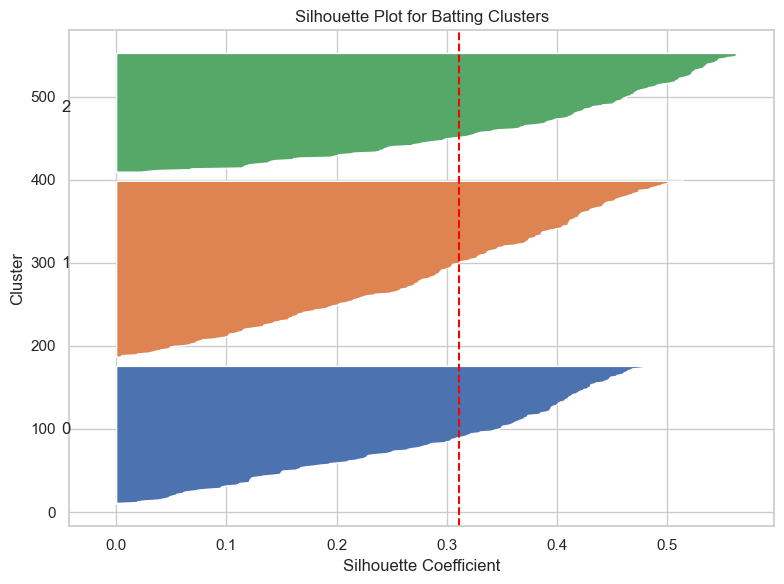

In [118]:
#Silhouette plot for batting clusters
from sklearn.metrics import silhouette_samples

#Compute silhouette values for each sample
sil_vals = silhouette_samples(X_final, labels_final)
n_clusters = labels_final.nunique()

#Silhouette plot
y_lower = 10
plt.figure(figsize=(8, 6))

for i in range(n_clusters):
    cluster_sil_vals = sil_vals[labels_final == i]
    cluster_sil_vals.sort()
    size = cluster_sil_vals.shape[0]
    y_upper = y_lower + size

    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_sil_vals)
    plt.text(-0.05, y_lower + 0.5 * size, str(i))
    y_lower = y_upper + 10  

#Mean silhouette score line
plt.axvline(sil_vals.mean(), color="red", linestyle="--")
plt.title("Silhouette Plot for Batting Clusters")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()


Bowling

In [120]:
#Bowling Rolling averages
#1. Aggregate per match for each bowler
bowling_per_match = cleaned_deliveries_df.groupby(
    ['match_id','bowler']
).agg(
    runs_conceded=('total_runs','sum'),
    balls_bowled=('ball','count'),
    wickets=('player_dismissed', lambda x: x.notnull().sum())
).reset_index()

#2. Merge season for ordering
bowling_per_match = bowling_per_match.merge(
    cleaned_matches_df[['id','season']],
    left_on='match_id', right_on='id', how='left'
).drop(columns='id')

#3. Computing bowling average, strike rate and economy
bowling_per_match['bowling_average'] = (
    bowling_per_match['runs_conceded'] 
    / bowling_per_match['wickets'].replace(0, np.nan)
)
bowling_per_match['bowling_strike_rate'] = (
    bowling_per_match['balls_bowled'] 
    / bowling_per_match['wickets'].replace(0, np.nan)
)
bowling_per_match['economy'] = (
    bowling_per_match['runs_conceded'] 
    / bowling_per_match['balls_bowled']
) * 6

#Sort chronologically
bowling_per_match = bowling_per_match.sort_values(by=['bowler', 'season', 'match_id'])


In [121]:
#Bowling Rolling Metrics
#Rolling economy
bowling_per_match['roll_economy'] = (
    bowling_per_match
      .groupby('bowler')['economy']
      .transform(lambda x: x.rolling(window, min_periods=3).mean())
)

#Rolling bowling average
bowling_per_match['roll_bowling_average'] = (
    bowling_per_match
      .groupby('bowler')['bowling_average']
      .transform(lambda x: x.rolling(window, min_periods=3).mean())
)

#Rolling bowling strike rate
bowling_per_match['roll_bowling_strike_rate'] = (
    bowling_per_match
      .groupby('bowler')['bowling_strike_rate']
      .transform(lambda x: x.rolling(window, min_periods=3).mean())
)

#Rolling wickets
bowling_per_match['roll_wickets'] = (
    bowling_per_match
      .groupby('bowler')['wickets']
      .transform(lambda x: x.rolling(window, min_periods=3).mean())
)

In [122]:
print(bowling_per_match.head(6))

      match_id          bowler  runs_conceded  balls_bowled  wickets  season  \
3267    548329  A Ashish Reddy             29            12        0    2012   
3384    548341  A Ashish Reddy             32            24        2    2012   
3442    548346  A Ashish Reddy             11            14        1    2012   
3468    548348  A Ashish Reddy             32            19        1    2012   
3518    548352  A Ashish Reddy             16            13        1    2012   
3568    548356  A Ashish Reddy             36            25        1    2012   

      bowling_average  bowling_strike_rate    economy  roll_economy  \
3267              NaN                  NaN  14.500000           NaN   
3384             16.0                 12.0   8.000000           NaN   
3442             11.0                 14.0   4.714286      9.071429   
3468             32.0                 19.0  10.105263      9.329887   
3518             16.0                 13.0   7.384615      8.940833   
3568         

In [123]:
print(bowling_per_match.columns)

Index(['match_id', 'bowler', 'runs_conceded', 'balls_bowled', 'wickets',
       'season', 'bowling_average', 'bowling_strike_rate', 'economy',
       'roll_economy', 'roll_bowling_average', 'roll_bowling_strike_rate',
       'roll_wickets'],
      dtype='object')


In [124]:
bowling_features = bowling_per_match.groupby('bowler')[[
    'roll_economy',
    'roll_bowling_average',
    'roll_bowling_strike_rate',
    'roll_wickets'
]].mean().reset_index()


In [125]:
print(bowling_features.head(7))

           bowler  roll_economy  roll_bowling_average  \
0  A Ashish Reddy      9.285944             16.590686   
1        A Badoni      5.300000                   NaN   
2      A Chandila      6.176806             10.642857   
3     A Choudhary      8.517273             30.229167   
4     A Dananjaya           NaN                   NaN   
5      A Flintoff      9.138889                   NaN   
6        A Kamboj     10.075137                   NaN   

   roll_bowling_strike_rate  roll_wickets  
0                 11.988235      0.972222  
1                       NaN      0.522222  
2                 12.857143      1.008333  
3                 21.083333      0.888889  
4                       NaN           NaN  
5                       NaN      0.666667  
6                       NaN      0.666667  


In [126]:
print(bowling_features.isna().sum())

bowler                        0
roll_economy                111
roll_bowling_average        184
roll_bowling_strike_rate    184
roll_wickets                111
dtype: int64


In [127]:
#Remove bowlers with no economy (i.e., never bowled valid deliveries)
bowling_features = bowling_features[bowling_features['roll_economy'].notna()]

In [128]:
#Flag bowlers with no wickets
bowling_features['no_wickets'] = (
    bowling_features['roll_wickets'] == 0
).astype(int)

#Impute NaNs for avg and strike rate with medians
bowling_features['roll_bowling_average'].fillna(
    bowling_features['roll_bowling_average'].median(), inplace=True
)

bowling_features['roll_bowling_strike_rate'].fillna(
    bowling_features['roll_bowling_strike_rate'].median(), inplace=True
)


C:\Users\Shreyas S\AppData\Local\Temp\ipykernel_8752\3314786653.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bowling_features['roll_bowling_average'].fillna(
C:\Users\Shreyas S\AppData\Local\Temp\ipykernel_8752\3314786653.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [129]:
print(bowling_features.isna().sum())

bowler                      0
roll_economy                0
roll_bowling_average        0
roll_bowling_strike_rate    0
roll_wickets                0
no_wickets                  0
dtype: int64


In [130]:
bowling_feat_cols = [
    'roll_economy',
    'roll_bowling_average',
    'roll_bowling_strike_rate',
    'roll_wickets'
]

scaler = RobustScaler()
X_bowl_scaled = scaler.fit_transform(bowling_features[bowling_feat_cols])

C:\Users\Shreyas S\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Shreyas S\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Shreyas S\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Shreyas S\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memor

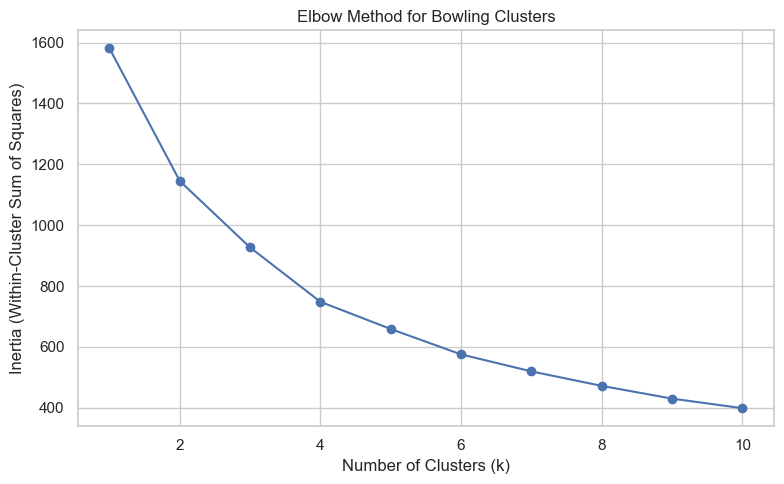

In [131]:
#Elbow Method for Bowling Clusters
inertia_b = []

for k in range(1, 11):  
    km_b = KMeans(n_clusters=k, random_state=42, n_init=20)
    km_b.fit(X_bowl_scaled)  
    inertia_b.append(km_b.inertia_)

#Plotting
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia_b, marker='o')
plt.title("Elbow Method for Bowling Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [132]:
#PCA on scaled bowling data
pca_b = PCA(n_components=2)
bowl_pca = pca_b.fit_transform(X_bowl_scaled)

#KMeans clustering with k=3
k_bowl = KMeans(n_clusters=3, random_state=42, n_init=20)
bowl_labels = k_bowl.fit_predict(X_bowl_scaled)

#Attach labels to bowling_features
bowling_features['cluster'] = bowl_labels

bowling_cluster_df = pd.DataFrame(bowl_pca, columns=['PC1', 'PC2'])
bowling_cluster_df['cluster'] = bowl_labels

C:\Users\Shreyas S\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


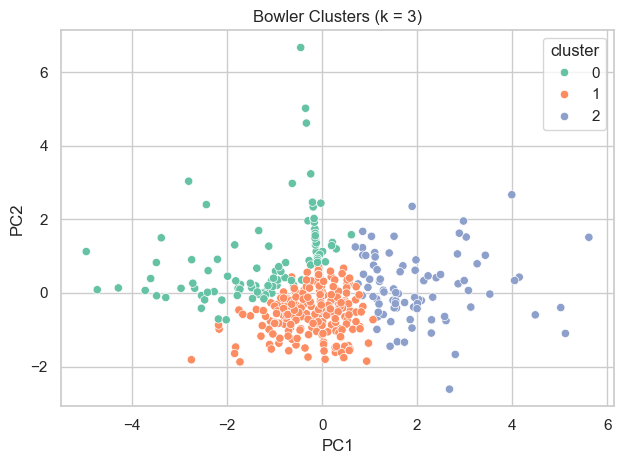

In [133]:
sns.scatterplot(data=bowling_cluster_df, x='PC1', y='PC2', hue='cluster', palette='Set2')
plt.title("Bowler Clusters (k = 3)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [134]:
bowling_features.groupby("cluster")[[
    'roll_economy', 'roll_bowling_average', 'roll_bowling_strike_rate', 'roll_wickets']].mean().round(2)


roll_economy  roll_bowling_average  roll_bowling_strike_rate  \
cluster                                                                 
0                9.84                 24.70                     17.31   
1                7.94                 20.84                     16.50   
2                8.62                 15.82                     12.24   

         roll_wickets  
cluster                
0                0.78  
1                0.99  
2                0.96

In [135]:
for c in sorted(bowling_features['cluster'].unique()):
    print(f"\nCluster {c} Bowlers ({(bowling_features['cluster']==c).sum()}):")
    print(bowling_features[bowling_features['cluster'] == c]['bowler'].tolist())



Cluster 0 Bowlers (107):
['A Choudhary', 'A Kamboj', 'A Mithun', 'AA Chavan', 'AA Jhunjhunwala', 'AB Agarkar', 'AF Milne', 'AN Ahmed', 'AP Dole', 'AS Joseph', 'AS Rajpoot', 'AS Raut', 'AUK Pathan', 'Abdul Samad', 'Akash Deep', 'Akash Singh', 'Anureet Singh', 'Arshad Khan', 'Azmatullah Omarzai', 'B Laughlin', 'BB Sran', 'Basil Thampi', 'C Sakariya', 'CJ Anderson', 'CK Kapugedera', 'CL White', 'D Kalyankrishna', 'D Salunkhe', 'DJ Mitchell', 'DR Sams', 'G Coetzee', 'GC Viljoen', 'GHS Garton', 'Gagandeep Singh', 'HF Gurney', 'HR Shokeen', 'I Udana', 'J Little', 'J Suchith', 'J Theron', 'JA Richardson', 'JDS Neesham', 'JJ van der Wath', 'JP Behrendorff', 'JPR Scantlebury-Searles', 'JR Hopes', 'Joginder Sharma', 'K Goel', 'K Khejroliya', 'KA Jamieson', 'KC Cariappa', 'KJ Abbott', 'KM Asif', 'KR Sen', 'Kartik Tyagi', 'LE Plunkett', 'LJ Wright', 'M Jansen', 'M Prasidh Krishna', 'M Vijay', 'MJ Henry', 'MK Tiwary', 'MS Gony', 'Mohammad Asif', 'Mukesh Kumar', 'N Thushara', 'ND Doshi', 'Naman Dhi

In [136]:
cluster_names = {
    0: "Support/Expensive Bowlers",
    1: "Economical/Control Bowlers",
    2: "Strike Bowlers"
}
bowling_features["role"] = bowling_features["cluster"].map(cluster_names)


In [137]:
#Group and display bowlers by cluster
for cluster_id in sorted(bowling_features['cluster'].unique()):
    role_name = cluster_names[cluster_id]
    bowlers_in_cluster = bowling_features[bowling_features['cluster'] == cluster_id]['bowler'].tolist()
    print(f"\n Cluster {cluster_id} — {role_name} | Total: {len(bowlers_in_cluster)} players")
    print(bowlers_in_cluster)


 Cluster 0 — Support/Expensive Bowlers | Total: 107 players
['A Choudhary', 'A Kamboj', 'A Mithun', 'AA Chavan', 'AA Jhunjhunwala', 'AB Agarkar', 'AF Milne', 'AN Ahmed', 'AP Dole', 'AS Joseph', 'AS Rajpoot', 'AS Raut', 'AUK Pathan', 'Abdul Samad', 'Akash Deep', 'Akash Singh', 'Anureet Singh', 'Arshad Khan', 'Azmatullah Omarzai', 'B Laughlin', 'BB Sran', 'Basil Thampi', 'C Sakariya', 'CJ Anderson', 'CK Kapugedera', 'CL White', 'D Kalyankrishna', 'D Salunkhe', 'DJ Mitchell', 'DR Sams', 'G Coetzee', 'GC Viljoen', 'GHS Garton', 'Gagandeep Singh', 'HF Gurney', 'HR Shokeen', 'I Udana', 'J Little', 'J Suchith', 'J Theron', 'JA Richardson', 'JDS Neesham', 'JJ van der Wath', 'JP Behrendorff', 'JPR Scantlebury-Searles', 'JR Hopes', 'Joginder Sharma', 'K Goel', 'K Khejroliya', 'KA Jamieson', 'KC Cariappa', 'KJ Abbott', 'KM Asif', 'KR Sen', 'Kartik Tyagi', 'LE Plunkett', 'LJ Wright', 'M Jansen', 'M Prasidh Krishna', 'M Vijay', 'MJ Henry', 'MK Tiwary', 'MS Gony', 'Mohammad Asif', 'Mukesh Kumar', '

In [138]:
#Use the scaled bowling features and current cluster labels
Xb_final = X_bowl_scaled
labelsb_final = bowling_features['cluster']

#Compute clustering validation metrics
sil_score = silhouette_score(Xb_final, labelsb_final)
calinski_score = calinski_harabasz_score(Xb_final, labelsb_final)
davies_score = davies_bouldin_score(Xb_final, labelsb_final)

#Print the results
print(" Clustering Validation Metrics (Bowling)")
print(f" Silhouette Score        : {sil_score:.4f}")
print(f" Calinski-Harabasz Index: {calinski_score:.2f}")
print(f" Davies-Bouldin Index    : {davies_score:.4f}")


 Clustering Validation Metrics (Bowling)
 Silhouette Score        : 0.2514
 Calinski-Harabasz Index: 146.49
 Davies-Bouldin Index    : 1.4194


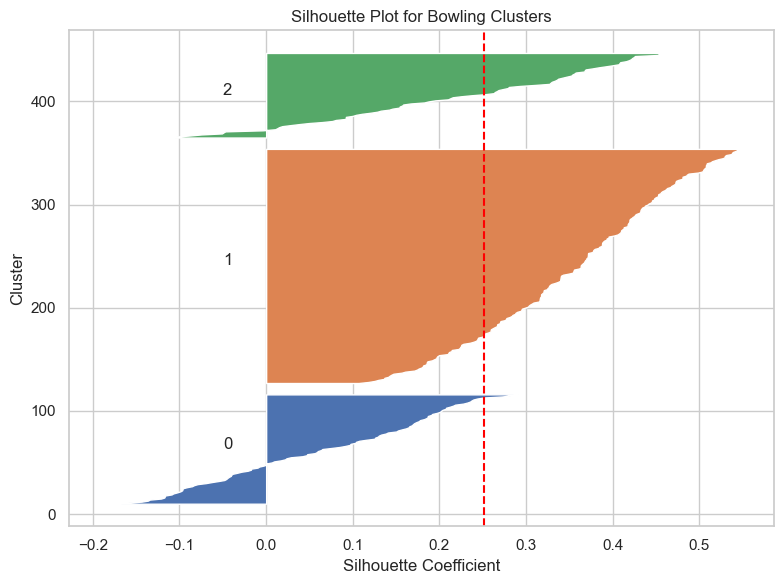

In [139]:
#Silhouette plot for bowling clusters
from sklearn.metrics import silhouette_samples

#Compute silhouette values for each sample
sil_vals = silhouette_samples(Xb_final, labelsb_final)
n_clusters = labelsb_final.nunique()

#Silhouette plot
y_lower = 10
plt.figure(figsize=(8, 6))

for i in range(n_clusters):
    cluster_sil_vals = sil_vals[labelsb_final == i]
    cluster_sil_vals.sort()
    size = cluster_sil_vals.shape[0]
    y_upper = y_lower + size

    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_sil_vals)
    plt.text(-0.05, y_lower + 0.5 * size, str(i))
    y_lower = y_upper + 10  

#Mean silhouette score line
plt.axvline(sil_vals.mean(), color="red", linestyle="--")
plt.title("Silhouette Plot for Bowling Clusters")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()


In [140]:
print(bowling_features.head(7))

           bowler  roll_economy  roll_bowling_average  \
0  A Ashish Reddy      9.285944             16.590686   
1        A Badoni      5.300000             20.791846   
2      A Chandila      6.176806             10.642857   
3     A Choudhary      8.517273             30.229167   
5      A Flintoff      9.138889             20.791846   
6        A Kamboj     10.075137             20.791846   
7        A Kumble      6.656131             16.723571   

   roll_bowling_strike_rate  roll_wickets  no_wickets  cluster  \
0                 11.988235      0.972222           0        2   
1                 16.059578      0.522222           0        1   
2                 12.857143      1.008333           0        2   
3                 21.083333      0.888889           0        0   
5                 16.059578      0.666667           0        1   
6                 16.059578      0.666667           0        0   
7                 16.592952      1.114167           0        1   

              

In [141]:
#Compute Matches Played per Bowler
bowler_match_counts = bowling_per_match.groupby('bowler')['match_id'].nunique().reset_index()
bowler_match_counts.columns = ['bowler', 'matches_played']

#Merge into bowling_features
bowling_features = bowling_features.merge(bowler_match_counts, on='bowler', how='left')


In [142]:
bowling_features['low_data_flag'] = (bowling_features['matches_played'] < 3).astype(int)

In [143]:
bowling_features[['roll_bowling_average', 'roll_bowling_strike_rate']].describe(percentiles=[.95, .99])


roll_bowling_average  roll_bowling_strike_rate
count            418.000000                418.000000
mean              20.831807                 15.861453
std                4.003788                  2.529920
min                7.833333                  5.000000
50%               20.791846                 16.059578
95%               27.782455                 19.972781
99%               31.879444                 21.928917
max               38.000000                 24.666667

In [144]:
#Removes all bowlers who have played fewer than 3 matches
bowling_features = bowling_features[bowling_features['matches_played'] >= 3].copy()


In [145]:
bowling_features[['roll_economy', 'roll_wickets']].describe(percentiles=[.95, .99])


roll_economy  roll_wickets
count    418.000000    418.000000
mean       8.561019      0.927114
std        1.333057      0.431368
min        5.300000      0.000000
50%        8.429374      0.937269
95%       10.726649      1.619038
99%       13.010396      2.142125
max       18.066667      2.416667

In [146]:
#Cap Extreme Values
#Based on earlier percentiles
bowling_features['roll_bowling_average'] = bowling_features['roll_bowling_average'].clip(upper=32)
bowling_features['roll_bowling_strike_rate'] = bowling_features['roll_bowling_strike_rate'].clip(upper=22)
bowling_features['roll_economy'] = bowling_features['roll_economy'].clip(upper=14)  
bowling_features['roll_wickets'] = bowling_features['roll_wickets'].clip(upper=3)   


In [147]:
print(bowling_features.head(7))

           bowler  roll_economy  roll_bowling_average  \
0  A Ashish Reddy      9.285944             16.590686   
1        A Badoni      5.300000             20.791846   
2      A Chandila      6.176806             10.642857   
3     A Choudhary      8.517273             30.229167   
4      A Flintoff      9.138889             20.791846   
5        A Kamboj     10.075137             20.791846   
6        A Kumble      6.656131             16.723571   

   roll_bowling_strike_rate  roll_wickets  no_wickets  cluster  \
0                 11.988235      0.972222           0        2   
1                 16.059578      0.522222           0        1   
2                 12.857143      1.008333           0        2   
3                 21.083333      0.888889           0        0   
4                 16.059578      0.666667           0        1   
5                 16.059578      0.666667           0        0   
6                 16.592952      1.114167           0        1   

              

In [148]:
bowling_features.isna().sum()

bowler                      0
roll_economy                0
roll_bowling_average        0
roll_bowling_strike_rate    0
roll_wickets                0
no_wickets                  0
cluster                     0
role                        0
matches_played              0
low_data_flag               0
dtype: int64

In [149]:
bowling_feat_cols = [
    'roll_economy',
    'roll_bowling_average',
    'roll_bowling_strike_rate',
    'roll_wickets'
]

scaler = RobustScaler()
X_bowl_scaled = scaler.fit_transform(bowling_features[bowling_feat_cols])

pca_b = PCA(n_components=2)
bowl_pca = pca_b.fit_transform(X_bowl_scaled)

#Explained variance for bowling
explained_variance = pca_b.explained_variance_ratio_
cumulative_variance = explained_variance.sum()

print(f"Explained variance(Bowling) by PC1 and PC2: {cumulative_variance:.2%}")

k_bowl = KMeans(n_clusters=4, random_state=42, n_init=20)
bowl_labels = k_bowl.fit_predict(X_bowl_scaled)
bowling_features['cluster'] = bowl_labels

bowling_cluster_df = pd.DataFrame(bowl_pca, columns=['PC1', 'PC2'])
bowling_cluster_df['cluster'] = bowl_labels

Explained variance(Bowling) by PC1 and PC2: 80.34%


C:\Users\Shreyas S\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


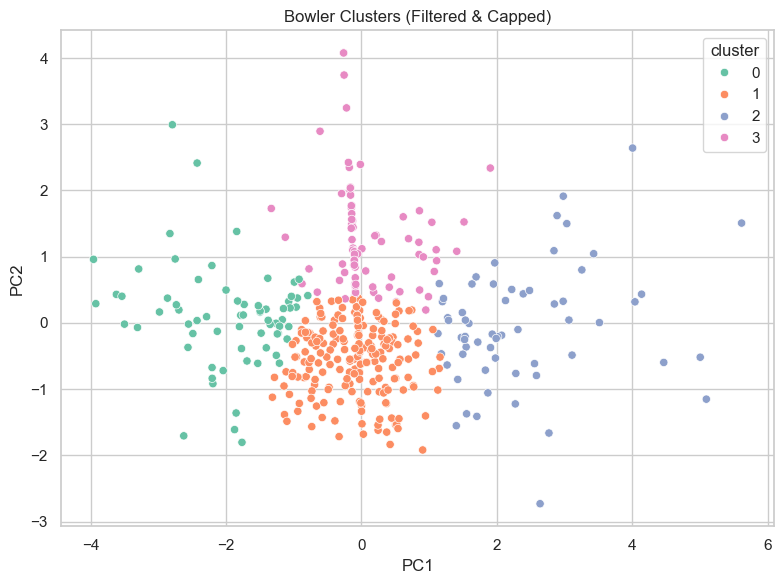

In [150]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=bowling_cluster_df, x='PC1', y='PC2', hue='cluster', palette='Set2')
plt.title("Bowler Clusters (Filtered & Capped)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [151]:
X_final = X_bowl_scaled
labels_final = bowling_features['cluster']

print("Silhouette Score        :", silhouette_score(X_final, labels_final).round(4))
print("Calinski-Harabasz Index :", calinski_harabasz_score(X_final, labels_final).round(2))
print("Davies-Bouldin Index    :", davies_bouldin_score(X_final, labels_final).round(4))


Silhouette Score        : 0.2701
Calinski-Harabasz Index : 161.81
Davies-Bouldin Index    : 1.1487


In [152]:
bowling_features.groupby("cluster")[[
    'roll_economy', 'roll_bowling_average', 'roll_bowling_strike_rate', 'roll_wickets']].mean().round(2)


roll_economy  roll_bowling_average  roll_bowling_strike_rate  \
cluster                                                                 
0                8.81                 26.50                     18.87   
1                7.89                 20.66                     16.29   
2                8.37                 14.82                     11.78   
3                9.95                 20.95                     15.36   

         roll_wickets  
cluster                
0                0.96  
1                1.06  
2                0.99  
3                0.55

In [153]:
for c in sorted(bowling_features['cluster'].unique()):
    print(f"\nCluster {c} Bowlers ({(bowling_features['cluster']==c).sum()}):")
    print(bowling_features[bowling_features['cluster'] == c]['bowler'].tolist())



Cluster 0 Bowlers (68):
['A Choudhary', 'A Mithun', 'AA Chavan', 'AB Agarkar', 'AF Milne', 'AN Ahmed', 'AS Joseph', 'AS Rajpoot', 'Akash Singh', 'Anand Rajan', 'Arshad Khan', 'Azmatullah Omarzai', 'B Lee', 'BAW Mendis', 'BB Sran', 'C Sakariya', 'DJ Willey', 'DP Vijaykumar', 'DR Sams', 'FH Edwards', 'G Coetzee', 'GC Viljoen', 'GHS Garton', 'Gagandeep Singh', 'HF Gurney', 'I Udana', 'IS Sodhi', 'J Little', 'J Suchith', 'J Theron', 'J Yadav', 'JP Behrendorff', 'JR Hopes', 'Joginder Sharma', 'K Kartikeya', 'KA Jamieson', 'KC Cariappa', 'KR Sen', 'Kartik Tyagi', 'M Jansen', 'M Prasidh Krishna', 'M Theekshana', 'MS Gony', 'Mohammad Asif', 'Mohsin Khan', 'Navdeep Saini', 'Nithish Kumar Reddy', 'OC McCoy', 'P Amarnath', 'PC Valthaty', 'PJ Sangwan', 'Parvez Rasool', 'R McLaren', 'RJW Topley', 'RP Meredith', 'SB Bangar', 'SM Curran', 'SMSM Senanayake', 'Shivam Mavi', 'Shivam Sharma', 'T Natarajan', 'T Shamsi', 'TA Boult', 'TK Curran', 'V Pratap Singh', 'VRV Singh', 'Vijaykumar Vyshak', 'Yash Da

In [154]:
cluster_role_map = {
    0: "Support Bowlers",
    1: "Control/Lead Bowlers",
    2: "Strike Bowlers",
    3: "Part-Time/Expensive Bowlers"
}

bowling_features["role"] = bowling_features["cluster"].map(cluster_role_map)


In [155]:
print(bowling_features.head(7))

           bowler  roll_economy  roll_bowling_average  \
0  A Ashish Reddy      9.285944             16.590686   
1        A Badoni      5.300000             20.791846   
2      A Chandila      6.176806             10.642857   
3     A Choudhary      8.517273             30.229167   
4      A Flintoff      9.138889             20.791846   
5        A Kamboj     10.075137             20.791846   
6        A Kumble      6.656131             16.723571   

   roll_bowling_strike_rate  roll_wickets  no_wickets  cluster  \
0                 11.988235      0.972222           0        2   
1                 16.059578      0.522222           0        1   
2                 12.857143      1.008333           0        2   
3                 21.083333      0.888889           0        0   
4                 16.059578      0.666667           0        3   
5                 16.059578      0.666667           0        3   
6                 16.592952      1.114167           0        1   

              

In [156]:
#Group and display bowlers by cluster
for cluster_id in sorted(bowling_features['cluster'].unique()):
    role_name = cluster_role_map[cluster_id]
    bowlers_in_cluster = bowling_features[bowling_features['cluster'] == cluster_id]['bowler'].tolist()
    print(f"\n Cluster {cluster_id} — {role_name} | Total: {len(bowlers_in_cluster)} players")
    print(bowlers_in_cluster)


 Cluster 0 — Support Bowlers | Total: 68 players
['A Choudhary', 'A Mithun', 'AA Chavan', 'AB Agarkar', 'AF Milne', 'AN Ahmed', 'AS Joseph', 'AS Rajpoot', 'Akash Singh', 'Anand Rajan', 'Arshad Khan', 'Azmatullah Omarzai', 'B Lee', 'BAW Mendis', 'BB Sran', 'C Sakariya', 'DJ Willey', 'DP Vijaykumar', 'DR Sams', 'FH Edwards', 'G Coetzee', 'GC Viljoen', 'GHS Garton', 'Gagandeep Singh', 'HF Gurney', 'I Udana', 'IS Sodhi', 'J Little', 'J Suchith', 'J Theron', 'J Yadav', 'JP Behrendorff', 'JR Hopes', 'Joginder Sharma', 'K Kartikeya', 'KA Jamieson', 'KC Cariappa', 'KR Sen', 'Kartik Tyagi', 'M Jansen', 'M Prasidh Krishna', 'M Theekshana', 'MS Gony', 'Mohammad Asif', 'Mohsin Khan', 'Navdeep Saini', 'Nithish Kumar Reddy', 'OC McCoy', 'P Amarnath', 'PC Valthaty', 'PJ Sangwan', 'Parvez Rasool', 'R McLaren', 'RJW Topley', 'RP Meredith', 'SB Bangar', 'SM Curran', 'SMSM Senanayake', 'Shivam Mavi', 'Shivam Sharma', 'T Natarajan', 'T Shamsi', 'TA Boult', 'TK Curran', 'V Pratap Singh', 'VRV Singh', 'Vij

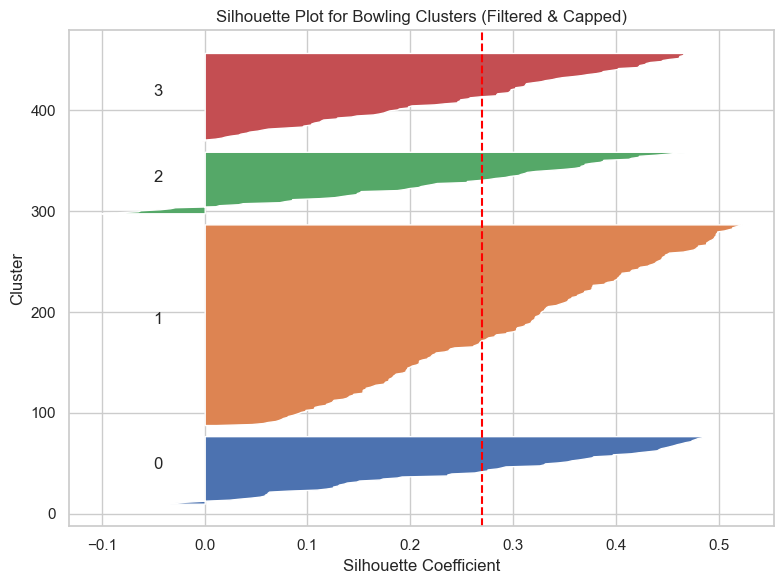

In [157]:
#Compute silhouette values for each sample
sil_vals = silhouette_samples(X_final, labels_final)
n_clusters = labels_final.nunique()

#Silhouette plot
y_lower = 10
plt.figure(figsize=(8, 6))

for i in range(n_clusters):
    cluster_sil_vals = sil_vals[labels_final == i]
    cluster_sil_vals.sort()
    size = cluster_sil_vals.shape[0]
    y_upper = y_lower + size

    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_sil_vals)
    plt.text(-0.05, y_lower + 0.5 * size, str(i))
    y_lower = y_upper + 10  

#Mean silhouette score line
plt.axvline(sil_vals.mean(), color="red", linestyle="--")
plt.title("Silhouette Plot for Bowling Clusters (Filtered & Capped)")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()


In [158]:
batting_per_match.to_csv("batting_rolling_metrics.csv", index=False)
bowling_per_match.to_csv("bowling_rolling_metrics.csv", index=False)


In [159]:
batting_features[['batter','cluster','role_label']].drop_duplicates().head(15)

batter  cluster                        role_label
0   A Ashish Reddy        1            All-Rounder / Finisher
1         A Badoni        1            All-Rounder / Finisher
3         A Chopra        0  Tailenders / Lower order batters
4      A Choudhary        1            All-Rounder / Finisher
6       A Flintoff        1            All-Rounder / Finisher
8         A Kumble        0  Tailenders / Lower order batters
9        A Manohar        1            All-Rounder / Finisher
10        A Mishra        0  Tailenders / Lower order batters
11        A Mithun        1            All-Rounder / Finisher
13         A Nehra        0  Tailenders / Lower order batters
14        A Nortje        1            All-Rounder / Finisher
15   A Raghuvanshi        2                Top-Order / Anchor
16         A Singh        0  Tailenders / Lower order batters
17       A Symonds        1            All-Rounder / Finisher
20         A Zampa        0  Tailenders / Lower order batters

In [160]:
bowling_features[['bowler','cluster','role']].drop_duplicates().head(15)

bowler  cluster                         role
0   A Ashish Reddy        2               Strike Bowlers
1         A Badoni        1         Control/Lead Bowlers
2       A Chandila        2               Strike Bowlers
3      A Choudhary        0              Support Bowlers
4       A Flintoff        3  Part-Time/Expensive Bowlers
5         A Kamboj        3  Part-Time/Expensive Bowlers
6         A Kumble        1         Control/Lead Bowlers
7         A Mishra        1         Control/Lead Bowlers
8         A Mithun        0              Support Bowlers
9          A Nehra        1         Control/Lead Bowlers
10        A Nortje        1         Control/Lead Bowlers
11         A Singh        1         Control/Lead Bowlers
12       A Symonds        1         Control/Lead Bowlers
13         A Zampa        1         Control/Lead Bowlers
14       AA Chavan        0              Support Bowlers

In [161]:
def plot_radar_compare(players, df, features, label_col='batter'):
    from math import pi

    categories = features
    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)] + [0]

    plt.figure(figsize=(7, 7))
    ax = plt.subplot(111, polar=True)

    colors = sns.color_palette("Set2", n_colors=len(players))

    for i, player in enumerate(players):
        player_data = df[df[label_col] == player]
        if player_data.empty:
            print(f"⚠️ Player not found: {player}")
            continue

        values = player_data[features].values.flatten().tolist()
        values += values[:1]

        ax.plot(angles, values, linewidth=2, linestyle='solid', label=player, color=colors[i])
        ax.fill(angles, values, alpha=0.1, color=colors[i])

    ax.set_thetagrids([a * 180/pi for a in angles[:-1]], categories, fontsize=11, fontweight='bold')
    plt.title(f"Radar Profile: {' vs '.join(players)}", size=13, fontweight='bold')
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1), fontsize=10)
    plt.tight_layout()
    plt.show()


In [162]:
print(batting_features['batter'].unique())

['A Ashish Reddy' 'A Badoni' 'A Chopra' 'A Choudhary' 'A Flintoff'
 'A Kumble' 'A Manohar' 'A Mishra' 'A Mithun' 'A Nehra' 'A Nortje'
 'A Raghuvanshi' 'A Singh' 'A Symonds' 'A Zampa' 'AA Bilakhia' 'AA Chavan'
 'AA Jhunjhunwala' 'AB Agarkar' 'AB Barath' 'AB Dinda' 'AB McDonald'
 'AB de Villiers' 'AC Blizzard' 'AC Gilchrist' 'AC Thomas' 'AC Voges'
 'AD Hales' 'AD Mascarenhas' 'AD Mathews' 'AD Nath' 'AD Russell'
 'AF Milne' 'AG Murtaza' 'AG Paunikar' 'AJ Finch' 'AJ Turner' 'AJ Tye'
 'AK Markram' 'AL Menaria' 'AM Nayar' 'AM Rahane' 'AN Ahmed' 'AP Majumdar'
 'AP Tare' 'AR Patel' 'AS Joseph' 'AS Rajpoot' 'AS Raut' 'AS Roy'
 'AS Yadav' 'AT Carey' 'AT Rayudu' 'AUK Pathan' 'Abdul Samad'
 'Abhishek Sharma' 'Abishek Porel' 'Akash Deep' 'Aman Hakim Khan'
 'Anirudh Singh' 'Ankit Sharma' 'Ankit Soni' 'Anmolpreet Singh'
 'Anuj Rawat' 'Anureet Singh' 'Arshad Khan' 'Arshdeep Singh'
 'Ashutosh Sharma' 'Atharva Taide' 'Avesh Khan' 'Azhar Mahmood'
 'Azmatullah Omarzai' 'B Akhil' 'B Chipli' 'B Indrajith' '

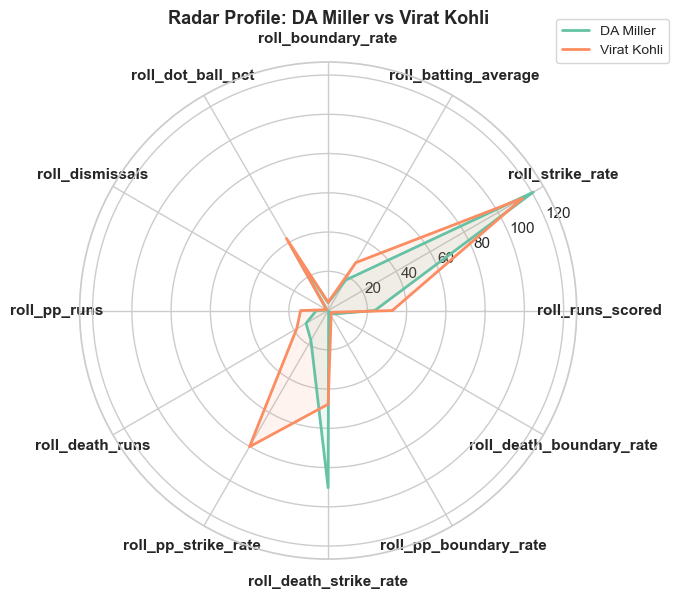

In [163]:
##Calling Radar chart function with JC Buttler and V Kohli batters
plot_radar_compare(
    players=["DA Miller", "Virat Kohli"],
    df=batting_features,
    features=feat_cols
)

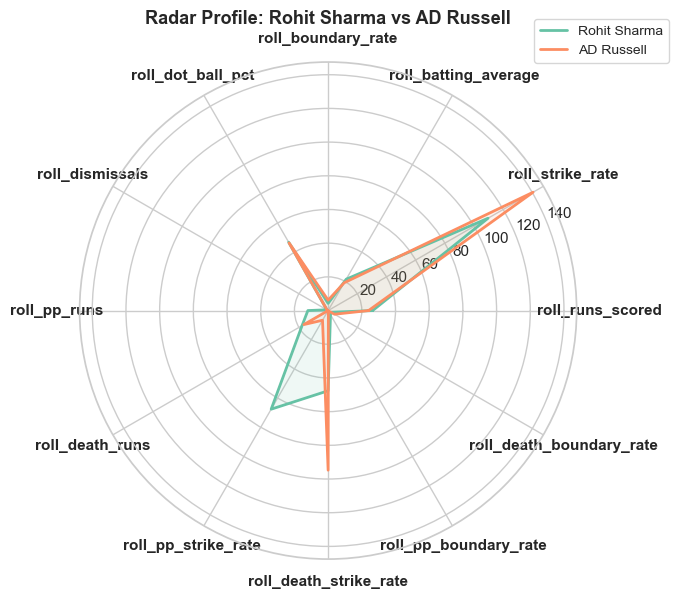

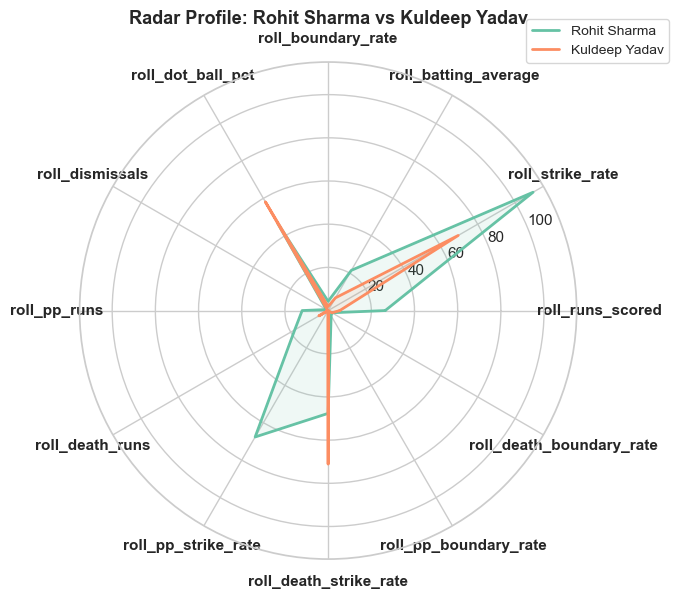

In [164]:
#Function with three players
for p in ['AD Russell', 'Kuldeep Yadav']:
    plot_radar_compare(['Rohit Sharma', p], df=batting_features, features=feat_cols)


In [165]:
print(bowling_features['bowler'].unique())

['A Ashish Reddy' 'A Badoni' 'A Chandila' 'A Choudhary' 'A Flintoff'
 'A Kamboj' 'A Kumble' 'A Mishra' 'A Mithun' 'A Nehra' 'A Nortje'
 'A Singh' 'A Symonds' 'A Zampa' 'AA Chavan' 'AA Jhunjhunwala'
 'AB Agarkar' 'AB Dinda' 'AB McDonald' 'AC Thomas' 'AC Voges'
 'AD Mascarenhas' 'AD Mathews' 'AD Russell' 'AF Milne' 'AG Murtaza'
 'AJ Finch' 'AJ Tye' 'AK Markram' 'AL Menaria' 'AM Nayar' 'AM Salvi'
 'AN Ahmed' 'AP Dole' 'AR Patel' 'AS Joseph' 'AS Rajpoot' 'AS Raut'
 'AS Roy' 'AU Rashid' 'AUK Pathan' 'Abdul Samad' 'Abhishek Sharma'
 'Akash Deep' 'Akash Madhwal' 'Akash Singh' 'Anand Rajan' 'Ankit Sharma'
 'Ankit Soni' 'Anureet Singh' 'Arjun Tendulkar' 'Arshad Khan'
 'Arshdeep Singh' 'Avesh Khan' 'Azhar Mahmood' 'Azmatullah Omarzai'
 'B Akhil' 'B Kumar' 'B Laughlin' 'B Lee' 'B Stanlake' 'BA Bhatt'
 'BA Stokes' 'BAW Mendis' 'BB Sran' 'BCJ Cutting' 'BE Hendricks'
 'BJ Hodge' 'BW Hilfenhaus' 'Basil Thampi' 'Bipul Sharma' 'C Green'
 'C Nanda' 'C Sakariya' 'C de Grandhomme' 'CH Gayle' 'CH Morris'
 

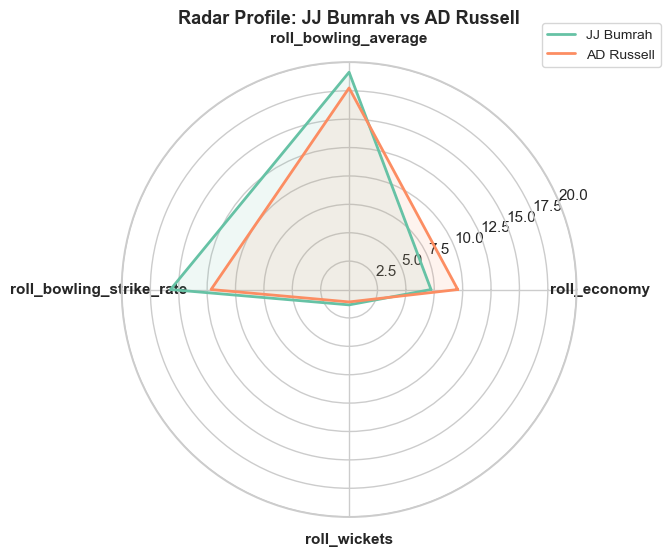

In [166]:
#Function call for bowlers with bowling metrics
plot_radar_compare(
    players=['JJ Bumrah', "AD Russell"],
    df=bowling_features,
    features=bowling_feat_cols,
    label_col='bowler' 
)

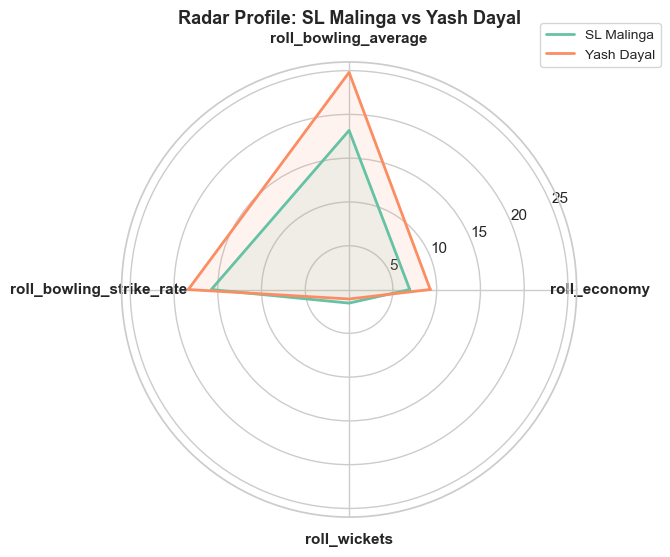

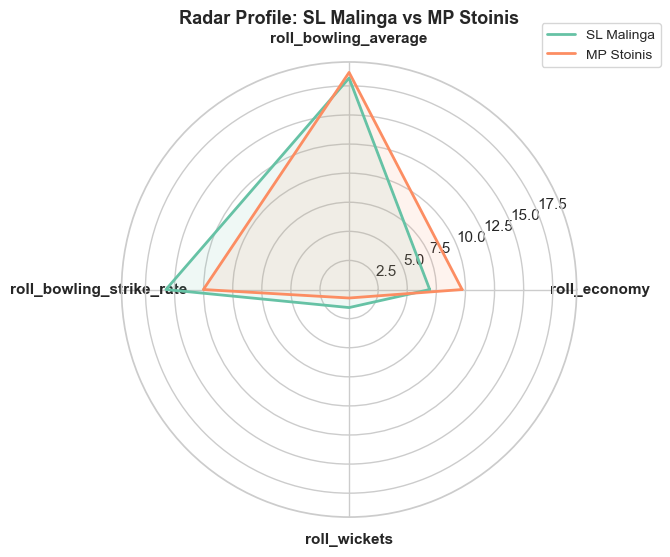

In [167]:
#Function with three players
reference_bowler = 'SL Malinga'
for p in ['Yash Dayal', 'MP Stoinis']:  # Replace with any bowler names you want
    plot_radar_compare(
        [reference_bowler, p],
        df=bowling_features,
        features=bowling_feat_cols,
        label_col='bowler'
    )


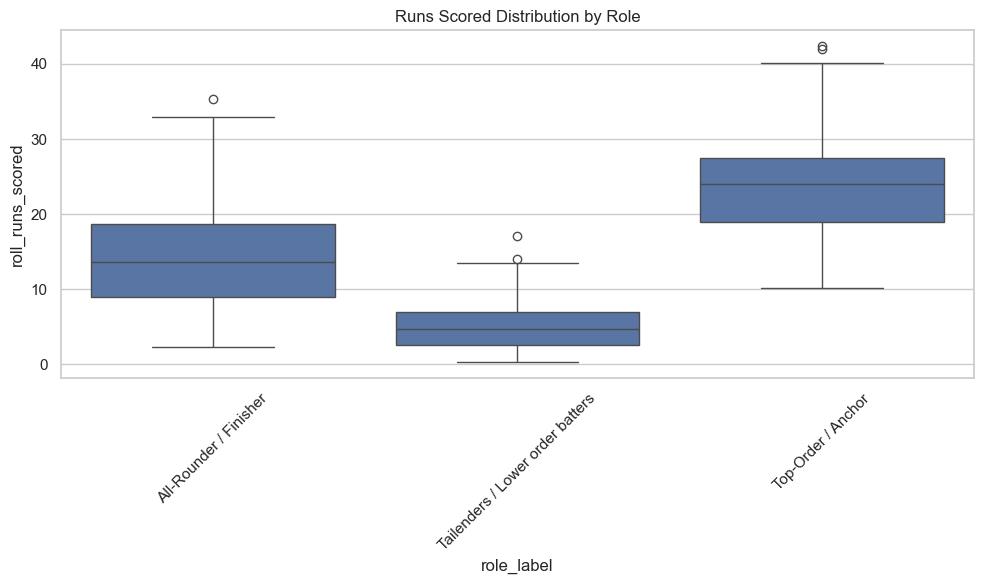

In [168]:
#Box Plots of Player Metrics to see distribution of key metric like roll_runs_scored for batters

plt.figure(figsize=(10, 6))

#Boxplot showing distribution of rolling runs scored across player roles
sns.boxplot(data=batting_features, x='role_label', y='roll_runs_scored')
plt.xticks(rotation=45)
plt.title("Runs Scored Distribution by Role")
plt.tight_layout()
plt.show()

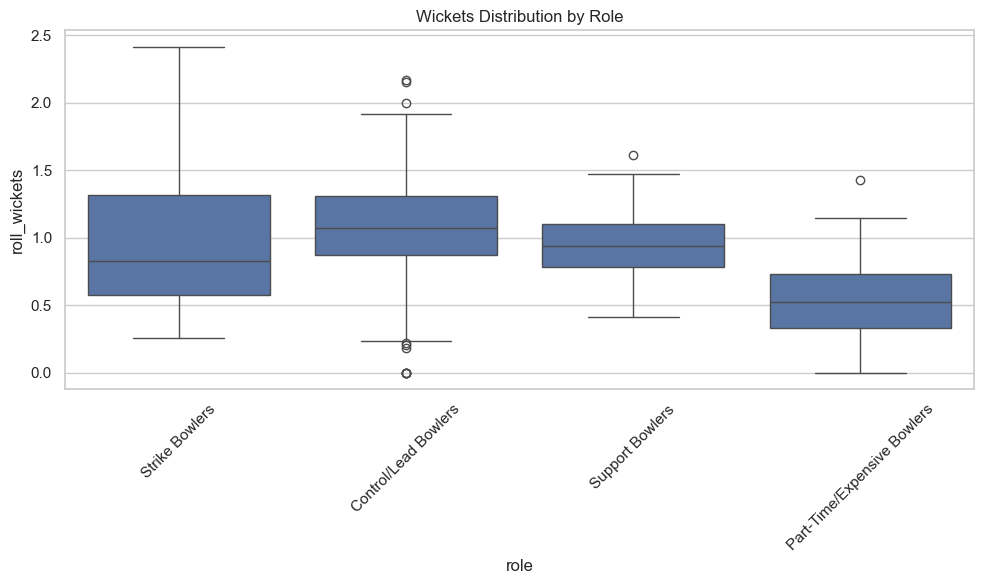

In [169]:
#Box Plots of Player Metrics to see distribution of key metric like rolling_wickets for bowlers

plt.figure(figsize=(10, 6))

#Boxplot showing distribution of rolling wickets across bowler roles
sns.boxplot(data=bowling_features, x='role', y='roll_wickets')
plt.xticks(rotation=45)
plt.title("Wickets Distribution by Role")
plt.tight_layout()
plt.show()

In [170]:
batting_per_match.groupby('batter')['season'].nunique().sort_values()


batter
Naman Dhir        1
T Shamsi          1
GR Napier         1
Gulbadin Naib     1
T Natarajan       1
                 ..
Virat Kohli      17
S Dhawan         17
MS Dhoni         17
WP Saha          17
KD Karthik       17
Name: season, Length: 672, dtype: int64

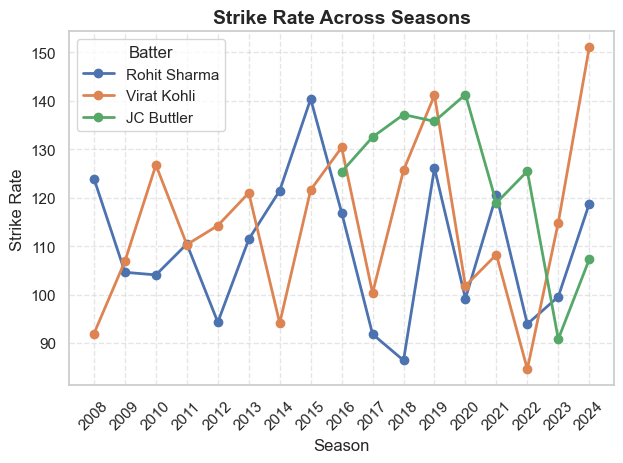

In [171]:
#Career Trajectory Plots to see how batters evolve over time in certain metrics

#Defining three players
players = ['Rohit Sharma', 'Virat Kohli', 'JC Buttler']
all_seasons = sorted(batting_per_match['season'].unique())

for player in players:
    df = (
        batting_per_match[batting_per_match['batter'] == player]
        .groupby('season')['strike_rate']
        .mean()
        .reindex(all_seasons)  # ensures all seasons are included (even if NaN)
        .reset_index()
        .rename(columns={'index': 'season'})
    )
    plt.plot(df['season'], df['strike_rate'], marker='o', linewidth=2, label=player)

plt.title("Strike Rate Across Seasons", fontsize=14, fontweight='bold')
plt.xlabel("Season", fontsize=12)
plt.ylabel("Strike Rate", fontsize=12)
plt.xticks(all_seasons, rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Batter")
plt.tight_layout()
plt.show()

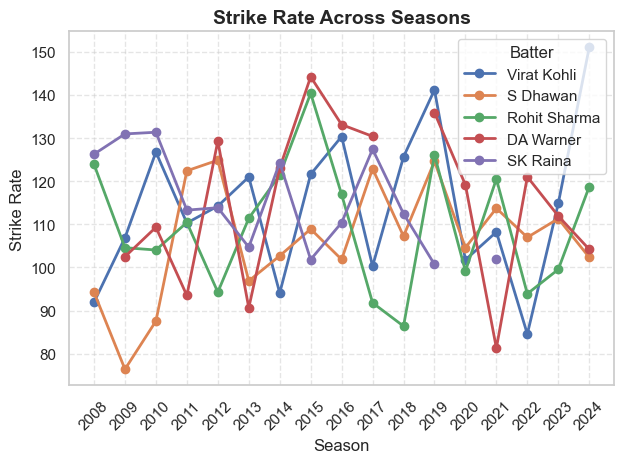

In [172]:
#Career Trajectory Plots to see how top batters evolve over time in certain metrics

#Extracting top N batters based on total runs scored
top_n = 5  # adjust as needed
top_batters = (
    batting_per_match.groupby('batter')['runs_scored']
    .sum()
    .sort_values(ascending=False)
    .head(top_n)
    .index.tolist()
)

#All seasons[2015-2024] to ensure consistent x-axis
all_seasons = sorted(batting_per_match['season'].unique())

#Plot strike rate trend for top batters
for player in top_batters:
    df = (
        batting_per_match[batting_per_match['batter'] == player]
        .groupby('season')['strike_rate']
        .mean()
        .reindex(all_seasons)  # ensures all seasons are present
        .reset_index()
        .rename(columns={'index': 'season'})
    )
    plt.plot(df['season'], df['strike_rate'], marker='o', linewidth=2, label=player)

plt.title("Strike Rate Across Seasons", fontsize=14, fontweight='bold')
plt.xlabel("Season", fontsize=12)
plt.ylabel("Strike Rate", fontsize=12)
plt.xticks(all_seasons, rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Batter")
plt.tight_layout()
plt.show()

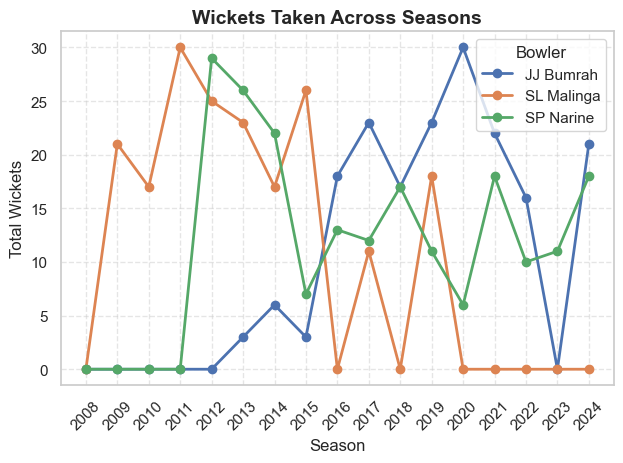

In [173]:
#Career Trajectory Plots to see how bowlers evolve over time in certain metrics

#Defining three bowlers
bowlers = ['JJ Bumrah', 'SL Malinga', 'SP Narine']
all_seasons = sorted(bowling_per_match['season'].unique())

for bowler in bowlers:
    df = (
        bowling_per_match[bowling_per_match['bowler'] == bowler]
        .groupby('season')['wickets']
        .sum()  # Total wickets per season
        .reindex(all_seasons, fill_value=0)
        .reset_index()
        .rename(columns={'index': 'season'})
    )
    plt.plot(df['season'], df['wickets'], marker='o', linewidth=2, label=bowler)

plt.title("Wickets Taken Across Seasons", fontsize=14, fontweight='bold')
plt.xlabel("Season", fontsize=12)
plt.ylabel("Total Wickets", fontsize=12)
plt.xticks(all_seasons, rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Bowler")
plt.tight_layout()
plt.show()

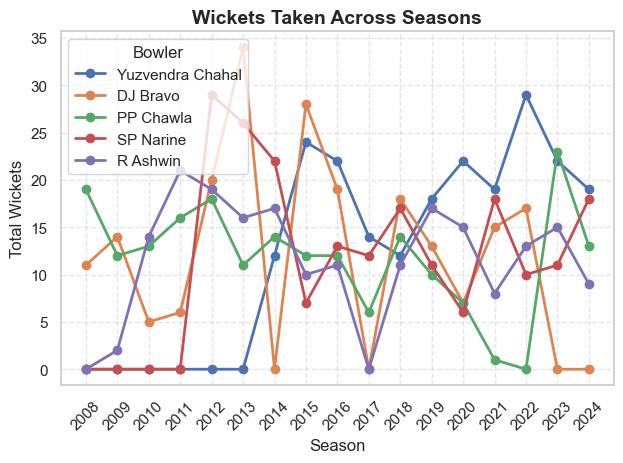

In [174]:
#To see how top bowlers evolve over time in certain metrics

#Getting top N bowlers by total wickets
top_n = 5
top_bowlers = (
    bowling_per_match.groupby('bowler')['wickets'].sum()
    .sort_values(ascending=False)
    .head(top_n)
    .index.tolist()
)

#Get all seasons sorted
all_seasons = sorted(bowling_per_match['season'].unique())

for bowler in top_bowlers:
    df = (
        bowling_per_match[bowling_per_match['bowler'] == bowler]
        .groupby('season')['wickets']
        .sum()
        .reindex(all_seasons, fill_value=0)
        .reset_index()
        .rename(columns={'index': 'season'})
    )
    plt.plot(df['season'], df['wickets'], marker='o', linewidth=2, label=bowler)

plt.title("Wickets Taken Across Seasons", fontsize=14, fontweight='bold')
plt.xlabel("Season", fontsize=12)
plt.ylabel("Total Wickets", fontsize=12)
plt.xticks(all_seasons , rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Bowler", loc='upper left')
plt.tight_layout()
plt.show()

In [175]:
cleaned_deliveries_df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder', 'is_pp', 'is_death'],
      dtype='object')

##FEATURE ENGINEERING FOR IPL MATCH OUTCOME PREDICTION

In [177]:
#Construction of match_lineups

#Extracting players from different participation roles
batting_players = cleaned_deliveries_df[['match_id', 'batting_team', 'batter']].rename(
    columns={'batting_team': 'team', 'batter': 'player'}
)

non_strikers = cleaned_deliveries_df[['match_id', 'batting_team', 'non_striker']].rename(
    columns={'batting_team': 'team', 'non_striker': 'player'}
)

bowling_players = cleaned_deliveries_df[['match_id', 'bowling_team', 'bowler']].rename(
    columns={'bowling_team': 'team', 'bowler': 'player'}
)

fielding_players = cleaned_deliveries_df[['match_id', 'bowling_team', 'fielder']].dropna().rename(
    columns={'bowling_team': 'team', 'fielder': 'player'}
)

#Append to existing lineups
lineups = pd.concat([batting_players, non_strikers, bowling_players, fielding_players], axis=0)
match_lineups = lineups.drop_duplicates().reset_index(drop=True)

In [178]:
match_lineups.head(22)

match_id                         team           player
0     335982        Kolkata Knight Riders       SC Ganguly
1     335982        Kolkata Knight Riders      BB McCullum
2     335982        Kolkata Knight Riders       RT Ponting
3     335982        Kolkata Knight Riders        DJ Hussey
4     335982        Kolkata Knight Riders  Mohammad Hafeez
5     335982  Royal Challengers Bengaluru         R Dravid
6     335982  Royal Challengers Bengaluru         W Jaffer
7     335982  Royal Challengers Bengaluru      Virat Kohli
8     335982  Royal Challengers Bengaluru        JH Kallis
9     335982  Royal Challengers Bengaluru         CL White
10    335982  Royal Challengers Bengaluru       MV Boucher
11    335982  Royal Challengers Bengaluru          B Akhil
12    335982  Royal Challengers Bengaluru        AA Noffke
13    335982  Royal Challengers Bengaluru          P Kumar
14    335982  Royal Challengers Bengaluru           Z Khan
15    335982  Royal Challengers Bengaluru         SB Joshi
16    335983          Chennai Super Kings         PA Patel
17    335983          Chennai Super Kings        ML Hayden
18    335983          Chennai Super Kings       MEK Hussey
19    335983          Chennai Super Kings         MS Dhoni
20    335983          Chennai Super Kings         SK Raina
21    335983          Chennai Super Kings         JDP Oram

In [179]:
match_lineups.query("match_id == 335982").groupby('team')['player'].nunique()

team
Kolkata Knight Riders          11
Royal Challengers Bengaluru    11
Name: player, dtype: int64

In [180]:
#Players who played in match 829705
match_lineups.query("match_id == 335982").sort_values(by=['team', 'player'])

match_id                         team           player
16844    335982        Kolkata Knight Riders       AB Agarkar
16842    335982        Kolkata Knight Riders         AB Dinda
1        335982        Kolkata Knight Riders      BB McCullum
3        335982        Kolkata Knight Riders        DJ Hussey
16843    335982        Kolkata Knight Riders         I Sharma
16845    335982        Kolkata Knight Riders        LR Shukla
23405    335982        Kolkata Knight Riders         M Kartik
4        335982        Kolkata Knight Riders  Mohammad Hafeez
2        335982        Kolkata Knight Riders       RT Ponting
0        335982        Kolkata Knight Riders       SC Ganguly
23406    335982        Kolkata Knight Riders          WP Saha
12       335982  Royal Challengers Bengaluru        AA Noffke
11       335982  Royal Challengers Bengaluru          B Akhil
9        335982  Royal Challengers Bengaluru         CL White
8        335982  Royal Challengers Bengaluru        JH Kallis
10       335982  Royal Challengers Bengaluru       MV Boucher
13       335982  Royal Challengers Bengaluru          P Kumar
5        335982  Royal Challengers Bengaluru         R Dravid
15       335982  Royal Challengers Bengaluru         SB Joshi
7        335982  Royal Challengers Bengaluru      Virat Kohli
6        335982  Royal Challengers Bengaluru         W Jaffer
14       335982  Royal Challengers Bengaluru           Z Khan

In [181]:
#Adding Player Roles to match_lineups

#Merge batting and bowling clusters/roles into match_lineups
match_lineups = match_lineups.merge(
    batting_features[['batter', 'cluster', 'role_label']]
    .rename(columns={'batter': 'player', 'cluster': 'bat_cluster', 'role_label' : 'bat_role'}),
    on='player', how='left'
).merge(
    bowling_features[['bowler', 'cluster', 'role']]
    .rename(columns={'bowler': 'player', 'cluster': 'bowl_cluster', 'role' : 'bowl_role'}),
    on='player', how='left'
)

In [182]:
match_lineups.head(10)

match_id                         team           player  bat_cluster  \
0    335982        Kolkata Knight Riders       SC Ganguly          2.0   
1    335982        Kolkata Knight Riders      BB McCullum          2.0   
2    335982        Kolkata Knight Riders       RT Ponting          0.0   
3    335982        Kolkata Knight Riders        DJ Hussey          1.0   
4    335982        Kolkata Knight Riders  Mohammad Hafeez          0.0   
5    335982  Royal Challengers Bengaluru         R Dravid          2.0   
6    335982  Royal Challengers Bengaluru         W Jaffer          2.0   
7    335982  Royal Challengers Bengaluru      Virat Kohli          2.0   
8    335982  Royal Challengers Bengaluru        JH Kallis          2.0   
9    335982  Royal Challengers Bengaluru         CL White          1.0   

                           bat_role  bowl_cluster                    bowl_role  
0                Top-Order / Anchor           2.0               Strike Bowlers  
1                Top-Order / Anchor           NaN                          NaN  
2  Tailenders / Lower order batters           NaN                          NaN  
3            All-Rounder / Finisher           2.0               Strike Bowlers  
4  Tailenders / Lower order batters           1.0         Control/Lead Bowlers  
5                Top-Order / Anchor           NaN                          NaN  
6                Top-Order / Anchor           NaN                          NaN  
7                Top-Order / Anchor           3.0  Part-Time/Expensive Bowlers  
8                Top-Order / Anchor           1.0         Control/Lead Bowlers  
9            All-Rounder / Finisher           3.0  Part-Time/Expensive Bowlers

In [183]:
#Merging rolling features for each player
match_lineups = match_lineups.merge(
    batting_features[
        ['batter', 'roll_runs_scored', 'roll_strike_rate', 'roll_batting_average',
         'roll_boundary_rate', 'roll_dot_ball_pct', 'roll_dismissals', 'roll_pp_runs', 'roll_death_runs',
         'roll_pp_strike_rate', 'roll_death_strike_rate',
         'roll_pp_boundary_rate', 'roll_death_boundary_rate']
    ].rename(columns={'batter': 'player'}),
    on='player', how='left'
).merge(
    bowling_features[
        ['bowler', 'roll_economy', 'roll_bowling_average',
         'roll_bowling_strike_rate', 'roll_wickets']
    ].rename(columns={'bowler': 'player'}),
    on='player', how='left'
)

In [184]:
print(match_lineups.head(10))

   match_id                         team           player  bat_cluster  \
0    335982        Kolkata Knight Riders       SC Ganguly          2.0   
1    335982        Kolkata Knight Riders      BB McCullum          2.0   
2    335982        Kolkata Knight Riders       RT Ponting          0.0   
3    335982        Kolkata Knight Riders        DJ Hussey          1.0   
4    335982        Kolkata Knight Riders  Mohammad Hafeez          0.0   
5    335982  Royal Challengers Bengaluru         R Dravid          2.0   
6    335982  Royal Challengers Bengaluru         W Jaffer          2.0   
7    335982  Royal Challengers Bengaluru      Virat Kohli          2.0   
8    335982  Royal Challengers Bengaluru        JH Kallis          2.0   
9    335982  Royal Challengers Bengaluru         CL White          1.0   

                           bat_role  bowl_cluster  \
0                Top-Order / Anchor           2.0   
1                Top-Order / Anchor           NaN   
2  Tailenders / Lower orde

In [185]:
#Computing Aggregate batting and bowling strength for each team in each match

#Batting strength: average of batting metrics per team per match
team_batting_strength = (
    match_lineups
    .groupby(['match_id', 'team'])[
        ['roll_runs_scored', 'roll_strike_rate', 'roll_batting_average',
         'roll_boundary_rate', 'roll_dot_ball_pct', 'roll_dismissals', 'roll_pp_runs', 'roll_death_runs',
         'roll_pp_strike_rate', 'roll_death_strike_rate',
         'roll_pp_boundary_rate', 'roll_death_boundary_rate']
    ]
    .mean()
    .reset_index()
    .rename(columns=lambda x: f"bat_{x}" if x not in ['match_id', 'team'] else x)
)

#Bowling strength: average of bowling metrics per team per match
team_bowling_strength = (
    match_lineups
    .groupby(['match_id', 'team'])[
        ['roll_economy', 'roll_bowling_average', 'roll_bowling_strike_rate', 'roll_wickets']
    ]
    .mean()
    .reset_index()
    .rename(columns=lambda x: f"bowl_{x}" if x not in ['match_id', 'team'] else x)
)

In [186]:
#Merge batting and bowling team metrics
team_strength = team_batting_strength.merge(
    team_bowling_strength, on=['match_id', 'team'], how='outer'
)

In [187]:
print(team_strength.head(6))

   match_id                         team  bat_roll_runs_scored  \
0    335982        Kolkata Knight Riders             13.612124   
1    335982  Royal Challengers Bengaluru             17.840228   
2    335983          Chennai Super Kings             19.463971   
3    335983                 Punjab Kings             14.723883   
4    335984               Delhi Capitals             18.424590   
5    335984             Rajasthan Royals             11.161056   

   bat_roll_strike_rate  bat_roll_batting_average  bat_roll_boundary_rate  \
0             93.059886                 12.574200                3.085887   
1             99.646038                 15.903952                3.604457   
2            104.917663                 15.929746                3.909215   
3             96.820927                 15.624035                3.466391   
4            110.430366                 16.395761                4.072228   
5             93.164245                  9.828297                3.105826  

In [188]:
#Pivot Team Strengths into Match-Level Format

#First, creating a key to differentiate between team1 and team2
filtered_matches_df_subset = cleaned_matches_df[['id', 'team1', 'team2', 'winner']]
filtered_matches_df_subset = filtered_matches_df_subset.rename(columns={'id': 'match_id'})

#Merging to label each team in team_strength as either team1 or team2
team_strength_labeled = team_strength.merge(
    filtered_matches_df_subset, on='match_id', how='inner'
)

#A column to indicate whether this row is team1 or team2
def get_team_label(row):
    if row['team'] == row['team1']:
        return 'team1'
    elif row['team'] == row['team2']:
        return 'team2'
    else:
        return 'unknown'

team_strength_labeled['team_side'] = team_strength_labeled.apply(get_team_label, axis=1)

#Pivot the features so each match has one row with both team1 and team2 metrics
team1_data = team_strength_labeled[team_strength_labeled['team_side'] == 'team1'].drop(
    columns=['team2', 'winner', 'team_side']
).add_prefix('team1_')

team2_data = team_strength_labeled[team_strength_labeled['team_side'] == 'team2'].drop(
    columns=['team1', 'winner', 'team_side']
).add_prefix('team2_')

#Renaming 'match_id' back for merging
team1_data = team1_data.rename(columns={'team1_match_id': 'match_id'})
team2_data = team2_data.rename(columns={'team2_match_id': 'match_id'})

#Merge team1 and team2 side-by-side
match_features = pd.merge(team1_data, team2_data, on='match_id', suffixes=('', ''))

#Adding target variable
match_features = match_features.merge(
    filtered_matches_df_subset[['match_id', 'winner']], on='match_id', how='left'
)

#Encode target: 1 if team1 won, 0 if team2 won
match_features['team1_win'] = (match_features['team1_team'] == match_features['winner']).astype(int)

In [189]:
print(match_features.head(10))

   match_id                   team1_team  team1_bat_roll_runs_scored  \
0    335982  Royal Challengers Bengaluru                   17.840228   
1    335983                 Punjab Kings                   14.723883   
2    335984               Delhi Capitals                   18.424590   
3    335985               Mumbai Indians                   13.272201   
4    335986        Kolkata Knight Riders                   13.612124   
5    335987             Rajasthan Royals                   12.694945   
6    335988              Deccan Chargers                   14.037058   
7    335989          Chennai Super Kings                   19.463971   
8    335990              Deccan Chargers                   13.536730   
9    335991                 Punjab Kings                   15.154503   

   team1_bat_roll_strike_rate  team1_bat_roll_batting_average  \
0                   99.646038                       15.903952   
1                   96.820927                       15.624035   
2           

In [190]:
match_features.columns

Index(['match_id', 'team1_team', 'team1_bat_roll_runs_scored',
       'team1_bat_roll_strike_rate', 'team1_bat_roll_batting_average',
       'team1_bat_roll_boundary_rate', 'team1_bat_roll_dot_ball_pct',
       'team1_bat_roll_dismissals', 'team1_bat_roll_pp_runs',
       'team1_bat_roll_death_runs', 'team1_bat_roll_pp_strike_rate',
       'team1_bat_roll_death_strike_rate', 'team1_bat_roll_pp_boundary_rate',
       'team1_bat_roll_death_boundary_rate', 'team1_bowl_roll_economy',
       'team1_bowl_roll_bowling_average',
       'team1_bowl_roll_bowling_strike_rate', 'team1_bowl_roll_wickets',
       'team1_team1', 'team2_team', 'team2_bat_roll_runs_scored',
       'team2_bat_roll_strike_rate', 'team2_bat_roll_batting_average',
       'team2_bat_roll_boundary_rate', 'team2_bat_roll_dot_ball_pct',
       'team2_bat_roll_dismissals', 'team2_bat_roll_pp_runs',
       'team2_bat_roll_death_runs', 'team2_bat_roll_pp_strike_rate',
       'team2_bat_roll_death_strike_rate', 'team2_bat_roll_pp_

In [191]:
#Feature Engineering Tasks

#Venue Win Rates (per team)
#Copying only past matches (to compute pre-match stats)
match_history = cleaned_matches_df.copy()
match_history = match_history.rename(columns={'id': 'match_id'})

#Melt the data so each row has (team, venue, winner variables)
venue_records = pd.concat([
    match_history[['match_id', 'venue', 'team1', 'winner']].rename(columns={'team1': 'team'}),
    match_history[['match_id', 'venue', 'team2', 'winner']].rename(columns={'team2': 'team'})
], ignore_index=True)

venue_records['team_win'] = (venue_records['team'] == venue_records['winner']).astype(int)

#Sorting by match_id to ensure cumulative stats
venue_records = venue_records.sort_values(by='match_id')

#Cumulative win rate of team at venue (excluding current match)
venue_records['venue_team_winrate'] = (
    venue_records
    .groupby(['team', 'venue'])['team_win']
    .transform(lambda x: x.shift().expanding().mean())
)

#Drop nulls that arise for first occurrences
venue_records = venue_records.dropna(subset=['venue_team_winrate'])

#Merge for team1
match_features = match_features.merge(
    venue_records[['match_id', 'team', 'venue_team_winrate']],
    left_on=['match_id', 'team1_team'], right_on=['match_id', 'team'],
    how='left'
).rename(columns={'venue_team_winrate': 'venue_team1_winrate'}).drop(columns='team')

#Merge for team2
match_features = match_features.merge(
    venue_records[['match_id', 'team', 'venue_team_winrate']],
    left_on=['match_id', 'team2_team'], right_on=['match_id', 'team'],
    how='left'
).rename(columns={'venue_team_winrate': 'venue_team2_winrate'}).drop(columns='team')

In [192]:
print(match_features.head(5))

   match_id                   team1_team  team1_bat_roll_runs_scored  \
0    335982  Royal Challengers Bengaluru                   17.840228   
1    335983                 Punjab Kings                   14.723883   
2    335984               Delhi Capitals                   18.424590   
3    335985               Mumbai Indians                   13.272201   
4    335986        Kolkata Knight Riders                   13.612124   

   team1_bat_roll_strike_rate  team1_bat_roll_batting_average  \
0                   99.646038                       15.903952   
1                   96.820927                       15.624035   
2                  110.430366                       16.395761   
3                   91.335148                       12.821592   
4                   93.059886                       12.574200   

   team1_bat_roll_boundary_rate  team1_bat_roll_dot_ball_pct  \
0                      3.604457                    48.708268   
1                      3.466391                 

In [193]:
print(match_features.tail(5))

      match_id                   team1_team  team1_bat_roll_runs_scored  \
1090   1426307                 Punjab Kings                   15.536671   
1091   1426309          Sunrisers Hyderabad                   19.528613   
1092   1426310  Royal Challengers Bengaluru                   19.438443   
1093   1426311          Sunrisers Hyderabad                   20.113903   
1094   1426312          Sunrisers Hyderabad                   20.113903   

      team1_bat_roll_strike_rate  team1_bat_roll_batting_average  \
1090                  114.538715                       12.592759   
1091                  122.362495                       18.334843   
1092                  113.249967                       17.839302   
1093                  121.787053                       18.233609   
1094                  121.787053                       18.233609   

      team1_bat_roll_boundary_rate  team1_bat_roll_dot_ball_pct  \
1090                      4.501705                    48.300133   
1091  

In [194]:
#Creating the match history subset
h2h = match_history[['match_id', 'team1', 'team2', 'winner']].copy()

#head-to-head win rate function
def head_to_head_wins(df):
    df = df.sort_values('match_id')
    
    #1 if team1 wins the match
    df['team1_win'] = (df['winner'] == df['team1']).astype(int)
    
    #Create symmetric pair (order-independent)
    df['pair'] = df.apply(lambda row: tuple(sorted([row['team1'], row['team2']])), axis=1)

    #Cumulative win rate for team1 against team2
    df['team1_vs_team2_winrate'] = (
        df.groupby('pair')['team1_win']
          .transform(lambda x: x.shift().expanding().mean())  # shift to exclude current match
    )
    
    return df[['match_id', 'team1', 'team2', 'team1_vs_team2_winrate']]

#Applying the function and drop nulls from first occurrences
h2h_stats = head_to_head_wins(h2h).dropna()

#Merging the head-to-head winrate into match_features
match_features = match_features.merge(
    h2h_stats[['match_id', 'team1', 'team2', 'team1_vs_team2_winrate']],
    left_on=['match_id', 'team1_team', 'team2_team'],
    right_on=['match_id', 'team1', 'team2'],
    how='left'
).drop(columns=['team1', 'team2'])


In [195]:
print(match_features.tail(5))

      match_id                   team1_team  team1_bat_roll_runs_scored  \
1090   1426307                 Punjab Kings                   15.536671   
1091   1426309          Sunrisers Hyderabad                   19.528613   
1092   1426310  Royal Challengers Bengaluru                   19.438443   
1093   1426311          Sunrisers Hyderabad                   20.113903   
1094   1426312          Sunrisers Hyderabad                   20.113903   

      team1_bat_roll_strike_rate  team1_bat_roll_batting_average  \
1090                  114.538715                       12.592759   
1091                  122.362495                       18.334843   
1092                  113.249967                       17.839302   
1093                  121.787053                       18.233609   
1094                  121.787053                       18.233609   

      team1_bat_roll_boundary_rate  team1_bat_roll_dot_ball_pct  \
1090                      4.501705                    48.300133   
1091  

In [196]:
match_features.columns.to_list()

['match_id',
 'team1_team',
 'team1_bat_roll_runs_scored',
 'team1_bat_roll_strike_rate',
 'team1_bat_roll_batting_average',
 'team1_bat_roll_boundary_rate',
 'team1_bat_roll_dot_ball_pct',
 'team1_bat_roll_dismissals',
 'team1_bat_roll_pp_runs',
 'team1_bat_roll_death_runs',
 'team1_bat_roll_pp_strike_rate',
 'team1_bat_roll_death_strike_rate',
 'team1_bat_roll_pp_boundary_rate',
 'team1_bat_roll_death_boundary_rate',
 'team1_bowl_roll_economy',
 'team1_bowl_roll_bowling_average',
 'team1_bowl_roll_bowling_strike_rate',
 'team1_bowl_roll_wickets',
 'team1_team1',
 'team2_team',
 'team2_bat_roll_runs_scored',
 'team2_bat_roll_strike_rate',
 'team2_bat_roll_batting_average',
 'team2_bat_roll_boundary_rate',
 'team2_bat_roll_dot_ball_pct',
 'team2_bat_roll_dismissals',
 'team2_bat_roll_pp_runs',
 'team2_bat_roll_death_runs',
 'team2_bat_roll_pp_strike_rate',
 'team2_bat_roll_death_strike_rate',
 'team2_bat_roll_pp_boundary_rate',
 'team2_bat_roll_death_boundary_rate',
 'team2_bowl_roll_e

In [197]:
# --- 1. Prepare team-vs-team venue history ---
venue_h2h_df = cleaned_matches_df[['id', 'team1', 'team2', 'venue', 'winner']].copy()
venue_h2h_df = venue_h2h_df.rename(columns={'id': 'match_id'})
venue_h2h_df = venue_h2h_df.sort_values('match_id')

# --- 2. Create symmetric team pairs ---
venue_h2h_df['pair'] = venue_h2h_df.apply(lambda x: tuple(sorted([x['team1'], x['team2']])), axis=1)

# --- 3. Mark wins ---
venue_h2h_df['team1_win'] = (venue_h2h_df['winner'] == venue_h2h_df['team1']).astype(int)
venue_h2h_df['team2_win'] = (venue_h2h_df['winner'] == venue_h2h_df['team2']).astype(int)

# --- 4. Compute rolling win rates at venue ---
venue_h2h_df['team1_vs_team2_venue_winrate'] = (
    venue_h2h_df
    .groupby(['pair', 'venue'])['team1_win']
    .transform(lambda x: x.shift().expanding().mean())
)
venue_h2h_df['team2_vs_team1_venue_winrate'] = (
    venue_h2h_df
    .groupby(['pair', 'venue'])['team2_win']
    .transform(lambda x: x.shift().expanding().mean())
)

# --- 5. Drop first-time entries with no historical data ---
venue_h2h_df = venue_h2h_df.dropna(subset=['team1_vs_team2_venue_winrate', 'team2_vs_team1_venue_winrate'])

# --- Ensure 'venue' exists in match_features ---
if 'venue' not in match_features.columns:
    match_features = match_features.merge(
        cleaned_matches_df[['id', 'venue']].rename(columns={'id': 'match_id'}),
        on='match_id',
        how='left'
    )

# --- 6. Merge team1 venue winrate ---
match_features = match_features.merge(
    venue_h2h_df[['match_id', 'team1', 'team2', 'venue', 'team1_vs_team2_venue_winrate']],
    left_on=['match_id', 'team1_team', 'team2_team', 'venue'],
    right_on=['match_id', 'team1', 'team2', 'venue'],
    how='left'
).drop(columns=['team1', 'team2'])

# --- 7. Merge team2 venue winrate ---
match_features = match_features.merge(
    venue_h2h_df[['match_id', 'team1', 'team2', 'venue', 'team2_vs_team1_venue_winrate']],
    left_on=['match_id', 'team1_team', 'team2_team', 'venue'],
    right_on=['match_id', 'team1', 'team2', 'venue'],
    how='left'
).drop(columns=['team1', 'team2'])


In [198]:
print(match_features.tail(6))

      match_id                   team1_team  team1_bat_roll_runs_scored  \
1089   1426306  Royal Challengers Bengaluru                   19.438443   
1090   1426307                 Punjab Kings                   15.536671   
1091   1426309          Sunrisers Hyderabad                   19.528613   
1092   1426310  Royal Challengers Bengaluru                   19.438443   
1093   1426311          Sunrisers Hyderabad                   20.113903   
1094   1426312          Sunrisers Hyderabad                   20.113903   

      team1_bat_roll_strike_rate  team1_bat_roll_batting_average  \
1089                  113.249967                       17.839302   
1090                  114.538715                       12.592759   
1091                  122.362495                       18.334843   
1092                  113.249967                       17.839302   
1093                  121.787053                       18.233609   
1094                  121.787053                       18.233609  

In [199]:
#Each team’s win rate over the last 4 matches
#Copy filtered_matches_df and rename for clarity
team_form_df = cleaned_matches_df[['id', 'season', 'team1', 'team2', 'winner']].copy()
team_form_df = team_form_df.rename(columns={'id': 'match_id'})

#Melt into long format so each row is (team, match_id, season, won or not)
team_records = pd.concat([
    team_form_df[['match_id', 'season', 'team1', 'winner']].rename(columns={'team1': 'team'}),
    team_form_df[['match_id', 'season', 'team2', 'winner']].rename(columns={'team2': 'team'})
], ignore_index=True)

#Was this team the winner in that match?
team_records['team_win'] = (team_records['team'] == team_records['winner']).astype(int)

#Sort by season and match_id
team_records = team_records.sort_values(by=['team', 'season', 'match_id'])

#Rolling win rate in last 3 matches within the same season
team_records['team_recent_winrate'] = (
    team_records
    .groupby(['team', 'season'])['team_win']
    .transform(lambda x: x.shift().rolling(window=4, min_periods=1).mean())
)

#Drop first appearance rows where rolling can't be computed
team_records = team_records.dropna(subset=['team_recent_winrate'])

#Merge for team1
match_features = match_features.merge(
    team_records[['match_id', 'team', 'team_recent_winrate']],
    left_on=['match_id', 'team1_team'],
    right_on=['match_id', 'team'],
    how='left'
).rename(columns={'team_recent_winrate': 'team1_recent_winrate'}).drop(columns='team')

#Merge for team2
match_features = match_features.merge(
    team_records[['match_id', 'team', 'team_recent_winrate']],
    left_on=['match_id', 'team2_team'],
    right_on=['match_id', 'team'],
    how='left'
).rename(columns={'team_recent_winrate': 'team2_recent_winrate'}).drop(columns='team')


In [200]:
print(match_features.tail(6))

      match_id                   team1_team  team1_bat_roll_runs_scored  \
1089   1426306  Royal Challengers Bengaluru                   19.438443   
1090   1426307                 Punjab Kings                   15.536671   
1091   1426309          Sunrisers Hyderabad                   19.528613   
1092   1426310  Royal Challengers Bengaluru                   19.438443   
1093   1426311          Sunrisers Hyderabad                   20.113903   
1094   1426312          Sunrisers Hyderabad                   20.113903   

      team1_bat_roll_strike_rate  team1_bat_roll_batting_average  \
1089                  113.249967                       17.839302   
1090                  114.538715                       12.592759   
1091                  122.362495                       18.334843   
1092                  113.249967                       17.839302   
1093                  121.787053                       18.233609   
1094                  121.787053                       18.233609  

In [201]:
match_features.columns

Index(['match_id', 'team1_team', 'team1_bat_roll_runs_scored',
       'team1_bat_roll_strike_rate', 'team1_bat_roll_batting_average',
       'team1_bat_roll_boundary_rate', 'team1_bat_roll_dot_ball_pct',
       'team1_bat_roll_dismissals', 'team1_bat_roll_pp_runs',
       'team1_bat_roll_death_runs', 'team1_bat_roll_pp_strike_rate',
       'team1_bat_roll_death_strike_rate', 'team1_bat_roll_pp_boundary_rate',
       'team1_bat_roll_death_boundary_rate', 'team1_bowl_roll_economy',
       'team1_bowl_roll_bowling_average',
       'team1_bowl_roll_bowling_strike_rate', 'team1_bowl_roll_wickets',
       'team1_team1', 'team2_team', 'team2_bat_roll_runs_scored',
       'team2_bat_roll_strike_rate', 'team2_bat_roll_batting_average',
       'team2_bat_roll_boundary_rate', 'team2_bat_roll_dot_ball_pct',
       'team2_bat_roll_dismissals', 'team2_bat_roll_pp_runs',
       'team2_bat_roll_death_runs', 'team2_bat_roll_pp_strike_rate',
       'team2_bat_roll_death_strike_rate', 'team2_bat_roll_pp_

In [202]:
#Selected performance features to compute difference
selected_features = [
    'bat_roll_runs_scored','bat_roll_strike_rate', 'bat_roll_batting_average',
    'bat_roll_boundary_rate', 'bat_roll_dot_ball_pct',
    'bat_roll_dismissals', 'bat_roll_pp_runs', 'bat_roll_death_runs', 'bat_roll_pp_strike_rate',
    'bat_roll_death_strike_rate', 'bat_roll_pp_boundary_rate',
    'bat_roll_death_boundary_rate', 'bowl_roll_economy',
    'bowl_roll_bowling_average', 'bowl_roll_bowling_strike_rate',
    'bowl_roll_wickets'
]

#Generate diff columns between team1_ and team2_
for base_col in selected_features:
    team1_col = f'team1_{base_col}'
    team2_col = f'team2_{base_col}'
    diff_col = f'diff_{base_col}'
    
    if team1_col in match_features.columns and team2_col in match_features.columns:
        match_features[diff_col] = match_features[team1_col] - match_features[team2_col]


In [203]:
print(match_features.tail(6))

      match_id                   team1_team  team1_bat_roll_runs_scored  \
1089   1426306  Royal Challengers Bengaluru                   19.438443   
1090   1426307                 Punjab Kings                   15.536671   
1091   1426309          Sunrisers Hyderabad                   19.528613   
1092   1426310  Royal Challengers Bengaluru                   19.438443   
1093   1426311          Sunrisers Hyderabad                   20.113903   
1094   1426312          Sunrisers Hyderabad                   20.113903   

      team1_bat_roll_strike_rate  team1_bat_roll_batting_average  \
1089                  113.249967                       17.839302   
1090                  114.538715                       12.592759   
1091                  122.362495                       18.334843   
1092                  113.249967                       17.839302   
1093                  121.787053                       18.233609   
1094                  121.787053                       18.233609  

In [204]:
#Drop only the selected team1_ and team2_ performance columns
cols_to_drop = [f'team1_{col}' for col in selected_features] + [f'team2_{col}' for col in selected_features]
match_features = match_features.drop(columns=cols_to_drop, errors='ignore')


In [205]:
match_features.columns

Index(['match_id', 'team1_team', 'team1_team1', 'team2_team', 'team2_team2',
       'winner', 'team1_win', 'venue_team1_winrate', 'venue_team2_winrate',
       'team1_vs_team2_winrate', 'venue', 'team1_vs_team2_venue_winrate',
       'team2_vs_team1_venue_winrate', 'team1_recent_winrate',
       'team2_recent_winrate', 'diff_bat_roll_runs_scored',
       'diff_bat_roll_strike_rate', 'diff_bat_roll_batting_average',
       'diff_bat_roll_boundary_rate', 'diff_bat_roll_dot_ball_pct',
       'diff_bat_roll_dismissals', 'diff_bat_roll_pp_runs',
       'diff_bat_roll_death_runs', 'diff_bat_roll_pp_strike_rate',
       'diff_bat_roll_death_strike_rate', 'diff_bat_roll_pp_boundary_rate',
       'diff_bat_roll_death_boundary_rate', 'diff_bowl_roll_economy',
       'diff_bowl_roll_bowling_average', 'diff_bowl_roll_bowling_strike_rate',
       'diff_bowl_roll_wickets'],
      dtype='object')

In [206]:
match_features['diff_venue_winrate'] = (
    match_features['venue_team1_winrate'] - match_features['venue_team2_winrate']
)

match_features['diff_recent_winrate'] = (
    match_features['team1_recent_winrate'] - match_features['team2_recent_winrate']
)

match_features['diff_venue_h2h_winrate'] = (
    match_features['team1_vs_team2_venue_winrate'] - match_features['team2_vs_team1_venue_winrate']
)


In [207]:
print(match_features.tail(6))

      match_id                   team1_team                  team1_team1  \
1089   1426306  Royal Challengers Bengaluru  Royal Challengers Bengaluru   
1090   1426307                 Punjab Kings                 Punjab Kings   
1091   1426309          Sunrisers Hyderabad          Sunrisers Hyderabad   
1092   1426310  Royal Challengers Bengaluru  Royal Challengers Bengaluru   
1093   1426311          Sunrisers Hyderabad          Sunrisers Hyderabad   
1094   1426312          Sunrisers Hyderabad          Sunrisers Hyderabad   

                 team2_team            team2_team2  \
1089    Chennai Super Kings    Chennai Super Kings   
1090    Sunrisers Hyderabad    Sunrisers Hyderabad   
1091  Kolkata Knight Riders  Kolkata Knight Riders   
1092       Rajasthan Royals       Rajasthan Royals   
1093       Rajasthan Royals       Rajasthan Royals   
1094  Kolkata Knight Riders  Kolkata Knight Riders   

                           winner  team1_win  venue_team1_winrate  \
1089  Royal Challen

In [208]:
match_features = match_features.drop(columns=[
    'venue_team1_winrate', 'venue_team2_winrate',
    'team1_vs_team2_venue_winrate', 'team2_vs_team1_venue_winrate',
    'team1_recent_winrate', 'team2_recent_winrate',
    'team1_team1', 'team2_team2'
])


In [209]:
match_features.columns

Index(['match_id', 'team1_team', 'team2_team', 'winner', 'team1_win',
       'team1_vs_team2_winrate', 'venue', 'diff_bat_roll_runs_scored',
       'diff_bat_roll_strike_rate', 'diff_bat_roll_batting_average',
       'diff_bat_roll_boundary_rate', 'diff_bat_roll_dot_ball_pct',
       'diff_bat_roll_dismissals', 'diff_bat_roll_pp_runs',
       'diff_bat_roll_death_runs', 'diff_bat_roll_pp_strike_rate',
       'diff_bat_roll_death_strike_rate', 'diff_bat_roll_pp_boundary_rate',
       'diff_bat_roll_death_boundary_rate', 'diff_bowl_roll_economy',
       'diff_bowl_roll_bowling_average', 'diff_bowl_roll_bowling_strike_rate',
       'diff_bowl_roll_wickets', 'diff_venue_winrate', 'diff_recent_winrate',
       'diff_venue_h2h_winrate'],
      dtype='object')

In [210]:
match_features.head(7)

match_id                   team1_team                   team2_team  \
0    335982  Royal Challengers Bengaluru        Kolkata Knight Riders   
1    335983                 Punjab Kings          Chennai Super Kings   
2    335984               Delhi Capitals             Rajasthan Royals   
3    335985               Mumbai Indians  Royal Challengers Bengaluru   
4    335986        Kolkata Knight Riders              Deccan Chargers   
5    335987             Rajasthan Royals                 Punjab Kings   
6    335988              Deccan Chargers               Delhi Capitals   

                        winner  team1_win  team1_vs_team2_winrate  \
0        Kolkata Knight Riders          0                     NaN   
1          Chennai Super Kings          0                     NaN   
2               Delhi Capitals          1                     NaN   
3  Royal Challengers Bengaluru          0                     NaN   
4        Kolkata Knight Riders          1                     NaN   
5             Rajasthan Royals          1                     NaN   
6               Delhi Capitals          0                     NaN   

                                          venue  diff_bat_roll_runs_scored  \
0                         M Chinnaswamy Stadium                   4.228104   
1  Punjab Cricket Association IS Bindra Stadium                  -4.740089   
2                          Arun Jaitley Stadium                   7.263534   
3                              Wankhede Stadium                  -2.397934   
4                                  Eden Gardens                  -0.760973   
5                        Sawai Mansingh Stadium                  -2.107916   
6            Rajiv Gandhi International Stadium                  -4.857889   

   diff_bat_roll_strike_rate  diff_bat_roll_batting_average  ...  \
0                   6.586152                       3.329753  ...   
1                  -8.096736                      -0.305711  ...   
2                  17.266121                       6.567464  ...   
3                  -9.106022                      -0.873858  ...   
4                   0.097489                      -0.546904  ...   
5                   7.862743                      -2.374189  ...   
6                  -9.544166                      -5.809898  ...   

   diff_bat_roll_death_strike_rate  diff_bat_roll_pp_boundary_rate  \
0                         8.489706                        0.258240   
1                       -14.540321                       -0.358732   
2                        -6.870374                        1.664769   
3                       -17.327965                        0.190008   
4                        -5.643472                       -0.007879   
5                        17.186913                       -0.553593   
6                        -5.041199                       -0.569922   

   diff_bat_roll_death_boundary_rate  diff_bowl_roll_economy  \
0                           0.674070                0.266315   
1                          -0.575459               -0.504960   
2                          -0.179398               -0.190603   
3                          -0.651983               -0.240417   
4                          -0.278586                0.087277   
5                           0.321355               -0.133798   
6                          -0.322464               -0.255517   

   diff_bowl_roll_bowling_average  diff_bowl_roll_bowling_strike_rate  \
0                        1.999327                            1.516848   
1                       -1.409171                            0.401925   
2                       -1.117545                           -1.423975   
3                       -1.776340                           -0.459646   
4                       -0.295873                           -0.257732   
5                       -2.669393                           -1.442002   
6                       -0.253266                            0.399857   

   diff_bowl_roll_wickets  diff_venu

In [211]:
match_features.shape

(1095, 26)

In [212]:
match_features.isna().sum()

match_id                                0
team1_team                              0
team2_team                              0
winner                                  5
team1_win                               0
team1_vs_team2_winrate                 83
venue                                   0
diff_bat_roll_runs_scored               0
diff_bat_roll_strike_rate               0
diff_bat_roll_batting_average           0
diff_bat_roll_boundary_rate             0
diff_bat_roll_dot_ball_pct              0
diff_bat_roll_dismissals                0
diff_bat_roll_pp_runs                   0
diff_bat_roll_death_runs                0
diff_bat_roll_pp_strike_rate            0
diff_bat_roll_death_strike_rate         0
diff_bat_roll_pp_boundary_rate          0
diff_bat_roll_death_boundary_rate       0
diff_bowl_roll_economy                  0
diff_bowl_roll_bowling_average          0
diff_bowl_roll_bowling_strike_rate      0
diff_bowl_roll_wickets                  0
diff_venue_winrate                

In [213]:
# List of columns in current match_features that could have missing values
columns_to_check = [
    'team1_vs_team2_winrate',
    'diff_venue_winrate',
    'diff_recent_winrate',
    'diff_venue_h2h_winrate'
]

# Check missing counts per column
missing_before_handling = match_features[columns_to_check].isna().sum()

# Count of rows with any missing values across the selected columns
rows_with_any_missing = match_features[columns_to_check].isna().any(axis=1).sum()

# Display
print("Missing values per feature (before imputation or indicators):\n")
print(missing_before_handling)
print(f"\nTotal rows with at least one missing value: {rows_with_any_missing}")


Missing values per feature (before imputation or indicators):

team1_vs_team2_winrate     83
diff_venue_winrate        271
diff_recent_winrate        81
diff_venue_h2h_winrate    479
dtype: int64

Total rows with at least one missing value: 522


In [214]:
match_features.columns

Index(['match_id', 'team1_team', 'team2_team', 'winner', 'team1_win',
       'team1_vs_team2_winrate', 'venue', 'diff_bat_roll_runs_scored',
       'diff_bat_roll_strike_rate', 'diff_bat_roll_batting_average',
       'diff_bat_roll_boundary_rate', 'diff_bat_roll_dot_ball_pct',
       'diff_bat_roll_dismissals', 'diff_bat_roll_pp_runs',
       'diff_bat_roll_death_runs', 'diff_bat_roll_pp_strike_rate',
       'diff_bat_roll_death_strike_rate', 'diff_bat_roll_pp_boundary_rate',
       'diff_bat_roll_death_boundary_rate', 'diff_bowl_roll_economy',
       'diff_bowl_roll_bowling_average', 'diff_bowl_roll_bowling_strike_rate',
       'diff_bowl_roll_wickets', 'diff_venue_winrate', 'diff_recent_winrate',
       'diff_venue_h2h_winrate'],
      dtype='object')

In [215]:
#List of features with missing values
missing_value_columns = [
    'team1_vs_team2_winrate',
    'diff_venue_winrate',
    'diff_recent_winrate',
    'diff_venue_h2h_winrate'
]

#Add missing indicators
for col in missing_value_columns:
    match_features[f'{col}_missing'] = match_features[col].isna().astype(int)

#Impute missing values with neutral defaults
match_features[missing_value_columns] = match_features[missing_value_columns].fillna(0)


In [216]:
print(match_features.head(6))

   match_id                   team1_team                   team2_team  \
0    335982  Royal Challengers Bengaluru        Kolkata Knight Riders   
1    335983                 Punjab Kings          Chennai Super Kings   
2    335984               Delhi Capitals             Rajasthan Royals   
3    335985               Mumbai Indians  Royal Challengers Bengaluru   
4    335986        Kolkata Knight Riders              Deccan Chargers   
5    335987             Rajasthan Royals                 Punjab Kings   

                        winner  team1_win  team1_vs_team2_winrate  \
0        Kolkata Knight Riders          0                     0.0   
1          Chennai Super Kings          0                     0.0   
2               Delhi Capitals          1                     0.0   
3  Royal Challengers Bengaluru          0                     0.0   
4        Kolkata Knight Riders          1                     0.0   
5             Rajasthan Royals          1                     0.0   

    

In [217]:
match_features.columns

Index(['match_id', 'team1_team', 'team2_team', 'winner', 'team1_win',
       'team1_vs_team2_winrate', 'venue', 'diff_bat_roll_runs_scored',
       'diff_bat_roll_strike_rate', 'diff_bat_roll_batting_average',
       'diff_bat_roll_boundary_rate', 'diff_bat_roll_dot_ball_pct',
       'diff_bat_roll_dismissals', 'diff_bat_roll_pp_runs',
       'diff_bat_roll_death_runs', 'diff_bat_roll_pp_strike_rate',
       'diff_bat_roll_death_strike_rate', 'diff_bat_roll_pp_boundary_rate',
       'diff_bat_roll_death_boundary_rate', 'diff_bowl_roll_economy',
       'diff_bowl_roll_bowling_average', 'diff_bowl_roll_bowling_strike_rate',
       'diff_bowl_roll_wickets', 'diff_venue_winrate', 'diff_recent_winrate',
       'diff_venue_h2h_winrate', 'team1_vs_team2_winrate_missing',
       'diff_venue_winrate_missing', 'diff_recent_winrate_missing',
       'diff_venue_h2h_winrate_missing'],
      dtype='object')

In [218]:
match_features.shape

(1095, 30)

In [219]:
match_features.isna().sum()

match_id                              0
team1_team                            0
team2_team                            0
winner                                5
team1_win                             0
team1_vs_team2_winrate                0
venue                                 0
diff_bat_roll_runs_scored             0
diff_bat_roll_strike_rate             0
diff_bat_roll_batting_average         0
diff_bat_roll_boundary_rate           0
diff_bat_roll_dot_ball_pct            0
diff_bat_roll_dismissals              0
diff_bat_roll_pp_runs                 0
diff_bat_roll_death_runs              0
diff_bat_roll_pp_strike_rate          0
diff_bat_roll_death_strike_rate       0
diff_bat_roll_pp_boundary_rate        0
diff_bat_roll_death_boundary_rate     0
diff_bowl_roll_economy                0
diff_bowl_roll_bowling_average        0
diff_bowl_roll_bowling_strike_rate    0
diff_bowl_roll_wickets                0
diff_venue_winrate                    0
diff_recent_winrate                   0


In [220]:
#Encoding categorical venue variables:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
match_features['venue'] = le.fit_transform(match_features['venue'])

In [221]:
match_features[['team1_team','team2_team','winner','venue']]

team1_team                   team2_team  \
0     Royal Challengers Bengaluru        Kolkata Knight Riders   
1                    Punjab Kings          Chennai Super Kings   
2                  Delhi Capitals             Rajasthan Royals   
3                  Mumbai Indians  Royal Challengers Bengaluru   
4           Kolkata Knight Riders              Deccan Chargers   
...                           ...                          ...   
1090                 Punjab Kings          Sunrisers Hyderabad   
1091          Sunrisers Hyderabad        Kolkata Knight Riders   
1092  Royal Challengers Bengaluru             Rajasthan Royals   
1093          Sunrisers Hyderabad             Rajasthan Royals   
1094          Sunrisers Hyderabad        Kolkata Knight Riders   

                           winner  venue  
0           Kolkata Knight Riders     16  
1             Chennai Super Kings     25  
2                  Delhi Capitals      0  
3     Royal Challengers Bengaluru     35  
4           Kolkata Knight Riders      9  
...                           ...    ...  
1090          Sunrisers Hyderabad     26  
1091        Kolkata Knight Riders     20  
1092             Rajasthan Royals     20  
1093          Sunrisers Hyderabad     17  
1094        Kolkata Knight Riders     17  

[1095 rows x 4 columns]

In [222]:
match_features.shape

(1095, 30)

In [223]:
#Save to CSV
match_features.to_csv('match_features_final.csv', index=False)

In [224]:
cleaned_match_features = match_features.copy()

In [225]:
cleaned_match_features.isna().sum()

match_id                              0
team1_team                            0
team2_team                            0
winner                                5
team1_win                             0
team1_vs_team2_winrate                0
venue                                 0
diff_bat_roll_runs_scored             0
diff_bat_roll_strike_rate             0
diff_bat_roll_batting_average         0
diff_bat_roll_boundary_rate           0
diff_bat_roll_dot_ball_pct            0
diff_bat_roll_dismissals              0
diff_bat_roll_pp_runs                 0
diff_bat_roll_death_runs              0
diff_bat_roll_pp_strike_rate          0
diff_bat_roll_death_strike_rate       0
diff_bat_roll_pp_boundary_rate        0
diff_bat_roll_death_boundary_rate     0
diff_bowl_roll_economy                0
diff_bowl_roll_bowling_average        0
diff_bowl_roll_bowling_strike_rate    0
diff_bowl_roll_wickets                0
diff_venue_winrate                    0
diff_recent_winrate                   0


In [226]:
cleaned_match_features.shape

(1095, 30)

In [227]:
#Splitting the data with matches before 2024 season for train and 2024 season for testing
#Join season info to match_features
match_seasons = cleaned_matches_df[['id', 'season']].rename(columns={'id': 'match_id'})
model_data = cleaned_match_features.merge(match_seasons, on='match_id', how='left')

#Train = matches before 2024, Test = matches from 2024
train_df = model_data[model_data['season'] < 2024].copy()
test_df = model_data[model_data['season'] == 2024].copy()


In [228]:
print(train_df.shape)
print(test_df.shape)

(1024, 31)
(71, 31)


In [229]:
#Target distribution (for class balance)
print(train_df['team1_win'].value_counts(normalize=True))
print(test_df['team1_win'].value_counts(normalize=True))


team1_win
1    0.507812
0    0.492188
Name: proportion, dtype: float64
team1_win
0    0.507042
1    0.492958
Name: proportion, dtype: float64


In [230]:
#Columns to be excluded
exclude_cols = [
    'match_id',
    'team1_team',  
    'team2_team',  
    'winner',      # true label (redundant with team1_win)
    'team1_win'    # target variable
]

X_train = train_df.drop(columns=exclude_cols).select_dtypes(include='number')
y_train = train_df['team1_win']

X_test = test_df.drop(columns=exclude_cols).select_dtypes(include='number')
y_test = test_df['team1_win']


In [231]:
print(X_train.shape[1])  # Number of features used in training
print(X_test.shape[1])  # Number of features used in training

26
26


In [232]:
#Training set class distribution
print("Train class distribution:")
print(y_train.value_counts(normalize=True))

#Test set class distribution
print("\nTest class distribution:")
print(y_test.value_counts(normalize=True))

Train class distribution:
team1_win
1    0.507812
0    0.492188
Name: proportion, dtype: float64

Test class distribution:
team1_win
0    0.507042
1    0.492958
Name: proportion, dtype: float64


RANDOM FOREST

In [234]:
#Hyperparameter Tuning with GridSearchCV for Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import accuracy_score, classification_report

#TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

#Parameter grid
rf_param_grid = {
    'max_depth': [4, 6, 8],
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

#Initialize Random Forest
rf_model = RandomForestClassifier(random_state=42)

#Grid search setup
rf_grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_param_grid,
    cv=tscv,  #Time-aware CV
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    error_score='raise'  #Raise error on failure
)

#Fit grid search
rf_grid_search.fit(X_train, y_train)

#Results
print("Best parameters (Random Forest):", rf_grid_search.best_params_)
print("Best cross-validated accuracy (Random Forest):", rf_grid_search.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters (Random Forest): {'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validated accuracy (Random Forest): 0.5658823529411765


In [235]:
#Final Evaluation on 2024 Test Set
#Train best model on full pre-2024 data
best_rf = rf_grid_search.best_estimator_
best_rf.fit(X_train, y_train)

#Predict on 2024 data
rf_preds = best_rf.predict(X_test)

#Evaluate
print("\nFinal Evaluation on 2024 Matches (Random Forest - Tuned Model)")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))


Final Evaluation on 2024 Matches (Random Forest - Tuned Model)
Accuracy: 0.6056338028169014
              precision    recall  f1-score   support

           0       0.63      0.53      0.58        36
           1       0.59      0.69      0.63        35

    accuracy                           0.61        71
   macro avg       0.61      0.61      0.60        71
weighted avg       0.61      0.61      0.60        71



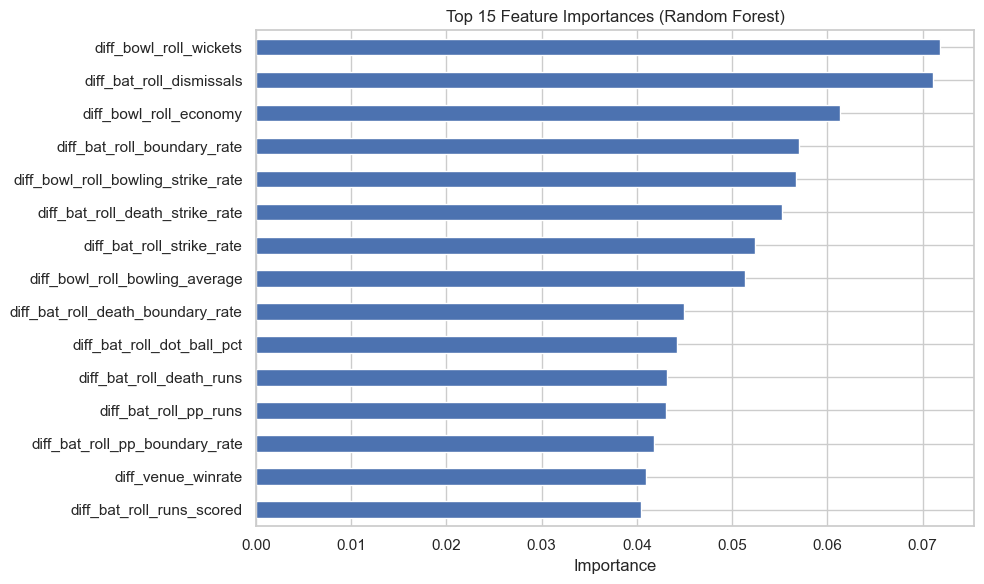

In [236]:
#Feature Importance
rf_feat_imp = pd.Series(best_rf.feature_importances_, index=X_train.columns)
rf_feat_imp.nlargest(15).sort_values().plot(kind='barh', figsize=(10, 6))
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

XGBOOST

In [238]:
#Hyperparameter Tuning with GridSearchCV for XGBoost
import xgboost as xgb

param_grid = {
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

xgb_model = xgb.XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=tscv,  # TimeSeriesSplit to respect temporal order
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


C:\Users\Shreyas S\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:48:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}
Best cross-validated accuracy: 0.5576470588235294


In [239]:
#Final Evaluation on 2024 Test Set for XGBoost
#Train best model on full pre-2024 data
best_xgb = grid_search.best_estimator_
best_xgb.fit(X_train, y_train)
final_preds = best_xgb.predict(X_test)

print("2024 Evaluation with XGBoost Tuned Model")
print("Accuracy:", accuracy_score(y_test, final_preds))
print(classification_report(y_test, final_preds))

C:\Users\Shreyas S\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:48:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


2024 Evaluation with XGBoost Tuned Model
Accuracy: 0.5915492957746479
              precision    recall  f1-score   support

           0       0.61      0.53      0.57        36
           1       0.57      0.66      0.61        35

    accuracy                           0.59        71
   macro avg       0.59      0.59      0.59        71
weighted avg       0.59      0.59      0.59        71



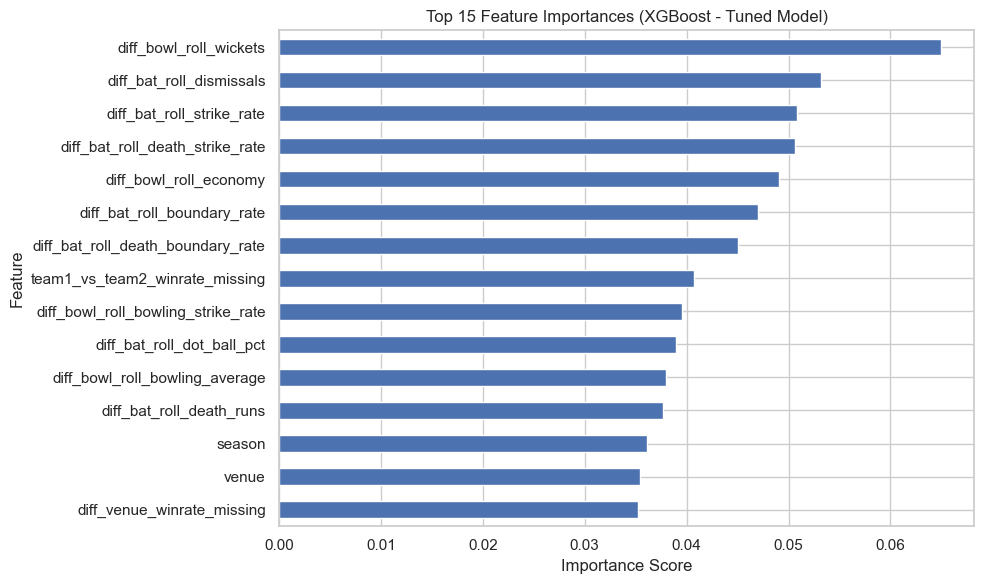

In [240]:
#Extract feature importances from the tuned XGBoost model
xgb_feat_imp = pd.Series(best_xgb.feature_importances_, index=X_train.columns)

#Plot the top 15 most important features
xgb_feat_imp.nlargest(15).sort_values().plot(kind='barh', figsize=(10, 6))
plt.title("Top 15 Feature Importances (XGBoost - Tuned Model)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

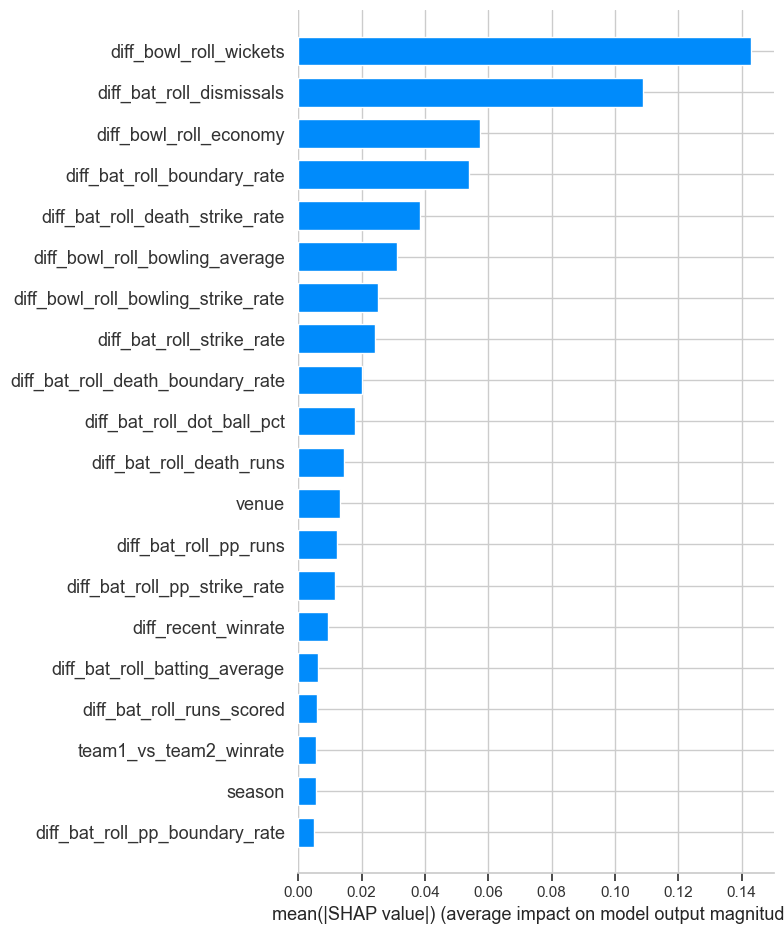

In [241]:
import shap
#Use the tuned XGBoost model
explainer = shap.TreeExplainer(best_xgb)

#SHAP values for the test set
shap_values = explainer.shap_values(X_test)

#Summary bar plot showing average impact of each feature
shap.summary_plot(shap_values, X_test, plot_type="bar")

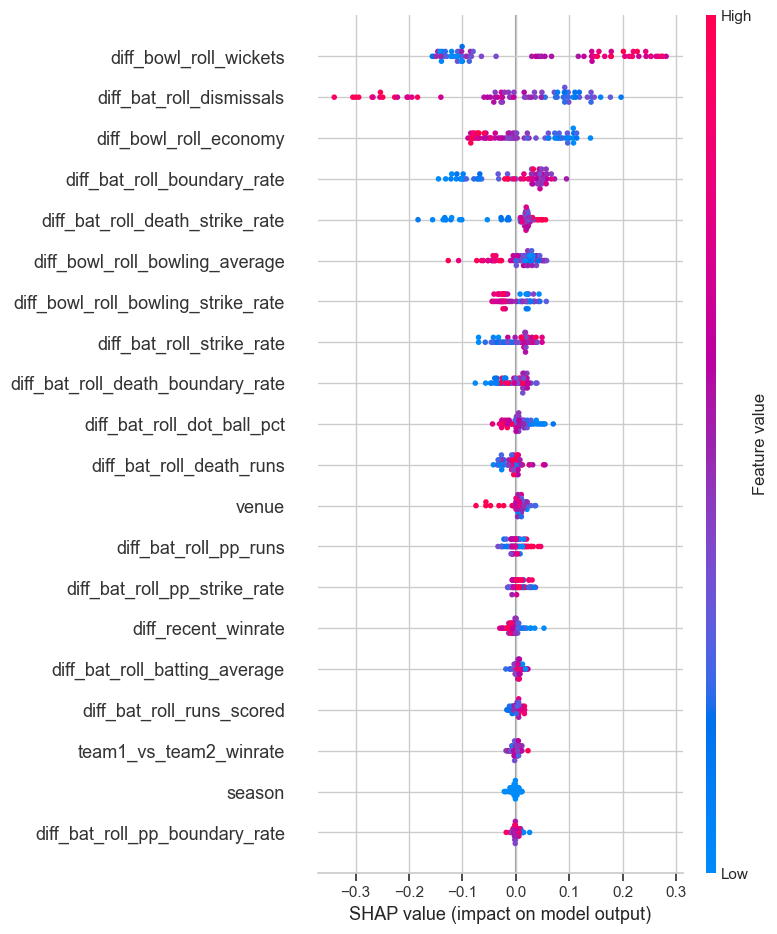

In [242]:
shap.summary_plot(shap_values, X_test)

CATBOOST

In [244]:
from catboost import CatBoostClassifier

#Time-aware cross-validation
tscv = TimeSeriesSplit(n_splits=5)

#Define parameter grid
cat_param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.03, 0.05, 0.1],
    'iterations': [100, 200],
    'l2_leaf_reg': [1, 3, 5]
}

#Initialize base model
cat_model = CatBoostClassifier(random_seed=42, verbose=0)

#Grid search
cat_grid_search = GridSearchCV(
    estimator=cat_model,
    param_grid=cat_param_grid,
    cv=tscv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

#Fit the model
cat_grid_search.fit(X_train, y_train)

#Show results
print("Best Parameters:", cat_grid_search.best_params_)
print("Best CV Accuracy:", cat_grid_search.best_score_)

#Best model
best_cat = cat_grid_search.best_estimator_

#Evaluate on test
cat_preds = best_cat.predict(X_test)
print("\nFinal Evaluation on Test Set (CatBoost - Tuned)")
print("Accuracy:", accuracy_score(y_test, cat_preds))
print(classification_report(y_test, cat_preds))


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'depth': 4, 'iterations': 100, 'l2_leaf_reg': 3, 'learning_rate': 0.03}
Best CV Accuracy: 0.5776470588235295

Final Evaluation on Test Set (CatBoost - Tuned)
Accuracy: 0.6197183098591549
              precision    recall  f1-score   support

           0       0.62      0.64      0.63        36
           1       0.62      0.60      0.61        35

    accuracy                           0.62        71
   macro avg       0.62      0.62      0.62        71
weighted avg       0.62      0.62      0.62        71



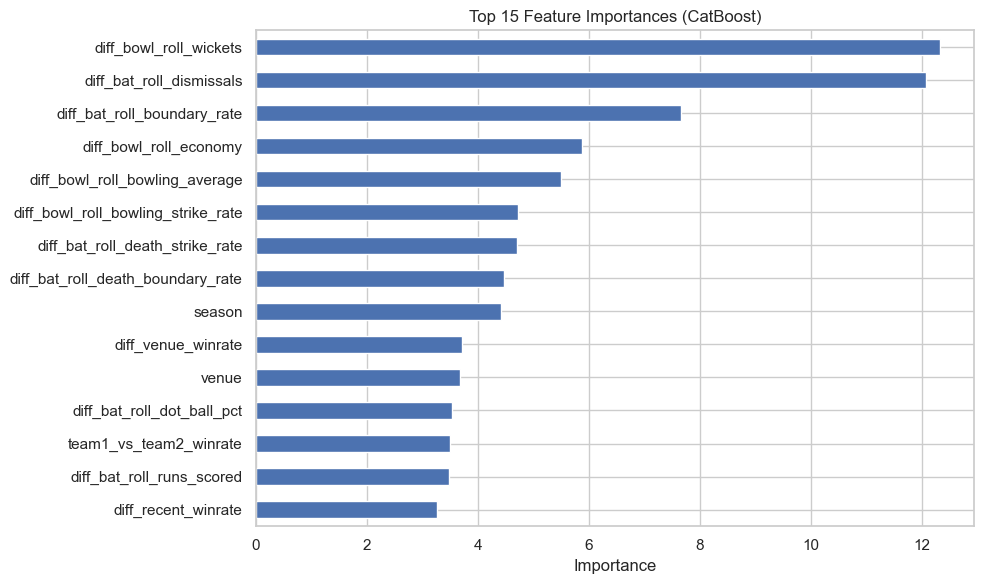

In [245]:
#Feature importances of CatBoost
cat_feat_imp = pd.Series(best_cat.feature_importances_, index=X_train.columns)

#Plot top 15
cat_feat_imp.nlargest(15).sort_values().plot(kind='barh', figsize=(10, 6))
plt.title("Top 15 Feature Importances (CatBoost)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


In [246]:
#SHAP for CatBoost

#Create SHAP explainer for CatBoost
explainer_cat = shap.TreeExplainer(best_cat)

#Compute SHAP values for test set
shap_values_cat = explainer_cat.shap_values(X_test)


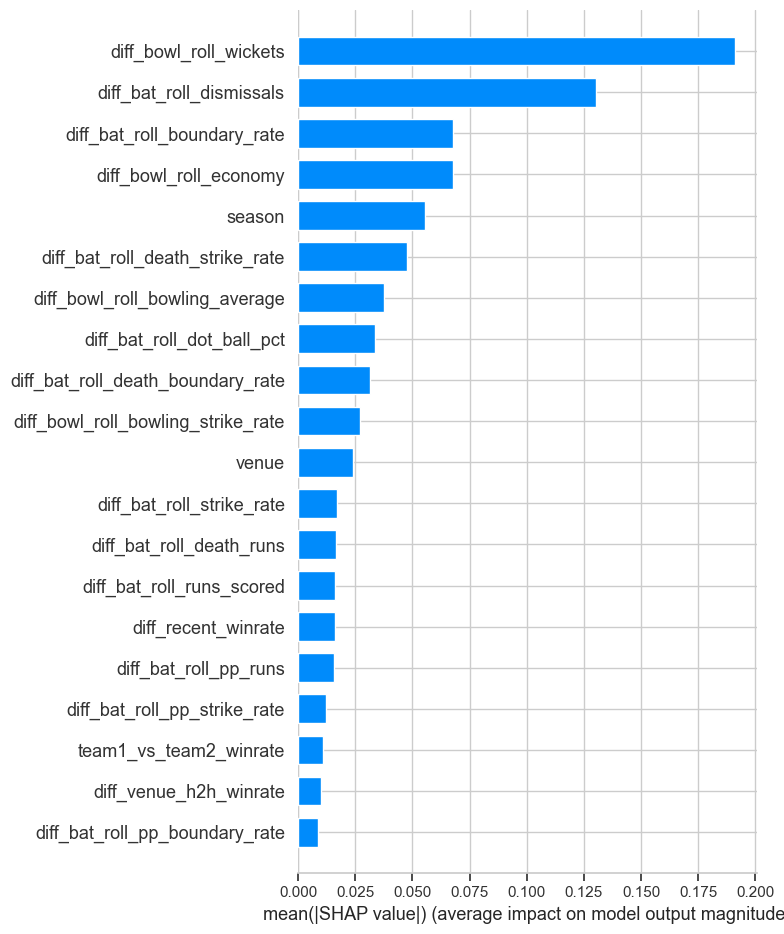

In [247]:
shap.summary_plot(shap_values_cat, X_test, plot_type="bar", show=True)

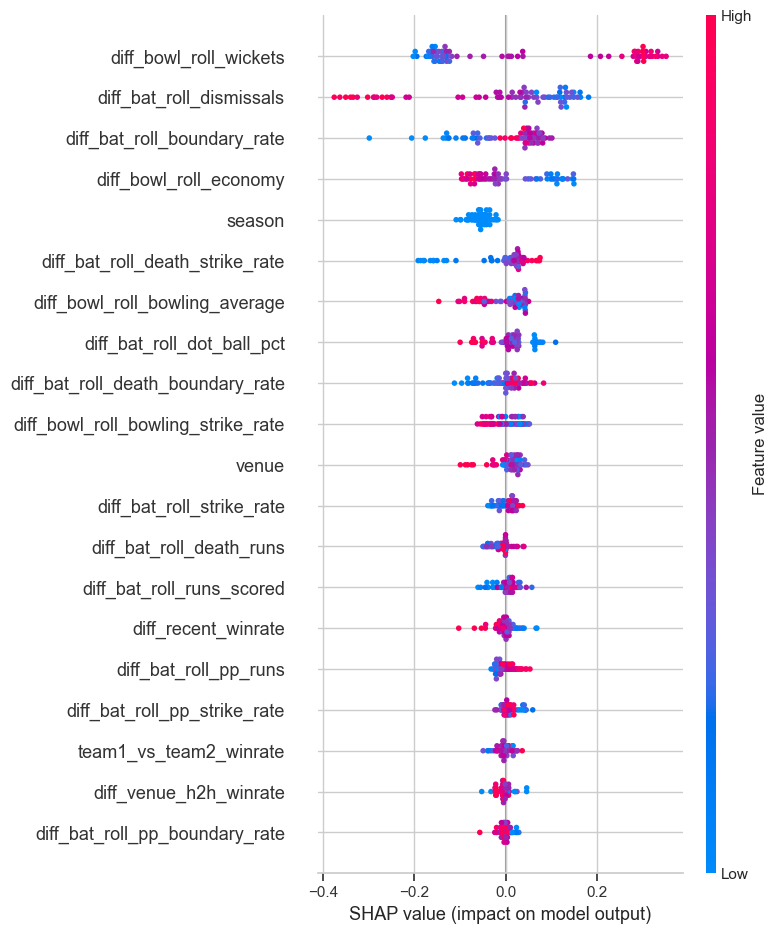

In [248]:
shap.summary_plot(shap_values_cat, X_test)

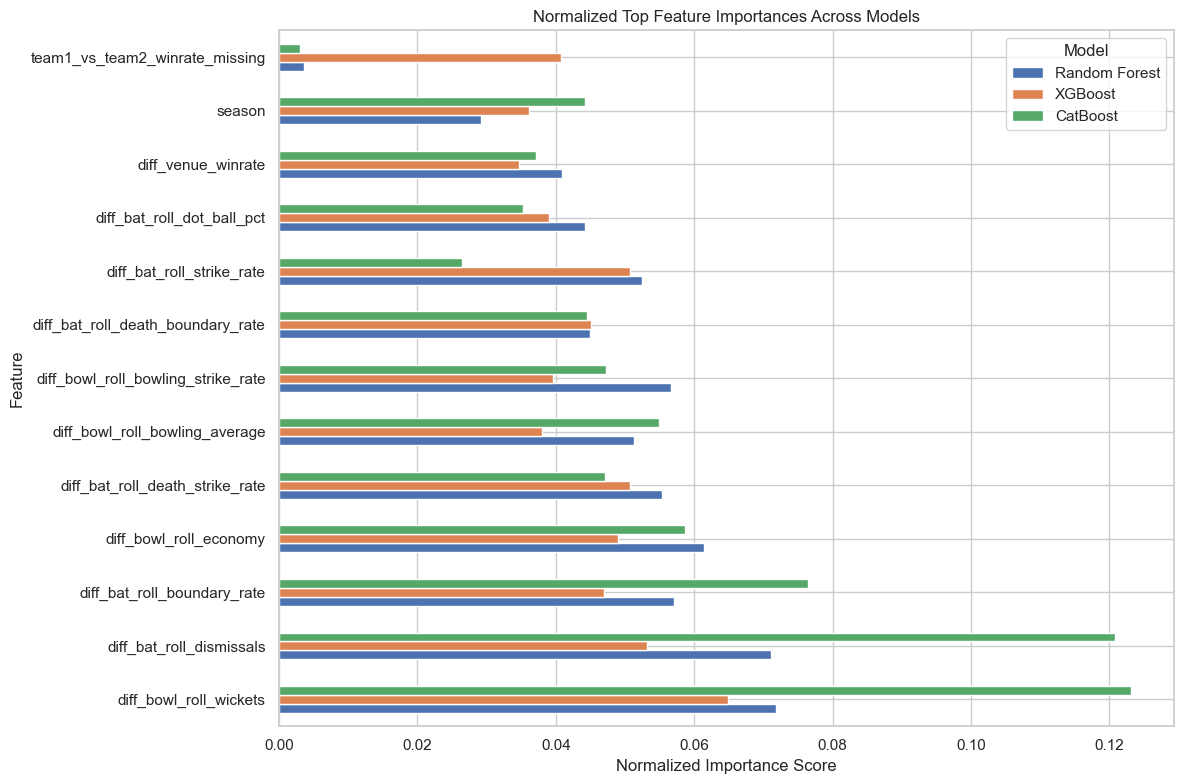

In [249]:
#Extract raw importances
rf_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
xgb_importances = pd.Series(best_xgb.feature_importances_, index=X_train.columns)
cat_importances = pd.Series(best_cat.feature_importances_, index=X_train.columns)

#Normalize all to sum to 1 for fair comparison
rf_importances /= rf_importances.sum()
xgb_importances /= xgb_importances.sum()
cat_importances /= cat_importances.sum()

#Get union of top 10 features from each model
top_features = list(set(rf_importances.nlargest(10).index)
                    | set(xgb_importances.nlargest(10).index)
                    | set(cat_importances.nlargest(10).index))

#Combine into a DataFrame
comparison_df = pd.DataFrame({
    "Random Forest": rf_importances[top_features],
    "XGBoost": xgb_importances[top_features],
    "CatBoost": cat_importances[top_features]
})

#Sort by average importance
comparison_df = comparison_df.loc[comparison_df.mean(axis=1).sort_values(ascending=False).index]

#Plot
comparison_df.plot(kind='barh', figsize=(12, 8))
plt.title("Normalized Top Feature Importances Across Models")
plt.xlabel("Normalized Importance Score")
plt.ylabel("Feature")
plt.legend(title="Model")
plt.tight_layout()
plt.show()


BASELINE MODEL

In [251]:
#Dummy Classifier to predict the most frequent class
from sklearn.dummy import DummyClassifier

#Most frequent strategy
dummy = DummyClassifier(strategy='most_frequent', random_state=42)
dummy.fit(X_train, y_train)
dummy_preds = dummy.predict(X_test)

print("Baseline Model (DummyClassifier - Most Frequent)")
print("Accuracy:", accuracy_score(y_test, dummy_preds))
print(classification_report(y_test, dummy_preds))


Baseline Model (DummyClassifier - Most Frequent)
Accuracy: 0.49295774647887325
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.49      1.00      0.66        35

    accuracy                           0.49        71
   macro avg       0.25      0.50      0.33        71
weighted avg       0.24      0.49      0.33        71



C:\Users\Shreyas S\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shreyas S\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shreyas S\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [252]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)
logreg_preds = logreg.predict(X_test)

print("Baseline Model (Logistic Regression - Untuned)")
print("Accuracy:", accuracy_score(y_test, logreg_preds))
print(classification_report(y_test, logreg_preds))


Baseline Model (Logistic Regression - Untuned)
Accuracy: 0.5352112676056338
              precision    recall  f1-score   support

           0       0.55      0.50      0.52        36
           1       0.53      0.57      0.55        35

    accuracy                           0.54        71
   macro avg       0.54      0.54      0.53        71
weighted avg       0.54      0.54      0.53        71



C:\Users\Shreyas S\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


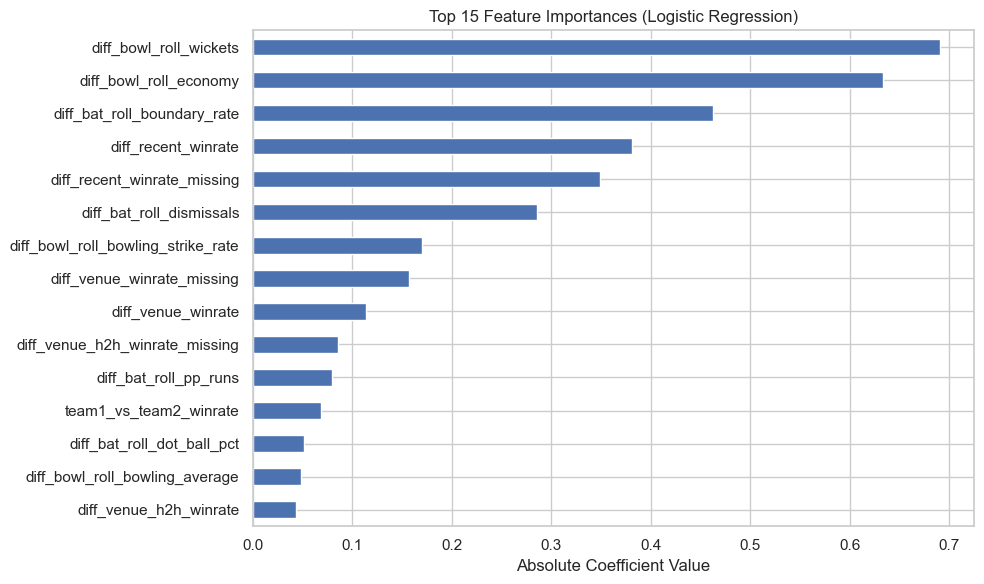

In [253]:
#Feature Importance for Logistic Regression
#Create a Series of absolute coefficient values
logreg_feat_imp = pd.Series(abs(logreg.coef_[0]), index=X_train.columns)

#Plot Top 15
logreg_feat_imp.nlargest(15).sort_values().plot(kind='barh', figsize=(10, 6))
plt.title("Top 15 Feature Importances (Logistic Regression)")
plt.xlabel("Absolute Coefficient Value")
plt.tight_layout()
plt.show()

#Momentum Matters - Evaluate whether teams with a higher recent win rate tend to win more matches.

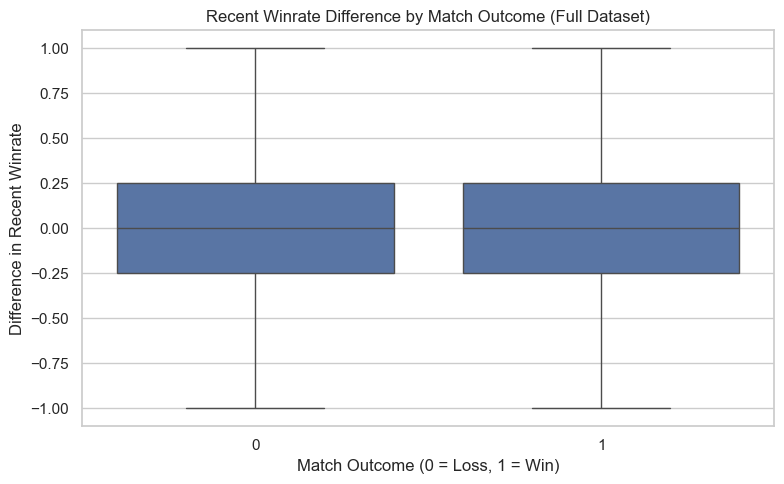

T-statistic: -0.561
P-value: 0.5751
Not statistically significant: No strong evidence of recent winrate effect.


In [255]:
from scipy.stats import ttest_ind

#Combine training and test data
full_df = pd.concat([X_train, X_test], axis=0)
full_df['match_outcome'] = pd.concat([y_train, y_test], axis=0)

#Plot distributions
plt.figure(figsize=(8, 5))
sns.boxplot(x='match_outcome', y='diff_recent_winrate', data=full_df)
plt.title("Recent Winrate Difference by Match Outcome (Full Dataset)")
plt.xlabel("Match Outcome (0 = Loss, 1 = Win)")
plt.ylabel("Difference in Recent Winrate")
plt.tight_layout()
plt.show()

#Statistical test (independent samples t-test)
win_group = full_df[full_df['match_outcome'] == 1]['diff_recent_winrate']
lose_group = full_df[full_df['match_outcome'] == 0]['diff_recent_winrate']

t_stat, p_val = ttest_ind(win_group, lose_group, nan_policy='omit')  #in case of NaNs

#Print results
print("T-statistic:", round(t_stat, 3))
print("P-value:", round(p_val, 4))

if p_val < 0.05:
    print("Statistically significant: Recent winrate likely influences match outcome.")
else:
    print("Not statistically significant: No strong evidence of recent winrate effect.")


Team strength and its impact on match outcomes

In [257]:
#Strength-related features to evaluate
strength_features = [
    'diff_bat_roll_runs_scored',
    'diff_bat_roll_strike_rate',
    'diff_bat_roll_batting_average',
    'diff_bat_roll_boundary_rate',
    'diff_bat_roll_dot_ball_pct',
    'diff_bat_roll_pp_runs',
    'diff_bat_roll_death_runs',
    'diff_bat_roll_dismissals',
    'diff_bat_roll_pp_strike_rate',
    'diff_bat_roll_death_strike_rate',
    'diff_bat_roll_pp_boundary_rate',
    'diff_bat_roll_death_boundary_rate',
    'diff_bowl_roll_wickets',
    'diff_bowl_roll_economy',
    'diff_bowl_roll_bowling_average',
    'diff_bowl_roll_bowling_strike_rate'
]

print("Team Strengths and Match Outcome — Statistical Tests\n")

for feature in strength_features:
    win_group = full_df[full_df['match_outcome'] == 1][feature]
    lose_group = full_df[full_df['match_outcome'] == 0][feature]

    t_stat, p_val = ttest_ind(win_group, lose_group, nan_policy='omit')

    print(f"Feature: {feature}")
    print(f"  T-statistic: {round(t_stat, 3)}")
    print(f"  P-value    : {round(p_val, 4)}")
    
    if p_val < 0.05:
        print("Statistically significant: May influence match outcome.\n")
    else:
        print("Not statistically significant: No strong evidence.\n")


Team Strengths and Match Outcome — Statistical Tests

Feature: diff_bat_roll_runs_scored
  T-statistic: 1.438
  P-value    : 0.1507
Not statistically significant: No strong evidence.

Feature: diff_bat_roll_strike_rate
  T-statistic: 3.355
  P-value    : 0.0008
Statistically significant: May influence match outcome.

Feature: diff_bat_roll_batting_average
  T-statistic: 1.288
  P-value    : 0.1979
Not statistically significant: No strong evidence.

Feature: diff_bat_roll_boundary_rate
  T-statistic: 2.583
  P-value    : 0.0099
Statistically significant: May influence match outcome.

Feature: diff_bat_roll_dot_ball_pct
  T-statistic: -3.39
  P-value    : 0.0007
Statistically significant: May influence match outcome.

Feature: diff_bat_roll_pp_runs
  T-statistic: 1.054
  P-value    : 0.2922
Not statistically significant: No strong evidence.

Feature: diff_bat_roll_death_runs
  T-statistic: 1.42
  P-value    : 0.1559
Not statistically significant: No strong evidence.

Feature: diff_bat_ro

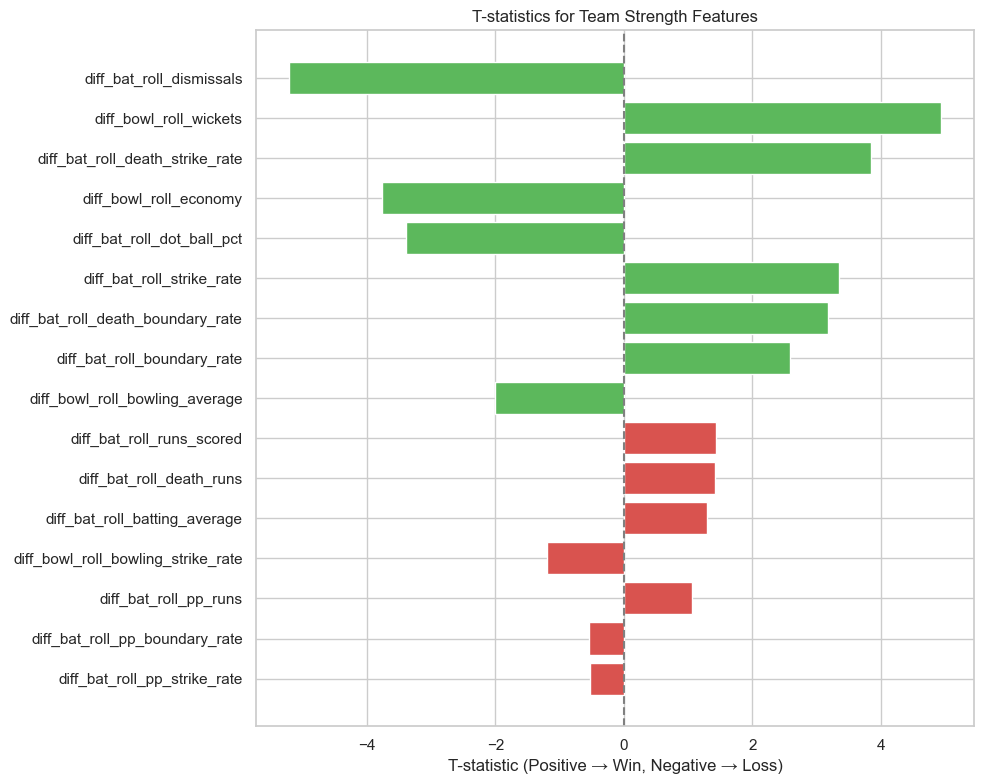

In [258]:
#Bar plot of T-statistics for features

#Strength features to evaluate
strength_features = [
    'diff_bat_roll_runs_scored',
    'diff_bat_roll_strike_rate',
    'diff_bat_roll_batting_average',
    'diff_bat_roll_boundary_rate',
    'diff_bat_roll_dot_ball_pct',
    'diff_bat_roll_pp_runs',
    'diff_bat_roll_death_runs',
    'diff_bat_roll_dismissals',
    'diff_bat_roll_pp_strike_rate',
    'diff_bat_roll_death_strike_rate',
    'diff_bat_roll_pp_boundary_rate',
    'diff_bat_roll_death_boundary_rate',
    'diff_bowl_roll_wickets',
    'diff_bowl_roll_economy',
    'diff_bowl_roll_bowling_average',
    'diff_bowl_roll_bowling_strike_rate'
]

#Store T-stat and p-values
t_stats = []
p_vals = []

#Run t-tests
for feature in strength_features:
    win_group = full_df[full_df['match_outcome'] == 1][feature]
    lose_group = full_df[full_df['match_outcome'] == 0][feature]
    
    t_stat, p_val = ttest_ind(win_group, lose_group)
    t_stats.append(t_stat)
    p_vals.append(p_val)

#Create dataframe
stat_df = pd.DataFrame({
    'Feature': strength_features,
    'T-statistic': t_stats,
    'P-value': p_vals
})

#Sort by absolute T-statistic
stat_df['abs_T'] = stat_df['T-statistic'].abs()
stat_df = stat_df.sort_values(by='abs_T', ascending=True)

#Plot
plt.figure(figsize=(10, 8))
bars = plt.barh(stat_df['Feature'], stat_df['T-statistic'], color=['#5cb85c' if p < 0.05 else '#d9534f' for p in stat_df['P-value']])
plt.axvline(0, color='gray', linestyle='--')
plt.title("T-statistics for Team Strength Features")
plt.xlabel("T-statistic (Positive → Win, Negative → Loss)")
plt.tight_layout()
plt.show()
